## Expedition Clustering Full Dataset Labeling

In order to verify our clustering is working effectively, let's identify and label a set of expeditions.

Let's say 10 (and more if we deem necessary!)

And while we're at it, we can get an idea of the spatiotemporal separations (epsilon, or ϵ) and Levenshtein distances we can expect in expeditions to use in clustering later.

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import numpy as np
import pandas as pd

from plotting import plot_time_histogram, plot_geographical_positions, plot_geographical_heatmap,  plot_geographical_heatmap_by_day

In [3]:
df = pd.read_csv("../data/full_df.csv", on_bad_lines = "skip", index_col=None)
df.columns = map(str.lower, df.columns)

In [4]:
# Drop 
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[0], axis=1)
df['cluster'] = np.nan

In [5]:
df = df.sort_values(by='startdate')

In [6]:
df

collectionobjectid                                              text1  \
36796              316747                                                NaN   
27850              239749                                Low spreading shrub   
36546              314625                                                NaN   
6376                54581                                                NaN   
1767                14699                                                NaN   
...                   ...                                                ...   
15648              134324                                 Cespitose, common.   
9863                84415  Cespitose, only 1 male plant seen, clumps common.   
24001              206529                                 Cespitose, common.   
44760              688115                                         Epiphytic.   
44759              688115                                         Epiphytic.   

       countamt  collectingeventid  collectionobjectattachmentid  \
36796       1.0            19576.0                      249495.0   
27850       1.0            24396.0                      415121.0   
36546       1.0            46316.0                      562709.0   
6376        1.0           105965.0                      373473.0   
1767        1.0           136720.0                      191804.0   
...         ...                ...                           ...   
15648       1.0           104627.0                      335198.0   
9863        1.0            13111.0                      328682.0   
24001       1.0           127449.0                      338772.0   
44760       NaN           529612.0                      211281.0   
44759       NaN           529612.0                      211280.0   

       attachmentid                        attachmentlocation   startdate  \
36796      249598.0  f6f0a625-3e08-4b14-89e6-246fe7dbe2f9.jpg  1824-08-19   
27850      415225.0  2dc951de-d18f-4a64-8492-8db9bff37376.jpg  1850-01-01   
36546      562813.0  b5574eee-8e19-4d64-8919-6ac7b7f8e125.jpg  1852-07-01   
6376       373576.0  2d4222d2-d6ea-4ae0-9416-c2de90aa10dd.jpg  1862-04-01   
1767       191805.0  8065b346-86a6-4127-828d-c0e07af03d87.jpg  1862-09-08   
...             ...                                       ...         ...   
15648      335301.0  301d50ef-83bf-4b0a-8d35-c0d719eedf57.jpg  2010-08-10   
9863       328785.0  e9e4e415-1bde-4318-b6d6-9cf4775a6b30.jpg  2010-08-10   
24001      338875.0  e29a672d-8489-49ed-aad0-757b71b61286.jpg  2010-08-12   
44760      211384.0  37550c42-03cf-4e5b-8636-f68cb60e8720.jpg  2014-05-23   
44759      211383.0  18c96408-a60b-444d-be6e-6fa2f76aa38a.jpg  2014-05-23   

          enddate                                            remarks  \
36796  1824-08-19                                                NaN   
27850         NaN                                                NaN   
36546  1852-07-01                                                NaN   
6376   1862-04-01                                                NaN   
1767   1862-09-08                                                NaN   
...           ...                                                ...   
15648  2010-08-10  On dry, gentle slope, forest edges and meadows...   
9863   2010-08-10  Not much raised above surrounding peat, full s...   
24001  2010-08-12  Dry, gentle slope, over volcanic pumice and du...   
44760         NaN                          On trees. Montane Forest.   
44759         NaN                          On trees. Montane Forest.   

       localityid  minelevation  maxelevation  elevationaccuracy  latitude1  \
36796     19576.0           NaN           NaN                NaN  34.325200   
27850     24396.0           NaN           NaN                NaN  32.000000   
36546     46316.0           NaN           NaN                NaN  37.751400   
6376     105965.0           NaN           NaN                NaN  37.923753   
1767     136720.0           NaN           Na

In [7]:

df['startdate'] = pd.to_datetime(df['startdate'])
df['enddate'] = pd.to_datetime(df['enddate'])

df['startdate_num'] = df['startdate'].view(int)//1e9
df['enddate_num'] = df['enddate'].view(int)//1e9

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_9475/342917146.py:4: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['startdate_num'] = df['startdate'].view(int)//1e9
/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_9475/342917146.py:5: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  df['enddate_num'] = df['enddate'].view(int)//1e9


In [8]:
df[['latitude1', 'longitude1', 'localityname', 'startdate_num', 'enddate_num']].head(5)

latitude1  longitude1  \
36796  34.325200 -117.428100   
27850  32.000000 -114.000000   
36546  37.751400 -122.441300   
6376   37.923753 -122.597551   
1767   40.962500 -122.440400   

                                            localityname  startdate_num  \
36796                                         Cajon Pass  -4.587408e+09   
27850                                           Monterey  -3.786826e+09   
36546                                      San Francisco  -3.708029e+09   
6376              Near Tamalpais. Hills of Marin County.  -3.400358e+09   
1767   In the valley of the Upper Sacramento near 'Ji...  -3.386534e+09   

        enddate_num  
36796 -4.587408e+09  
27850 -9.223372e+09  
36546 -3.708029e+09  
6376  -3.400358e+09  
1767  -3.386534e+09

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


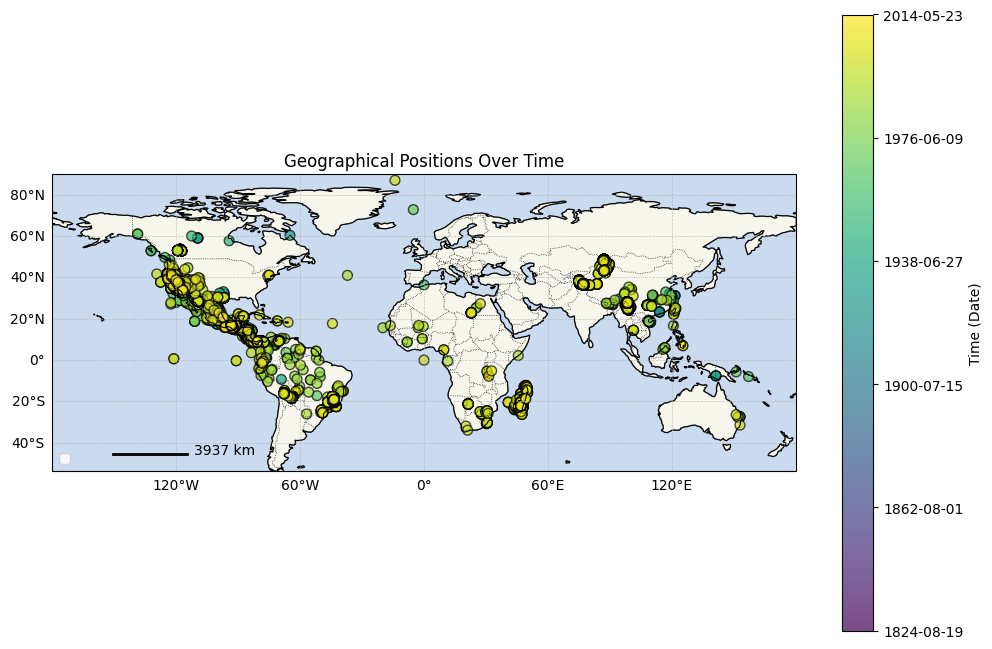

In [9]:
plot_geographical_positions(df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', plot_towns=False)

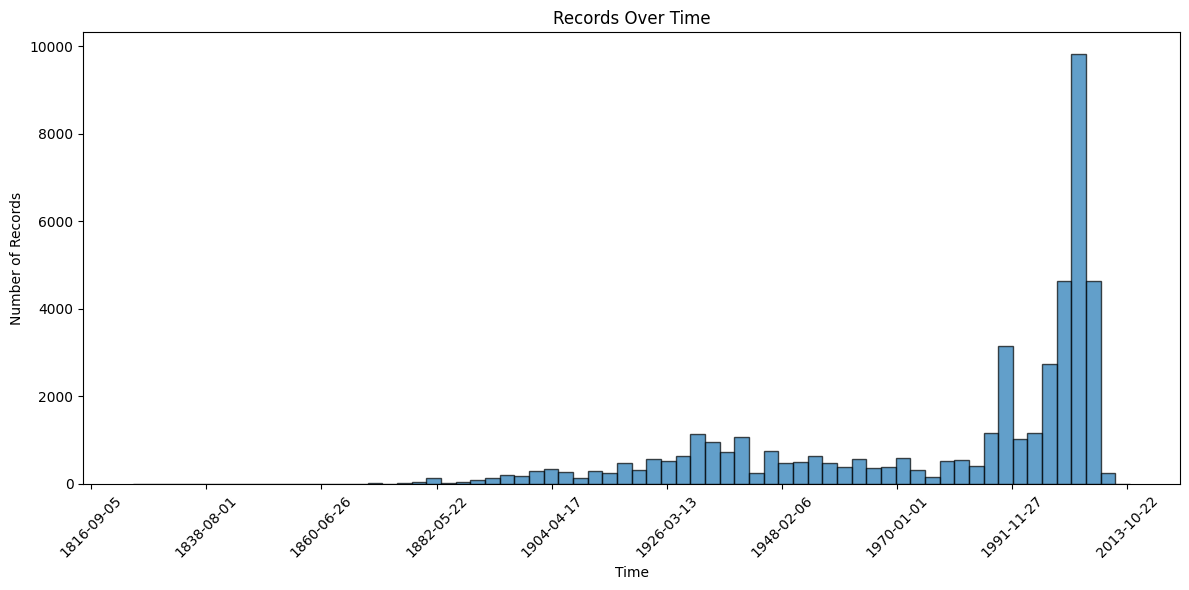

In [10]:
plot_time_histogram(df, datetime_col='startdate')

Lets do some manual expedition cluster labeling!

First, let's look at the distance between records that seem to be in a single cluster... Let's find the max of a couple that seem like they belong _together_

Let's start small, then increase radius

# 1. Cluster Labeling

To locate a cluster, let's start with a fairly wide net.

Lat / lon +- 2

Start Date +- 6 months (1 year radius)

In [11]:
samp_collobjid_l = list(df.collectionobjectid.sample(10, random_state=123))
samp_collobjid_l

[178364, 65724, 365383, 164829, 296037, 320180, 244207, 245295, 33872, 46139]

[325334, 203161, 275379, 189769, 306553, 305052, 53269, 124799, 104780, 177087]

## a.) Collection Object ID: 325334

In [12]:
samp_record = df[df.collectionobjectid == 325334]
samp_record

collectionobjectid text1  countamt  collectingeventid  \
37784              325334   NaN       1.0           152848.0   

       collectionobjectattachmentid  attachmentid  \
37784                      470470.0      470574.0   

                             attachmentlocation  startdate    enddate remarks  \
37784  c5d21bad-9129-4b37-9df6-e8a9dc84cc05.jpg 1934-06-11 1934-06-11     NaN   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
37784  ...        5200.0                0.0    41.4506   -120.3595   

        localityname  namedplace geographyid cluster  startdate_num  \
37784  Parker Creek.         NaN     17158.0     NaN  -1.122163e+09   

        enddate_num  
37784 -1.122163e+09  

[1 rows x 22 columns]

In [13]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 41.4506     lon: -120.3595     start date: 1934-06-11T00:00:00.000000000


In [14]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 2].sort_values(by='startdate')

# Filter overall df to only records within 2º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 2].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [15]:
test_df

collectionobjectid                                              text1  \
27709              238447                                                NaN   
33774              291224                                                NaN   
9196                78722                                                NaN   
8783                75286                                                NaN   
41294              355538                                                NaN   
...                   ...                                                ...   
6454                55384                                                NaN   
30076              258922                                                NaN   
42758              367901                                                NaN   
9176                78531                                                NaN   
23866              205180  Tree 40-42 ft. high, 30 ft. thick, trunks up t...   

       countamt  collectingeventid  collectionobjectattachmentid  \
27709       1.0            68211.0                      380942.0   
33774       1.0           127098.0                           NaN   
9196        1.0           152804.0                      325457.0   
8783        1.0            68783.0                      551745.0   
41294       1.0            52430.0                      342438.0   
...         ...                ...                           ...   
6454        1.0           129926.0                      500495.0   
30076       1.0           129928.0                           NaN   
42758       1.0            10455.0                      263558.0   
9176        1.0             7639.0                      480087.0   
23866       1.0            49447.0                      246422.0   

       attachmentid                        attachmentlocation  startdate  \
27709      381045.0  39bc692e-22bd-4176-a244-5c98ec252f48.jpg 1934-04-21   
33774           NaN                                       NaN 1934-05-18   
9196       325560.0  020eeae9-9d44-41d3-8fd2-e105b5731161.jpg 1934-05-18   
8783       551849.0  8c2ebecb-c013-4827-a350-68c9c1f69843.jpg 1934-05-24   
41294      342541.0  2f05e029-d233-4292-b6b5-31a86cb7ab13.jpg 1934-06-11   
...             ...                                       ...        ...   
6454       500599.0  49c3b2f6-ec0c-45ee-b0d3-4d091b4ffd69.jpg 1934-08-29   
30076           NaN                                       NaN 1934-08-29   
42758      263661.0  137fbeaf-a02d-4fc6-a214-cb4c9bb708f7.jpg 1934-09-03   
9176       480191.0  e517ccf4-2edf-477d-8d76-e1ea08851fb2.jpg 1934-09-05   
23866      246525.0  73f49399-a156-4a0b-b785-3a42b0a201d8.jpg 1934-10-08   

         enddate                                            remarks  ...  \
27709 1934-04-21                                                NaN  ...   
33774 1934-05-18                                    Open lava flat.  ...   
9196  1934-05-18                                                NaN  ...   
8783  1934-05-24                           Open yellow pine forest.  ...   
41294 1934-06-11                                                NaN  ...   
...          ...                                                ...  ...   
6454  1934-08-29                                                NaN  ...   
30076 1934-08-29                                                NaN  ...   
42758 1934-09-03                                                NaN  ...   
9176  1934-09-05                                                NaN  ...   
23866 1934-10-08  Arid Transition: Arctostaphylos patula, Yellow...  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
27709           NaN                NaN   41.14010 -122.317300   
33774           NaN                NaN   41.62920 -121.295000   
9196            NaN                NaN   41.73470 -120.741900   
8783         4800.0                0.0   41.55190 -121.122500   
41294        5200.0                0.0   41.45060 -120.359500   
...          

In [16]:
test_df.startdate.value_counts()

startdate
1934-06-11    62
1934-06-13    48
1934-07-01    46
1934-06-12    45
1934-06-30    37
1934-07-02    24
1934-06-15    20
1934-06-16    12
1934-08-01     8
1934-06-14     7
1934-07-04     7
1934-07-03     6
1934-08-29     5
1934-07-07     4
1934-05-18     2
1934-09-05     1
1934-09-03     1
1934-04-21     1
1934-07-13     1
1934-05-24     1
1934-10-08     1
Name: count, dtype: int64

In [17]:
test_df.localityname.value_counts()

localityname
Duncan Horse Camp.                                                                                        77
Parker Creek.                                                                                             36
Parker Creek, Warner Mountains                                                                            25
Fandango Pass.                                                                                            19
Parker Creek, Warner Mts.                                                                                 15
                                                                                                          ..
Dorris Reservoir, 2 miles E. of Alturas.                                                                   1
Dorris Reservoir, 2 miles E of Alturas                                                                     1
11 mi. NE of Canby.                                                                                        1
11 mi 

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [18]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1934-04-21 00:00:00', '1934-05-18 00:00:00', '1934-05-24 00:00:00',
 '1934-06-11 00:00:00', '1934-06-12 00:00:00', '1934-06-13 00:00:00',
 '1934-06-14 00:00:00', '1934-06-15 00:00:00', '1934-06-16 00:00:00',
 '1934-06-30 00:00:00', '1934-07-01 00:00:00', '1934-07-02 00:00:00',
 '1934-07-03 00:00:00', '1934-07-04 00:00:00', '1934-07-07 00:00:00',
 '1934-07-13 00:00:00', '1934-08-01 00:00:00', '1934-08-29 00:00:00',
 '1934-09-03 00:00:00', '1934-09-05 00:00:00', '1934-10-08 00:00:00']
Length: 21, dtype: datetime64[ns]

In [19]:
cluster_date_l = [
    ('1934-05-18', '1934-05-18'),
    ('1934-06-11', '1934-06-16'),
    ('1934-07-13', '1934-07-13'),
    ('1934-08-01', '1934-08-01'), 
    ('1934-08-29', '1934-08-29'),
    ('1934-09-05', '1934-09-05'),
]

In [20]:
test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

latitude1  longitude1 text1          remarks             localityname  \
33774    41.6292   -121.2950   NaN  Open lava flat.             Timbered Mt.   
9196     41.7347   -120.7419   NaN              NaN  Near Timbered Mountain.   

       startdate    enddate  
33774 1934-05-18 1934-05-18  
9196  1934-05-18 1934-05-18

This is just one record. Lets look for a more interesting cluster

In [212]:
test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

latitude1  longitude1 text1 remarks                    localityname  \
41294    41.4506   -120.3595   NaN     NaN       Parker Creek, Warner Mts.   
4441     41.4506   -120.3595   NaN     NaN       Parker Creek, Warner Mts.   
40763    41.4506   -120.3595   NaN     NaN  Parker Creek, Warner Mountains   
31367    41.4506   -120.3595   NaN     NaN       Parker Creek, Warner Mts.   
12403    41.4506   -120.3595   NaN     NaN                   Parker Creek.   
...          ...         ...   ...     ...                             ...   
3361     41.4540   -120.8315   NaN     NaN              2 mi. NE of Canby.   
42501    41.4506   -120.3595   NaN     NaN  Parker Creek, Warner Mountains   
8721     41.4506   -120.3595   NaN     NaN                   Parker Creek.   
24807    41.4506   -120.3595   NaN     NaN  Parker Creek, Warner Mountains   
37912    41.4895   -120.6767   NaN     NaN              11 mi NE of Canby.   

       startdate    enddate  
41294 1934-06-11 1934-06-11  
4441  1934-06-11 1934-06-11  
40763 1934-06-11 1934-06-11  
31367 1934-06-11 1934-06-11  
12403 1934-06-11 1934-06-11  
...          ...        ...  
3361  1934-06-16 1934-06-16  
42501 1934-06-16 1934-06-16  
8721  1934-06-16 1934-06-16  
24807 1934-06-16 1934-06-16  
37912 1934-06-16 1934-06-16  

[193 rows x 7 columns]

193 records - lets check it out as our first cluster

### i.) Cluster 0: ('1934-06-11', '1934-06-16')

In [21]:
# group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]
group0_df = test_df
group0_df

collectionobjectid                                              text1  \
27709              238447                                                NaN   
33774              291224                                                NaN   
9196                78722                                                NaN   
8783                75286                                                NaN   
41294              355538                                                NaN   
...                   ...                                                ...   
6454                55384                                                NaN   
30076              258922                                                NaN   
42758              367901                                                NaN   
9176                78531                                                NaN   
23866              205180  Tree 40-42 ft. high, 30 ft. thick, trunks up t...   

       countamt  collectingeventid  collectionobjectattachmentid  \
27709       1.0            68211.0                      380942.0   
33774       1.0           127098.0                           NaN   
9196        1.0           152804.0                      325457.0   
8783        1.0            68783.0                      551745.0   
41294       1.0            52430.0                      342438.0   
...         ...                ...                           ...   
6454        1.0           129926.0                      500495.0   
30076       1.0           129928.0                           NaN   
42758       1.0            10455.0                      263558.0   
9176        1.0             7639.0                      480087.0   
23866       1.0            49447.0                      246422.0   

       attachmentid                        attachmentlocation  startdate  \
27709      381045.0  39bc692e-22bd-4176-a244-5c98ec252f48.jpg 1934-04-21   
33774           NaN                                       NaN 1934-05-18   
9196       325560.0  020eeae9-9d44-41d3-8fd2-e105b5731161.jpg 1934-05-18   
8783       551849.0  8c2ebecb-c013-4827-a350-68c9c1f69843.jpg 1934-05-24   
41294      342541.0  2f05e029-d233-4292-b6b5-31a86cb7ab13.jpg 1934-06-11   
...             ...                                       ...        ...   
6454       500599.0  49c3b2f6-ec0c-45ee-b0d3-4d091b4ffd69.jpg 1934-08-29   
30076           NaN                                       NaN 1934-08-29   
42758      263661.0  137fbeaf-a02d-4fc6-a214-cb4c9bb708f7.jpg 1934-09-03   
9176       480191.0  e517ccf4-2edf-477d-8d76-e1ea08851fb2.jpg 1934-09-05   
23866      246525.0  73f49399-a156-4a0b-b785-3a42b0a201d8.jpg 1934-10-08   

         enddate                                            remarks  ...  \
27709 1934-04-21                                                NaN  ...   
33774 1934-05-18                                    Open lava flat.  ...   
9196  1934-05-18                                                NaN  ...   
8783  1934-05-24                           Open yellow pine forest.  ...   
41294 1934-06-11                                                NaN  ...   
...          ...                                                ...  ...   
6454  1934-08-29                                                NaN  ...   
30076 1934-08-29                                                NaN  ...   
42758 1934-09-03                                                NaN  ...   
9176  1934-09-05                                                NaN  ...   
23866 1934-10-08  Arid Transition: Arctostaphylos patula, Yellow...  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
27709           NaN                NaN   41.14010 -122.317300   
33774           NaN                NaN   41.62920 -121.295000   
9196            NaN                NaN   41.73470 -120.741900   
8783         4800.0                0.0   41.55190 -121.122500   
41294        5200.0                0.0   41.45060 -120.359500   
...          

In [22]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.9469026548672567)

In [23]:
group0_df.text1.unique()

array([nan, 'Rays yellow', 'Tall shrub, about 10 ft. high.',
       'Shrub about 7 ft high', 'Basal leaves pinnatifid.',
       'ca. 7-10 ft high.',
       'Pedicels and bases of capsules glandular hairy.',
       'Plants with white flowers occasional.',
       'Floral leaves narrowly margined: in this regard varying towards P. polygaloides',
       'Shrub - 6 ft. high, 6 ft. spread, 1 in. trunk diam. Stems slender and sparsely leafy.',
       'Shrub; ht. 4 ft., spr. 6 ft., tr. diam. 1 in.; common',
       'Shrub 3-4 m high.',
       'Tree 40-42 ft. high, 30 ft. thick, trunks up to 20" at ground. The trees in this grove are all sizes up to 45 feet. They are mainly erect with straight central stems. Nearly all trees are heavily laden with cones.'],
      dtype=object)

In [24]:
group0_df.localityname.value_counts()

localityname
Duncan Horse Camp.                                                                                        77
Parker Creek.                                                                                             36
Parker Creek, Warner Mountains                                                                            25
Fandango Pass.                                                                                            19
Parker Creek, Warner Mts.                                                                                 15
                                                                                                          ..
Dorris Reservoir, 2 miles E. of Alturas.                                                                   1
Dorris Reservoir, 2 miles E of Alturas                                                                     1
11 mi. NE of Canby.                                                                                        1
11 mi 

In [25]:
group0_df.localityname.unique()

array(['Castella', 'Timbered Mt.', 'Near Timbered Mountain.',
       'Near Hackamore.', 'Parker Creek, Warner Mts.', 'Parker Creek.',
       'Parker Creek, Warner Mountains',
       'Between Davis Creek and Plum Valley.', 'Plum Valley, Warner Mts.',
       '7 mi. N of Davis Creek.', 'Davis Creek',
       '6 mi. S of Davis Creek.', 'Plum Valley.',
       '9 mi. S of Davis Creek.', 'Davis Creek.',
       'N side of Fandango Valley.', 'Surprise Station.',
       'Plum Valley above Davis Creek, Warner Mts.', 'Lassen Creek.',
       'Between Davis Creek and Plum Valley',
       '10 mi. S of New Pine Creek.', 'Fandango Pass.',
       'Fandango Pass, Warner Mountains',
       'North Fork of Barber Creek, Warner Mts.',
       'Patterson Mill Road, Warner Mts.', '2.5 mi. S of Eagleville.',
       'Patterson Mill Rd., E side of Warner Mts., beside Barber Creek.',
       'Patterson Mill Road. Warner Mountains.',
       'Surprise Valley near Fort Bidwell.',
       'North fork of Barber Creek, Warn

In [26]:
group0_df['localityname'].str.contains('parker creek', case=False, na=False).sum()/len(group0_df)

np.float64(0.22713864306784662)

36% of rows have "Parker Creek" in the localityname.

A bunch of mentions of Warner Mtns, Barber Creek, Davis Creek, Alturas, and more.

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


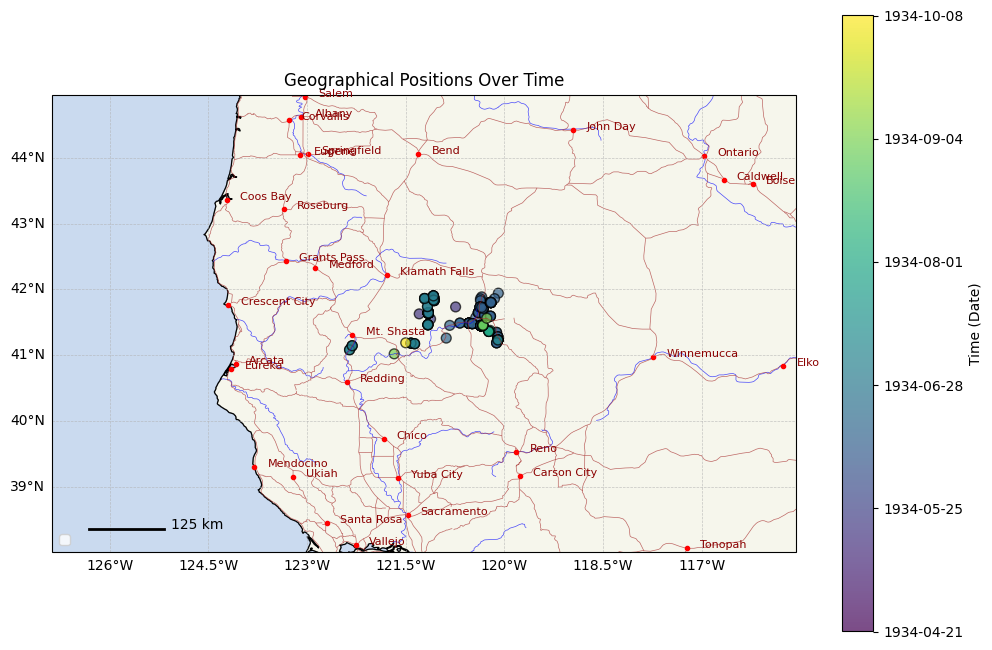

In [27]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.5, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


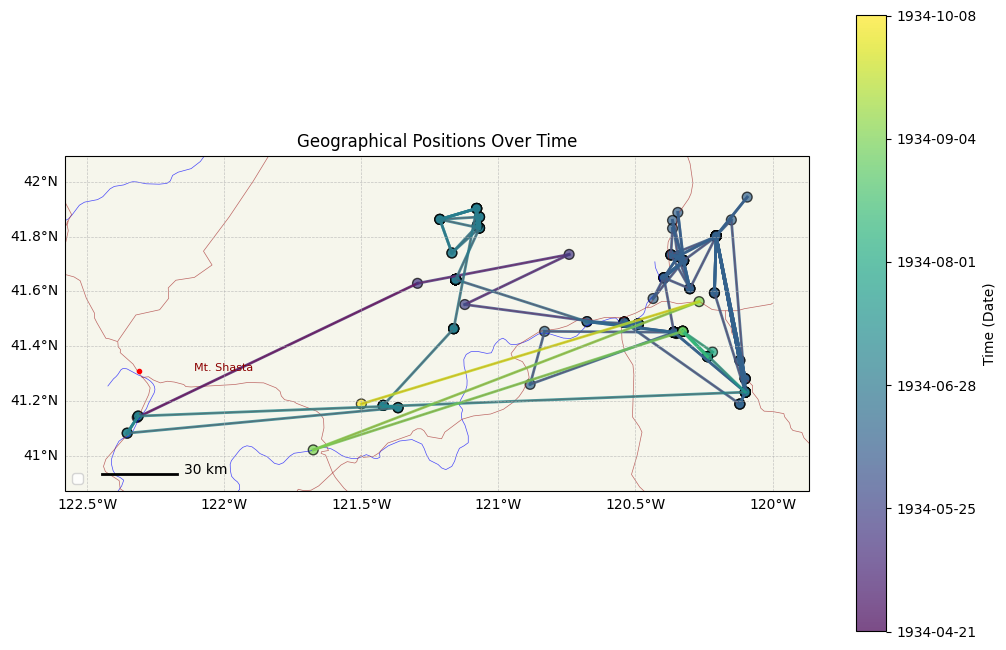

In [28]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',\
                            zoom='auto', cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

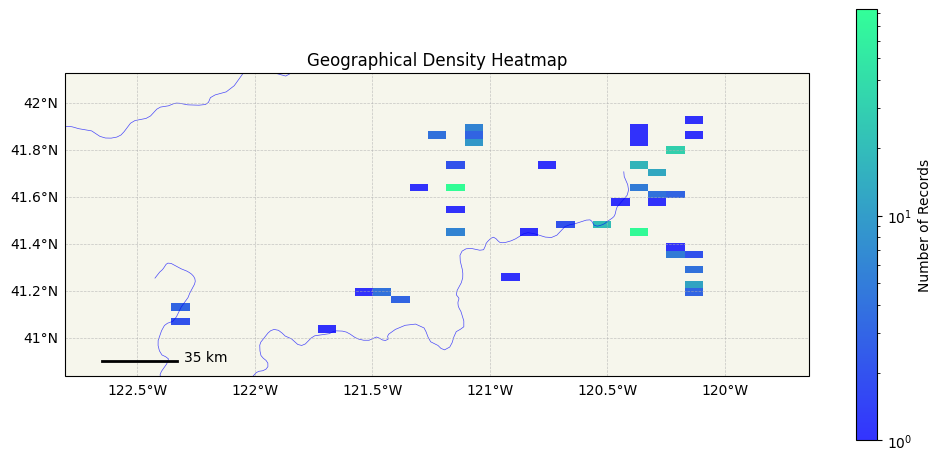

In [29]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=30,
                          zoom=5,  plot_rivers=True, plot_roads=True)


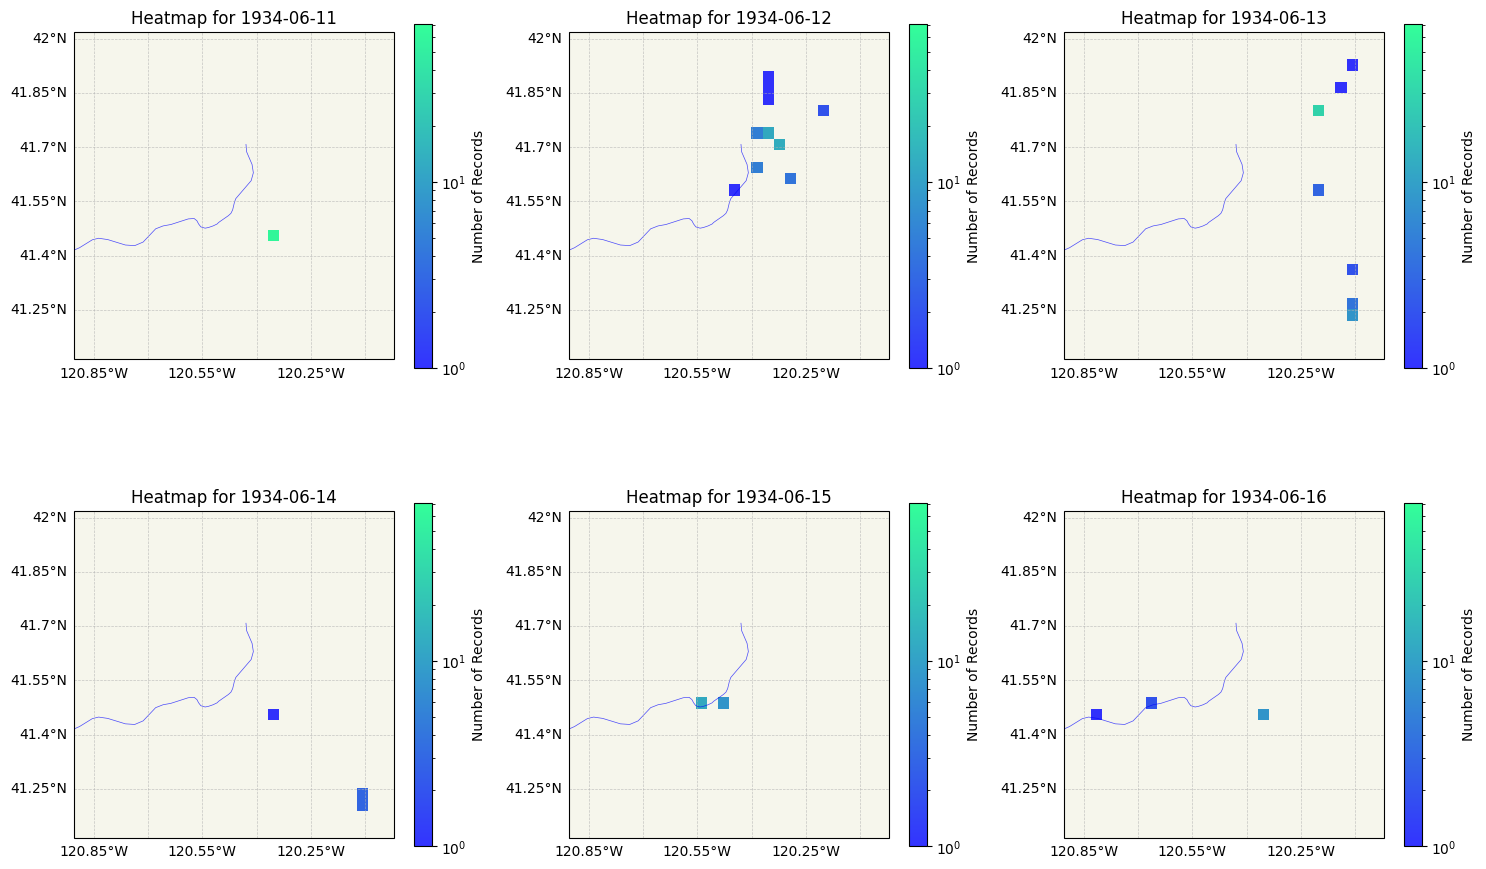

In [222]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [223]:
df.loc[group0_df.index, 'cluster'] = '0'
df[df.cluster == '0'].__len__()

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_29126/1027587913.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[group0_df.index, 'cluster'] = '0'


193

Now lets look at another cluster

### ii.) Cluster 1: 1934-08-01 (single day)

Now lets look at the cluster for the random id we initially pulled

In [30]:
cluster_date_l[3]

('1934-08-01', '1934-08-01')

In [225]:
group1_df = test_df[(pd.to_datetime(cluster_date_l[3][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[3][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group1_df

latitude1  longitude1              text1 remarks  \
33381    41.3619   -120.2372  Shrub 3-4 m high.     NaN   
18908    41.3619   -120.2372  Shrub 3-4 m high.     NaN   
29992    41.4543   -120.3276                NaN     NaN   
5355     41.3786   -120.2189                NaN     NaN   
12205    41.4543   -120.3276                NaN     NaN   
33018    41.3619   -120.2372  Shrub 3-4 m high.     NaN   
2981     41.3619   -120.2372  Shrub 3-4 m high.     NaN   
38595    41.3619   -120.2372  Shrub 3-4 m high.     NaN   

                        localityname  startdate    enddate  
33381  Pine Creek Basin, Warner Mts. 1934-08-01        NaT  
18908  Pine Creek Basin, Warner Mts. 1934-08-01        NaT  
29992                  Parker Creek. 1934-08-01 1934-08-01  
5355         E slope of Warren Peak. 1934-08-01 1934-08-01  
12205                  Parker Creek. 1934-08-01 1934-08-01  
33018  Pine Creek Basin, Warner Mts. 1934-08-01        NaT  
2981   Pine Creek Basin, Warner Mts. 1934-08-01        NaT  
38595  Pine Creek Basin, Warner Mts. 1934-08-01        NaT

All of the non-null text1 is about shrubs! Good sign for expedition goal

In [226]:
group1_df.localityname.value_counts()


localityname
Pine Creek Basin, Warner Mts.    5
Parker Creek.                    2
E slope of Warren Peak.          1
Name: count, dtype: int64

In [227]:
print('group 1 lats: ', group1_df.latitude1.unique())
print('group 1 longs: ', group1_df.longitude1.unique())
print('group 1 date range: ', group1_df.startdate.min(), group1_df.startdate.max())

group 1 lats:  [41.3619 41.4543 41.3786]
group 1 longs:  [-120.2372 -120.3276 -120.2189]
group 1 date range:  1934-08-01 00:00:00 1934-08-01 00:00:00


/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


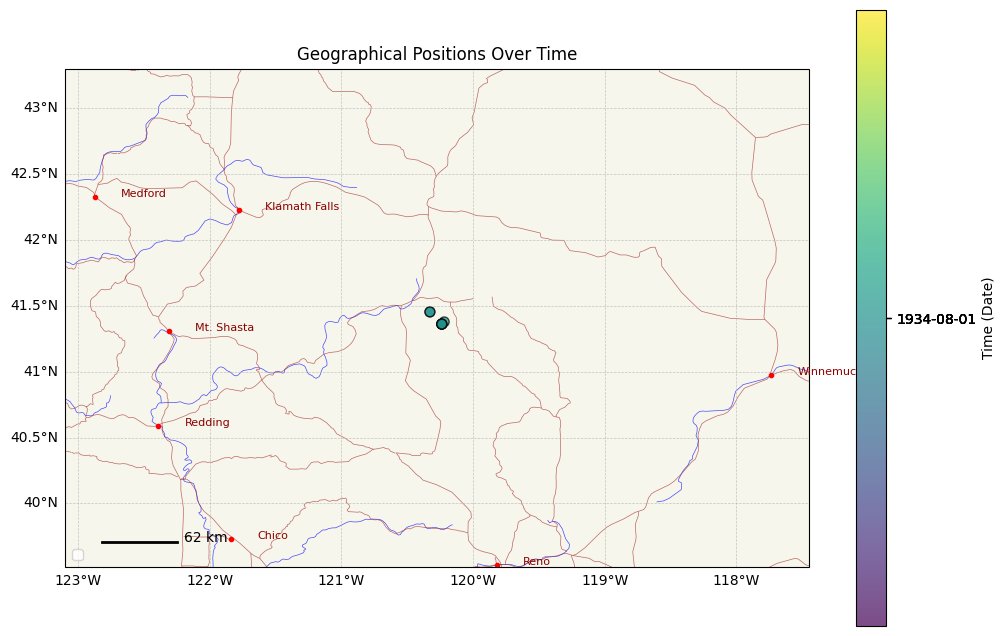

In [228]:
plot_geographical_positions(group1_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.05, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


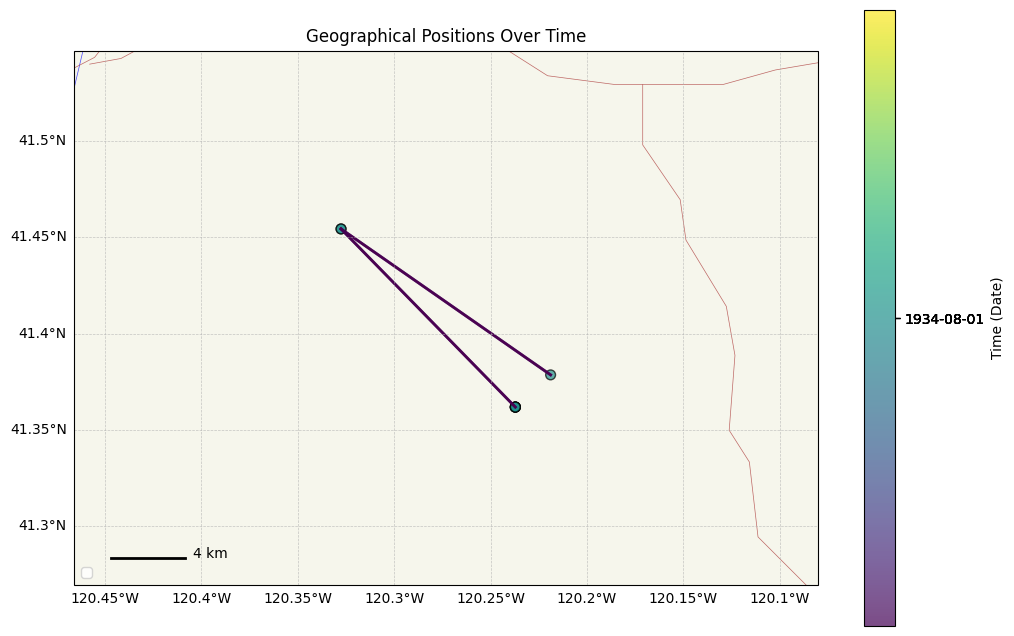

In [229]:
plot_geographical_positions(group1_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate', 
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

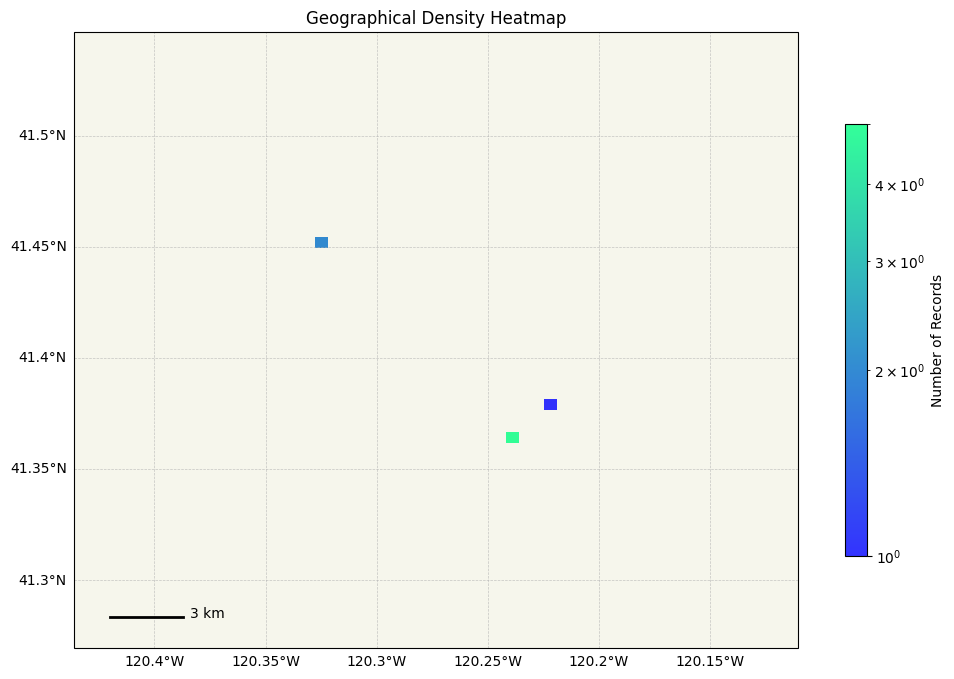

In [230]:
plot_geographical_heatmap(group1_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)

After checking a map - yes they all seem like the same cluster! 

In [231]:
group1_df[~group1_df.text1.isna()]

latitude1  longitude1              text1 remarks  \
33381    41.3619   -120.2372  Shrub 3-4 m high.     NaN   
18908    41.3619   -120.2372  Shrub 3-4 m high.     NaN   
33018    41.3619   -120.2372  Shrub 3-4 m high.     NaN   
2981     41.3619   -120.2372  Shrub 3-4 m high.     NaN   
38595    41.3619   -120.2372  Shrub 3-4 m high.     NaN   

                        localityname  startdate enddate  
33381  Pine Creek Basin, Warner Mts. 1934-08-01     NaT  
18908  Pine Creek Basin, Warner Mts. 1934-08-01     NaT  
33018  Pine Creek Basin, Warner Mts. 1934-08-01     NaT  
2981   Pine Creek Basin, Warner Mts. 1934-08-01     NaT  
38595  Pine Creek Basin, Warner Mts. 1934-08-01     NaT

In [232]:
group1_df.text1.value_counts()

text1
Shrub 3-4 m high.    5
Name: count, dtype: int64

Judging from the 72 rows from the entire data parker creek subset with the group 1 cluster date range with 60 day buffer on each side, we didn't miss any records for this cluster!

Let's label these records with cluster id '1'

In [233]:
df.loc[group1_df.index, 'cluster'] = '1'

In [234]:
df[df.cluster == '1'].__len__()

8

In [235]:
df[df.cluster == '1']

collectionobjectid              text1  countamt  collectingeventid  \
12205              104415                NaN       1.0            73033.0   
2981                24685  Shrub 3-4 m high.       1.0            59782.0   
33018              284659  Shrub 3-4 m high.       1.0           140824.0   
38595              332002  Shrub 3-4 m high.       1.0            59785.0   
5355                45606                NaN       1.0           113186.0   
29992              258210                NaN       1.0            73034.0   
18908              162204  Shrub 3-4 m high.       1.0            59783.0   
33381              287873  Shrub 3-4 m high.       1.0            59784.0   

       collectionobjectattachmentid  attachmentid  \
12205                      570849.0      570953.0   
2981                       258221.0      258324.0   
33018                      256339.0      256442.0   
38595                      257271.0      257374.0   
5355                            NaN           NaN   
29992                      570845.0      570949.0   
18908                      256344.0      256447.0   
33381                      257273.0      257376.0   

                             attachmentlocation  startdate    enddate remarks  \
12205  eb5e64d4-3da9-4ea8-9ecc-eb3f310048e9.jpg 1934-08-01 1934-08-01     NaN   
2981   4415435d-ab66-4d4e-9eab-93e1e2a78d50.jpg 1934-08-01        NaT     NaN   
33018  d4f9858e-107a-4daf-ac64-a0c751293b83.jpg 1934-08-01        NaT     NaN   
38595  bdf2a19d-945f-4f5b-b984-3f09c32a4b2a.jpg 1934-08-01        NaT     NaN   
5355                                        NaN 1934-08-01 1934-08-01     NaN   
29992  93295d76-a026-4dca-8d53-5a3be6ec3250.jpg 1934-08-01 1934-08-01     NaN   
18908  8b9731d5-1857-4291-9e84-03e6b5c1a16e.jpg 1934-08-01        NaT     NaN   
33381  2d0fbd38-ff06-4461-98b1-472585918a2d.jpg 1934-08-01        NaT     NaN   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
12205  ...        5200.0                0.0    41.4543   -120.3276   
2981   ...        7600.0                0.0    41.3619   -120.2372   
33018  ...        7600.0                0.0    41.3619   -120.2372   
38595  ...        7600.0                0.0    41.3619   -120.2372   
5355   ...           NaN                NaN    41.3786   -120.2189   
29992  ...        5200.0                0.0    41.4543   -120.3276   
18908  ...        7600.0                0.0    41.3619   -120.2372   
33381  ...        7600.0                0.0    41.3619   -120.2372   

                        localityname  namedplace geographyid cluster  \
12205                  Parker Creek.         NaN     17158.0       1   
2981   Pine Creek Basin, Warner Mts.         NaN     17158.0       1   
33018  Pine Creek Basin, Warner Mts.         NaN     17158.0       1   
38595  Pine Creek Basin, Warner Mts.         NaN     17158.0       1   
5355         E slope of Warren Peak.         NaN     17158.0       1   
29992                  Parker Creek.         NaN     17158.0       1   
18908  Pine Creek Basin, Warner Mts.         NaN     17158.0       1   
33381  Pine Creek Basin, Warner Mts.         NaN     17158.0       1   

       startdate_num   enddate_num  
12205  -1.117757e+09 -1.117757e+09  
2981   -1.117757e+09 -9.223372e+09  
33018  -1.117757e+09 -9.223372e+09  
38595  -1.117757e+09 -9.223372e+09  
5355   -1.117757e+09 -1.117757e+09  
29992  -1.117757e+09 -1.117757e+09  
18908  -1.117757e+09 -9.223372e+09  
33381  -1.117757e+09 -9.223372e+09  

[8 rows x 22 columns]

### iii.) Cluster 2: 1934-07-13 (single record!)

Now lets look at the cluster for a single record. 

In [236]:
cluster_date_l[2]

('1934-07-13', '1934-07-13')

In [237]:
group2_df = test_df[(pd.to_datetime(cluster_date_l[2][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[2][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group2_df

latitude1  longitude1 text1 remarks             localityname  \
35041    41.2323   -120.0991   NaN     NaN  N fork of Barber Creek.   

       startdate    enddate  
35041 1934-07-13 1934-07-13

All of the non-null text1 is about shrubs! Good sign for expedition goal

In [238]:
group2_df.localityname.value_counts()


localityname
N fork of Barber Creek.    1
Name: count, dtype: int64

In [239]:
print('group 2 lats: ', group2_df.latitude1.unique())
print('group 2 longs: ', group2_df.longitude1.unique())
print('group 2 date range: ', group2_df.startdate.min(), group2_df.startdate.max())

group 2 lats:  [41.2323]
group 2 longs:  [-120.0991]
group 2 date range:  1934-07-13 00:00:00 1934-07-13 00:00:00


/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


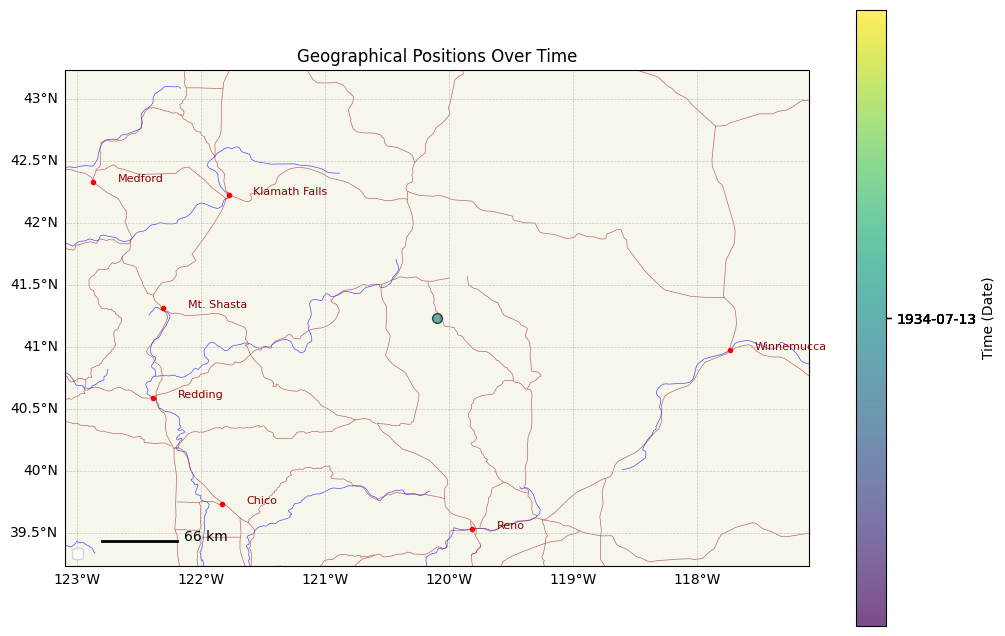

In [240]:
plot_geographical_positions(group2_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=.05, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


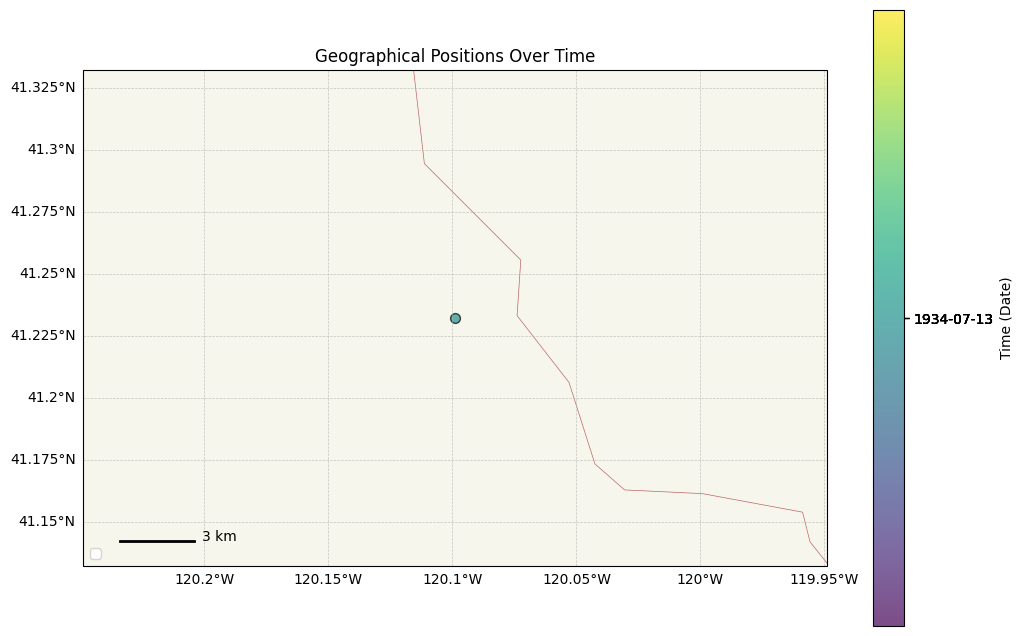

In [241]:
plot_geographical_positions(group2_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate', 
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [242]:
df.loc[group2_df.index, 'cluster'] = '2'

In [243]:
df[df.cluster == '2']

collectionobjectid text1  countamt  collectingeventid  \
35041              301707   NaN       1.0           136411.0   

       collectionobjectattachmentid  attachmentid  \
35041                      298293.0      298396.0   

                             attachmentlocation  startdate    enddate remarks  \
35041  73469558-4f2a-4774-bb4d-96c12979b39c.jpg 1934-07-13 1934-07-13     NaN   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
35041  ...        6000.0                0.0    41.2323   -120.0991   

                  localityname  namedplace geographyid cluster  startdate_num  \
35041  N fork of Barber Creek.         NaN     17158.0       2  -1.119398e+09   

        enddate_num  
35041 -1.119398e+09  

[1 rows x 22 columns]

## b.) Collection Object ID: 65724

In [31]:
samp_collobjid_l[1]

65724

In [32]:
samp_record = df[df.collectionobjectid == samp_collobjid_l[1]]
samp_record

collectionobjectid                         text1  countamt  \
7626               65724  Shrub ca. 3 m tall.  In bud.       7.0   

      collectingeventid  collectionobjectattachmentid  attachmentid  \
7626            45167.0                           NaN           NaN   

     attachmentlocation  startdate enddate                        remarks  \
7626                NaN 1998-10-21     NaT  Broadleaved evergreen forest.   

      ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
7626  ...           NaN                NaN  24.830837   98.767784   

                                           localityname  namedplace  \
7626  Nankang, on the E side of Gaoligong Shan near ...         NaN   

     geographyid cluster  startdate_num   enddate_num  
7626     33285.0     NaN    908928000.0 -9.223372e+09  

[1 rows x 22 columns]

In [33]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 24.8308372498     lon: 98.7677841187     start date: 1998-10-21T00:00:00.000000000


In [35]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 2].sort_values(by='startdate')

# Filter overall df to only records within 2º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 2].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [36]:
test_df

collectionobjectid                                              text1  \
39142              336702                                 Tree ca. 5 m tall.   
20575              177084                       Twining vine.  Flowers blue.   
43988              378609  Perennial herb to 1.5 m tall.  Trifoliate.  St...   
27554              237044                   Tree ca. 4 m tall.  Fruit brown.   
34140              294550                    Shrub ca. 4 m tall.  Fruit red.   
...                   ...                                                ...   
36790              316675  Scandent shrub ca. 2.5 m tall.  Sterile flower...   
40525              348992                       Twining vine.  Fruit yellow.   
8821                75582                   Perennial herb.  Flowers yellow.   
25664              220870                    Ascending shrub ca. 80 cm tall.   
28941              248905          Diffuse shrub 2-3 m tall.  Flowers white.   

       countamt  collectingeventid  collectionobjectattachmentid  \
39142       7.0             2532.0                           NaN   
20575       7.0             2150.0                           NaN   
43988       8.0            83589.0                      158368.0   
27554       7.0           147592.0                           NaN   
34140       7.0            85908.0                      120612.0   
...         ...                ...                           ...   
36790       7.0           144307.0                           NaN   
40525       2.0            67676.0                           NaN   
8821        8.0           128809.0                           NaN   
25664       7.0           136210.0                           NaN   
28941       7.0           139778.0                           NaN   

       attachmentid                        attachmentlocation  startdate  \
39142           NaN                                       NaN 1998-10-11   
20575           NaN                                       NaN 1998-10-11   
43988      158369.0  d1915177-bced-4567-b7d7-321554beade7.jpg 1998-10-11   
27554           NaN                                       NaN 1998-10-11   
34140      120613.0  65f6cdb2-527a-47f2-9eb5-86e2bdc057ca.jpg 1998-10-11   
...             ...                                       ...        ...   
36790           NaN                                       NaN 1998-11-08   
40525           NaN                                       NaN 1998-11-08   
8821            NaN                                       NaN 1998-11-08   
25664           NaN                                       NaN 1998-11-08   
28941           NaN                                       NaN 1998-11-08   

         enddate                                            remarks  ...  \
39142 1998-10-11                        Secondary shrub vegetation.  ...   
20575 1998-10-11                      Broadleaved evergreen forest.  ...   
43988        NaT                      Broadleaved evergreen forest.  ...   
27554        NaT                      Broadleaved evergreen forest.  ...   
34140        NaT  Secondary broadleaved evergreen forest dominat...  ...   
...          ...                                                ...  ...   
36790        NaT            Secondary broadleaved evergreen forest.  ...   
40525        NaT            Secondary broadleaved evergreen forest.  ...   
8821  1998-11-08            Secondary broadleaved evergreen forest.  ...   
25664 1998-11-08            Secondary broadleaved evergreen forest.  ...   
28941 1998-11-08            Secondary broadleaved evergreen forest.  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
39142        1300.0                0.0  25.950000   98.826667   
20575        2380.0                0.0  26.000556   98.661944   
43988           NaN                NaN  26.000555   98.661942   
27554           NaN                NaN  25.960556   98.720284   
34140           NaN                NaN  25.962500   98.826111   
...          

In [37]:
test_df.startdate.value_counts()

startdate
1998-10-11    87
1998-10-21    76
1998-10-18    72
1998-10-28    68
1998-10-12    58
1998-11-03    55
1998-10-29    55
1998-11-04    52
1998-10-27    52
1998-10-16    51
1998-11-02    49
1998-10-14    42
1998-10-13    41
1998-10-25    37
1998-10-26    34
1998-11-06    34
1998-10-23    33
1998-11-07    29
1998-10-22    27
1998-10-30    27
1998-10-24    26
1998-10-19    22
1998-11-05    20
1998-11-08    17
1998-10-17    15
1998-10-15    15
1998-10-31    12
1998-10-20     1
Name: count, dtype: int64

In [38]:
test_df.localityname.value_counts()

localityname
Datianpo Cun, on the W side of Gaoligong Shan between Daheping and the pass dividing the Irrawaddy and Salween           54
Nankang, on the E side of Gaoligong Shan near the divide between the Salween and Irrawaddy watersheds.                   49
Laomiancheng, S of Mangkuan on the E side of Gaoligong Shan.                                                             43
Qingcaitang, on the old road from Tengchong to Baoshan between Tengchong and the Longchuan Jiang.                        40
Shaba Cun, Tientai Shan, on the W side of Gaoligong Shan.                                                                38
                                                                                                                         ..
Gulang, between Pianma and Gangfang, N of Pianma along the Myanmar border, on the W side of Gaoligong Shan.               1
Ganghelu, between Pianma and Gangfang, N of Pianma along the Myanmar border, on the W side of Gaoligong Shan.          

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [39]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1998-10-11 00:00:00', '1998-10-12 00:00:00', '1998-10-13 00:00:00',
 '1998-10-14 00:00:00', '1998-10-15 00:00:00', '1998-10-16 00:00:00',
 '1998-10-17 00:00:00', '1998-10-18 00:00:00', '1998-10-19 00:00:00',
 '1998-10-20 00:00:00', '1998-10-21 00:00:00', '1998-10-22 00:00:00',
 '1998-10-23 00:00:00', '1998-10-24 00:00:00', '1998-10-25 00:00:00',
 '1998-10-26 00:00:00', '1998-10-27 00:00:00', '1998-10-28 00:00:00',
 '1998-10-29 00:00:00', '1998-10-30 00:00:00', '1998-10-31 00:00:00',
 '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00',
 '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-07 00:00:00',
 '1998-11-08 00:00:00']
Length: 28, dtype: datetime64[ns]

This all looks like one big cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


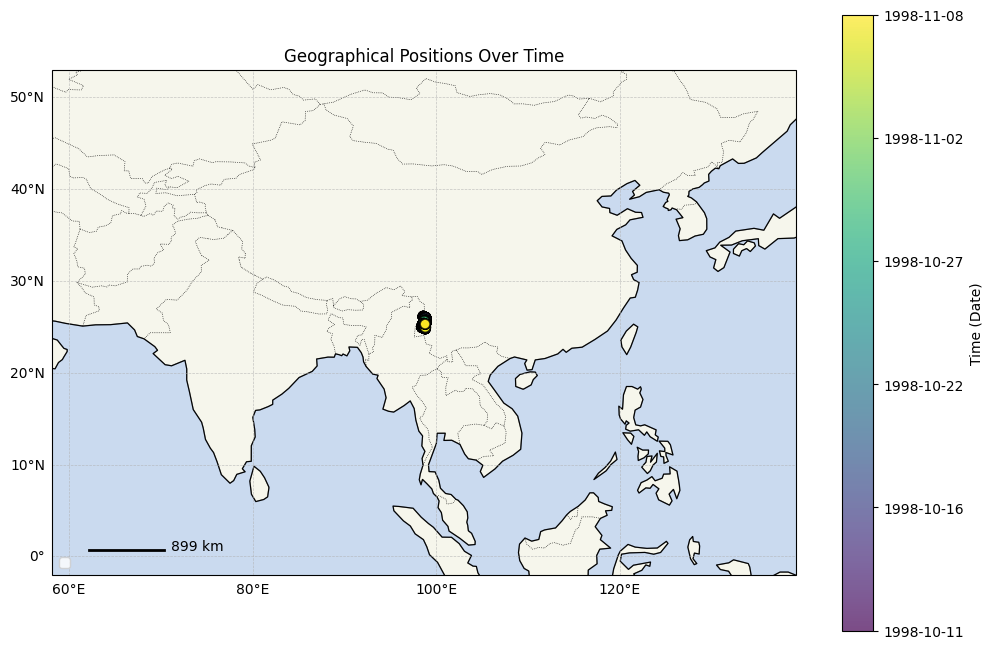

In [42]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.05, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


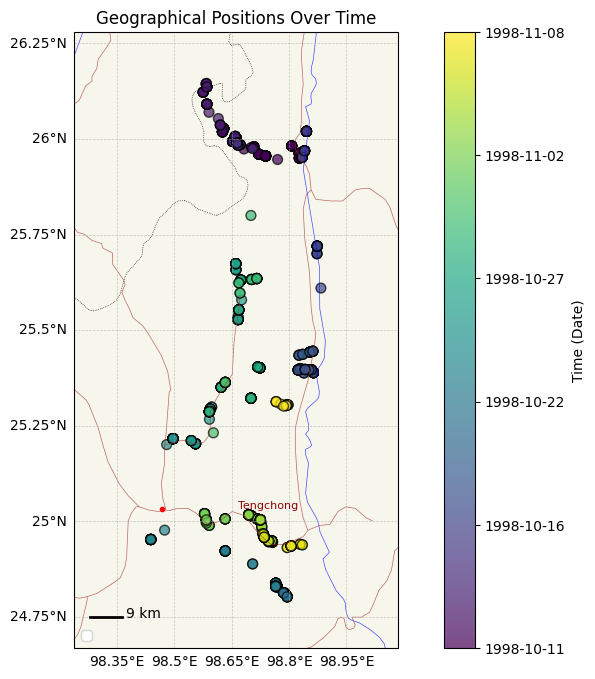

In [43]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


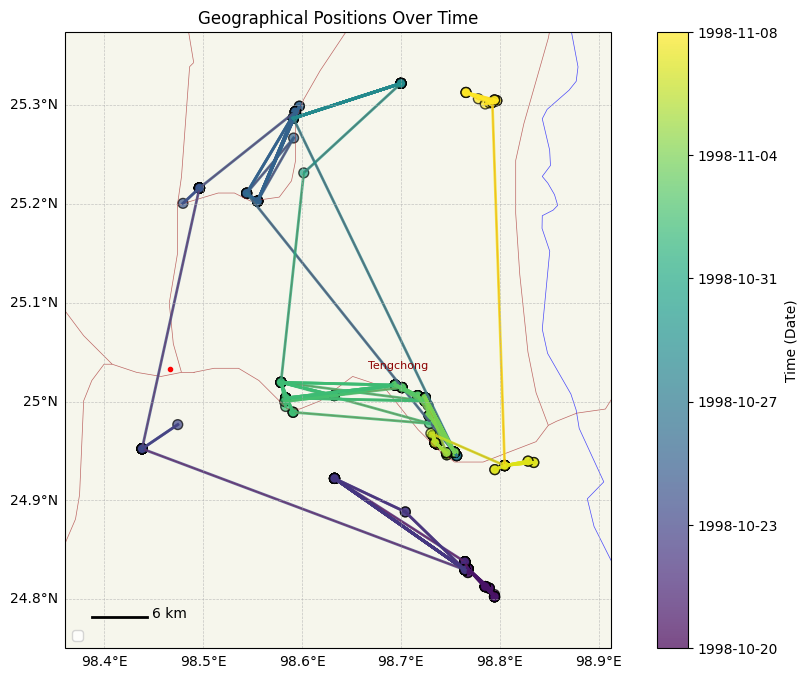

In [254]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

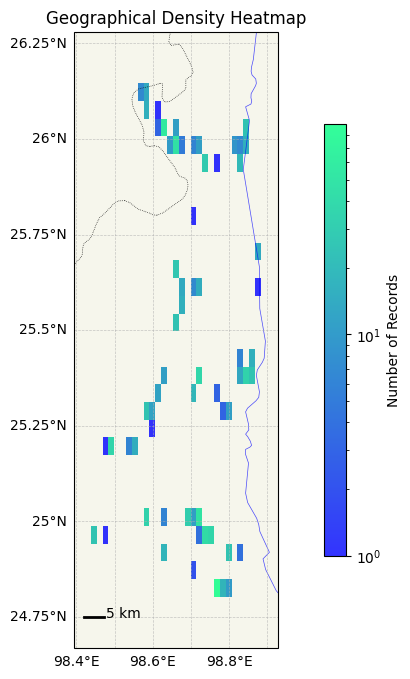

In [44]:
plot_geographical_heatmap(test_df, lat_col='latitude1', lon_col='longitude1', grid_size=30,
                          zoom='auto',  plot_rivers=True, plot_roads=True)


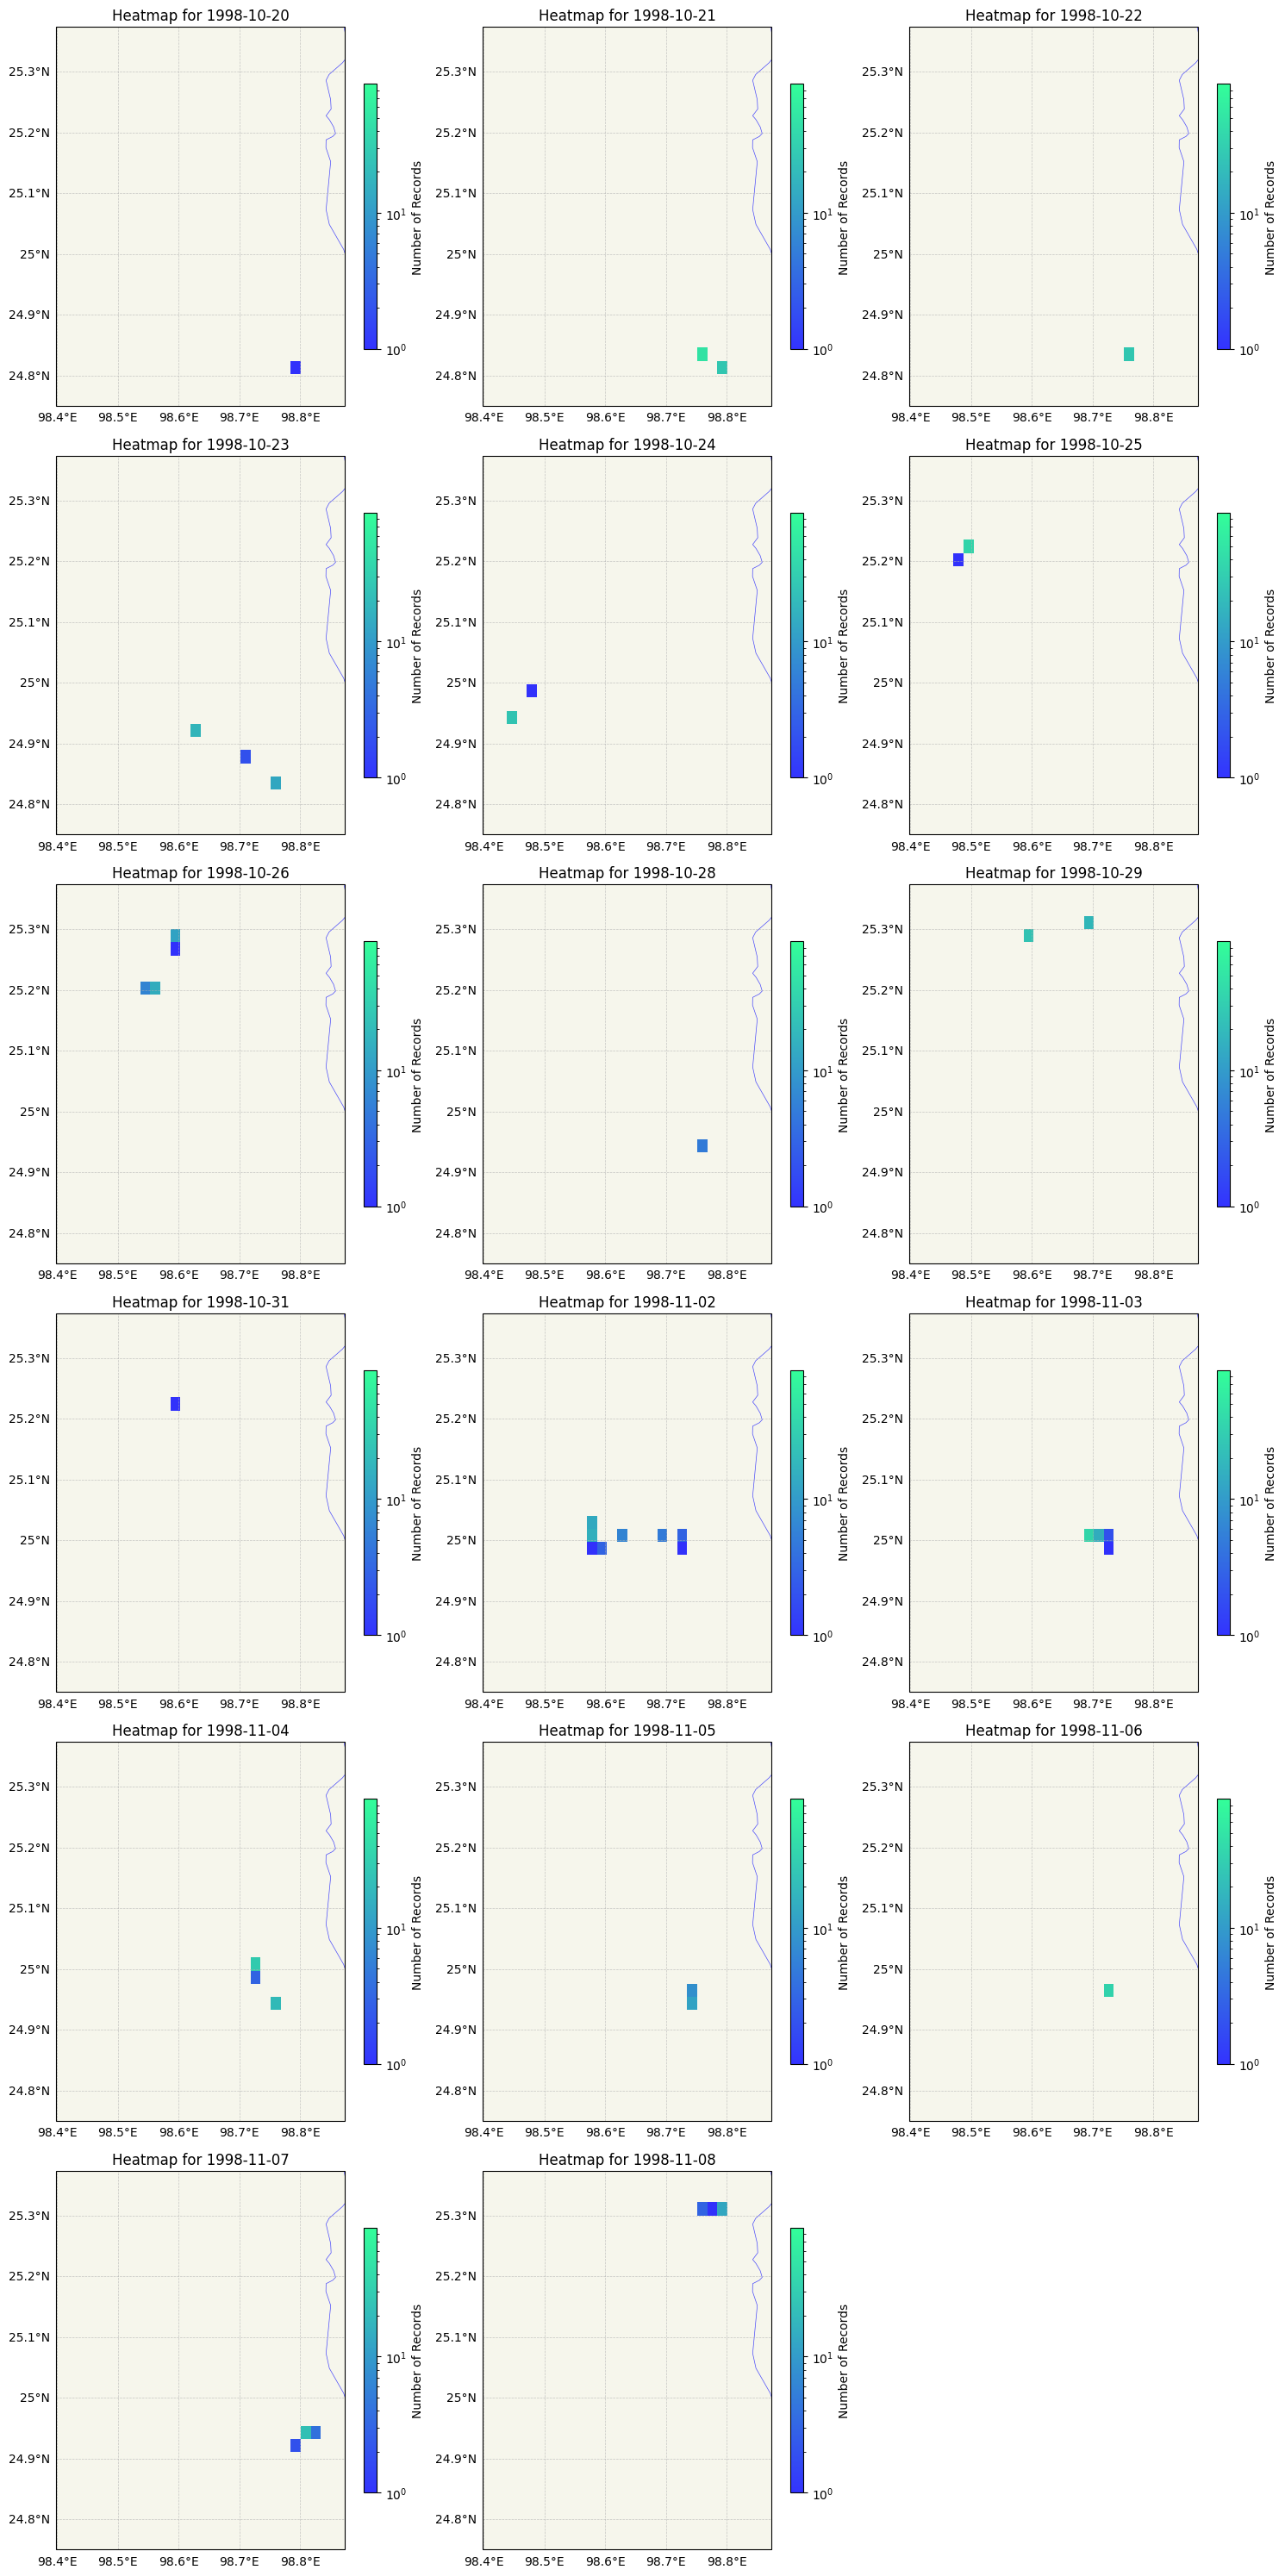

In [256]:
plot_geographical_heatmap_by_day(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

539 records - lets check it out as our first cluster

In [257]:
test_df.startdate.min()

Timestamp('1998-10-20 00:00:00')

### i.) Cluster 3: ('1998-10-20', '1998-11-08')

In [258]:
group0_df = test_df

group0_df

collectionobjectid                                              text1  \
150                  1240                                    Tree 20 m tall.   
35764              307996                                    Epiphytic fern.   
7152                61400                 Shrub ca. 3 m tall.  Flowers pink.   
30053              258674                       Epiphytic orchid.  In fruit.   
22185              190929                         Perennial herb.  In fruit.   
...                   ...                                                ...   
40525              348992                       Twining vine.  Fruit yellow.   
8821                75582                   Perennial herb.  Flowers yellow.   
36790              316675  Scandent shrub ca. 2.5 m tall.  Sterile flower...   
36527              314503    Perennial herb ca. 50 cm tall.  Flowers yellow.   
25852              222546              Shrub ca. 2 m tall.  Fruit dark blue.   

       countamt  collectingeventid  collectionobjectattachmentid  \
150         7.0            45818.0                           NaN   
35764       7.0            32966.0                           NaN   
7152        6.0            90886.0                      143118.0   
30053       4.0            77475.0                           NaN   
22185       5.0            98647.0                           NaN   
...         ...                ...                           ...   
40525       2.0            67676.0                           NaN   
8821        8.0           128809.0                           NaN   
36790       7.0           144307.0                           NaN   
36527      10.0             2949.0                           NaN   
25852       8.0            44530.0                           NaN   

       attachmentid                        attachmentlocation  startdate  \
150             NaN                                       NaN 1998-10-20   
35764           NaN                                       NaN 1998-10-21   
7152       143119.0  cbb07d02-d77e-4a50-a74e-6ef457e464d2.jpg 1998-10-21   
30053           NaN                                       NaN 1998-10-21   
22185           NaN                                       NaN 1998-10-21   
...             ...                                       ...        ...   
40525           NaN                                       NaN 1998-11-08   
8821            NaN                                       NaN 1998-11-08   
36790           NaN                                       NaN 1998-11-08   
36527           NaN                                       NaN 1998-11-08   
25852           NaN                                       NaN 1998-11-08   

         enddate                                            remarks  ...  \
150          NaT                Moist broadleaved evergreen forest.  ...   
35764        NaT  Broadleaved evergreen forest dominated by Faga...  ...   
7152         NaT            Disturbed broadleaved evergreen forest.  ...   
30053        NaT  Broadleaved evergreen forest dominated by Faga...  ...   
22185        NaT            Disturbed broadleaved evergreen forest.  ...   
...          ...                                                ...  ...   
40525        NaT            Secondary broadleaved evergreen forest.  ...   
8821  1998-11-08            Secondary broadleaved evergreen forest.  ...   
36790        NaT            Secondary broadleaved evergreen forest.  ...   
36527 1998-11-08                                                NaN  ...   
25852        NaT            Secondary broadleaved evergreen forest.  ...   

       elevationaccuracy  latitude1  longitude1  \
150                  NaN  24.804722   98.794716   
35764                NaN  24.812778   98.785271   
7152                 NaN  24.802500   98.794716   
30053                NaN  24.812778   98.785271   
22185                NaN  24.802500   98.794716   
...                  ...        ...         ...   
40525                NaN  25.305277   98.79471

In [259]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.00927643784786642)

In [260]:
group0_df.text1.value_counts()

text1
Epiphytic fern.                                                                         13
Perennial herb.                                                                         11
Tree ca. 10 m tall.                                                                     10
Shrub ca. 2 m tall.                                                                      5
Perennial grass.                                                                         4
                                                                                        ..
Perennial herb.  Flowers pale purple.                                                    1
Herb.  30 cm to 3 m tall.  Florets pink.                                                 1
Annual herb 20-50 cm tall.  Corolla white with a single green dot at base of petals.     1
Trailing perennial herb.                                                                 1
Shrub ca. 2 m tall.  Fruit dark blue.                                               

In [261]:
group0_df.localityname.value_counts()

localityname
Datianpo Cun, on the W side of Gaoligong Shan between Daheping and the pass dividing the Irrawaddy and Salween              54
Nankang, on the E side of Gaoligong Shan near the divide between the Salween and Irrawaddy watersheds.                      49
Qingcaitang, on the old road from Tengchong to Baoshan between Tengchong and the Longchuan Jiang.                           40
Xiaokong Shan volcano to the N of Tengchong.                                                                                36
On the E side of Gaoligong Shan, on the old road from Baoshan to Tengchong.                                                 29
Chuanlong Cun, on the W side of Gaoligong Shan near Km 96 on the old road from Baoshan to Tengchong.                        29
Zhenganzheng, Xiaoshui He, on the W side of Gaoligong Shan near the divide between the Irrawaddy and Salween watersheds.    27
Zhenganzheng, Lishuzhai, on the E side of Gaoligong Shan near the divide between the Salween Irraw

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [262]:
df.loc[group0_df.index, 'cluster'] = '3'
df[df.cluster == '3'].__len__()

539

## c.) Collection Object ID: 365383

In [263]:
samp_collobjid_l[2]

365383

In [45]:
samp_record = df[df.collectionobjectid == samp_collobjid_l[2]]
samp_record

collectionobjectid              text1  countamt  collectingeventid  \
42474              365383  Vine. Buds green.       7.0           101453.0   

       collectionobjectattachmentid  attachmentid attachmentlocation  \
42474                           NaN           NaN                NaN   

       startdate enddate                                          remarks  \
42474 2004-04-21     NaT  Disturbed secondary vegetation along riverside.   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
42474  ...           NaN                NaN  26.908194   98.861832   

                                            localityname  namedplace  \
42474  Shangpa, Laoqiao Cun, W side of the Nujiang di...         NaN   

      geographyid cluster  startdate_num   enddate_num  
42474     33248.0     NaN   1.082506e+09 -9.223372e+09  

[1 rows x 22 columns]

In [46]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 26.9081935883     lon: 98.861831665     start date: 2004-04-21T00:00:00.000000000


In [47]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 2].sort_values(by='startdate')

# Filter overall df to only records within 2º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 2].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [48]:
test_df

collectionobjectid                                              text1  \
2359                19625  Scrambling perennial herb. To 30 cm tall. Flow...   
14031              120141  Tree. Up to 10 m. Flower white with pink marki...   
19864              170706                        Perennial herb. To 1m tall.   
9187                78619                                    Perennial herb.   
249                  2072                      Shrub 1-8 m tall. Buds green.   
...                   ...                                                ...   
11327               96848               Tree, 7-8 m tall. Young fruit green.   
34440              296882                 Tree, 7-8 m tall. Flower greenish.   
4975                42064                     Tree, 15 cm. Flower bud green.   
37876              326183        Perennial herb. 10-15 cm tall. Spike green.   
33007              284562  Shrub or small tree, 2 m tall. Young fruit green.   

       countamt  collectingeventid  collectionobjectattachmentid  \
2359       12.0           136324.0                           NaN   
14031       5.0           121086.0                      210512.0   
19864       6.0            47389.0                           NaN   
9187        3.0            10604.0                           NaN   
249         6.0            82690.0                           NaN   
...         ...                ...                           ...   
11327      10.0            52370.0                           NaN   
34440       7.0           115618.0                           NaN   
4975        8.0           142031.0                           NaN   
37876       5.0            58134.0                           NaN   
33007       7.0           102903.0                           NaN   

       attachmentid                        attachmentlocation  startdate  \
2359            NaN                                       NaN 2004-04-21   
14031      210615.0  d8cef779-0f23-4685-b7e8-a5a6337e39cf.jpg 2004-04-21   
19864           NaN                                       NaN 2004-04-21   
9187            NaN                                       NaN 2004-04-21   
249             NaN                                       NaN 2004-04-21   
...             ...                                       ...        ...   
11327           NaN                                       NaN 2004-05-10   
34440           NaN                                       NaN 2004-05-10   
4975            NaN                                       NaN 2004-05-10   
37876           NaN                                       NaN 2004-05-10   
33007           NaN                                       NaN 2004-05-10   

         enddate                                            remarks  ...  \
2359  2004-04-21    Disturbed secondary vegetation along riverside.  ...   
14031 2004-04-21    Disturbed secondary vegetation along riverside.  ...   
19864        NaT                                                NaN  ...   
9187         NaT    Disturbed secondary vegetation along riverside.  ...   
249          NaT    Disturbed secondary vegetation along riverside.  ...   
...          ...                                                ...  ...   
11327        NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
34440        NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
4975         NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
37876 2004-05-10  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
33007        NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
2359         1180.0                0.0  26.912778   98.852222   
14031        1180.0                0.0  26.912778   98.852222   
19864           NaN                NaN  26.868364   98.865776   
9187            NaN                NaN  26.912750   98.852272   
249             NaN                NaN  26.909666   98.863167   
...          

In [49]:
test_df.startdate.value_counts()

startdate
2004-05-02    170
2004-04-28    141
2004-05-09    124
2004-05-01    113
2004-05-08    101
2004-04-26     84
2004-04-21     82
2004-05-07     58
2004-04-27     58
2004-04-22     53
2004-04-25     44
2004-04-30     39
2004-05-05     38
2004-04-23     37
2004-04-24     33
2004-05-06     19
2004-05-10     13
Name: count, dtype: int64

In [50]:
test_df.localityname.value_counts()

localityname
Shangpa, Laoqiao Cun, W side of the Nujiang directly opposite Fugong city.                                                                         56
Vicinity of Shibali logging station on the road from the Nujiang to Yaping pass, E side of Gaoligong Shan.                                         47
Vicinity of the hydro-electric station near Pihe Qiao, on the W side of the Nujiang, ca. 19.8 direct km N of Fugong                                39
Qiaotou Cun, directly opposite the S end of Fugong city, on the W side of the Nujiang.                                                             39
Laowuodong Qiao, on the W side of the Nujiang, just S of the border with Gongshan Xian.                                                            35
                                                                                                                                                   ..
In the vicinity of Yaping near the Myanmar border, E side of Gaoligong Shan.           

Okay, now there's a little more variation in localityname. 

There's still the Parker Creek group, but now there's also Alturas/Dorris, and Canby groups. Do we think these are part of the same cluster?

In [51]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2004-04-21 00:00:00', '2004-04-22 00:00:00', '2004-04-23 00:00:00',
 '2004-04-24 00:00:00', '2004-04-25 00:00:00', '2004-04-26 00:00:00',
 '2004-04-27 00:00:00', '2004-04-28 00:00:00', '2004-04-30 00:00:00',
 '2004-05-01 00:00:00', '2004-05-02 00:00:00', '2004-05-05 00:00:00',
 '2004-05-06 00:00:00', '2004-05-07 00:00:00', '2004-05-08 00:00:00',
 '2004-05-09 00:00:00', '2004-05-10 00:00:00']
Length: 17, dtype: datetime64[ns]

This all looks like one big cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


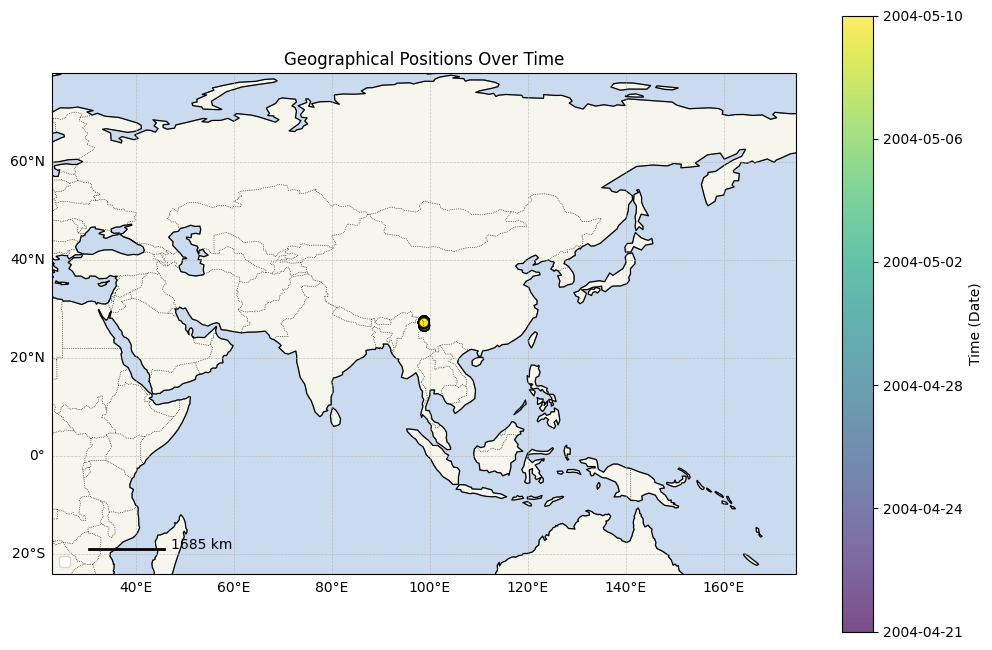

In [52]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.02, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


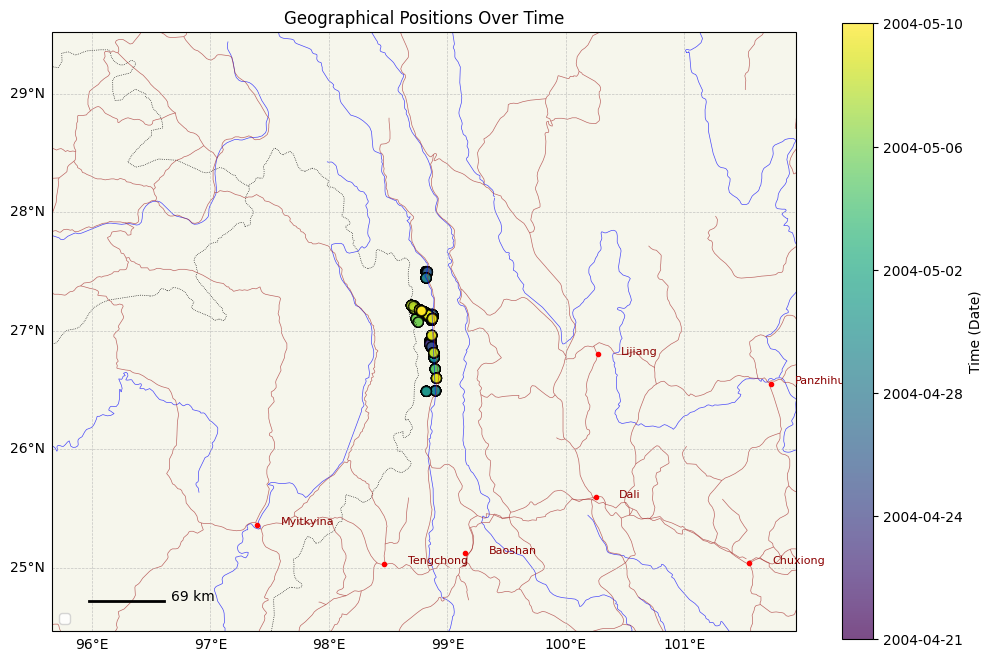

In [53]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.5, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


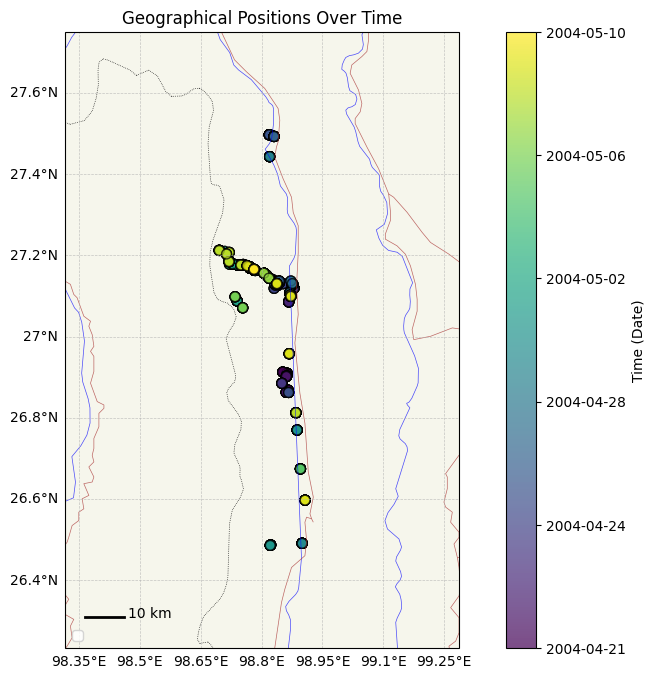

In [54]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


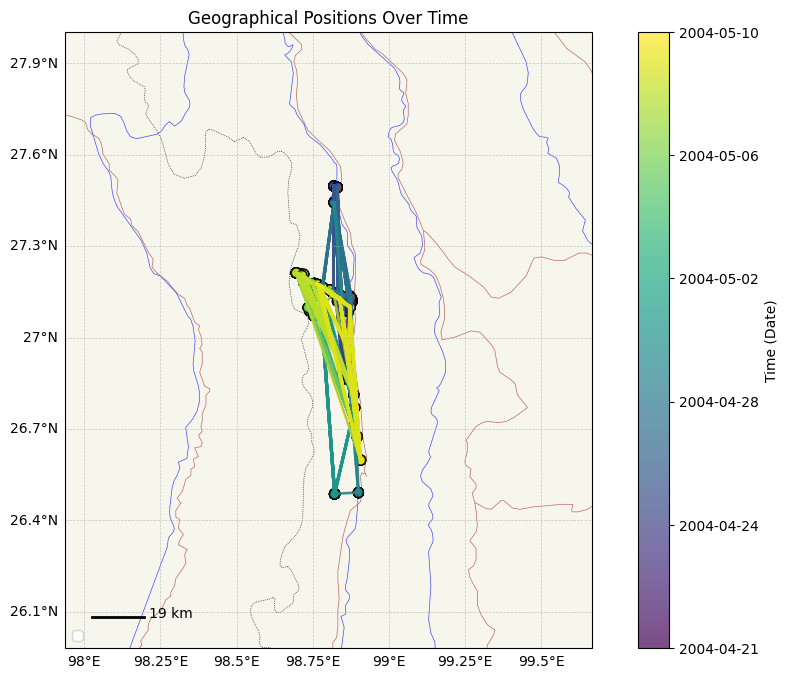

In [55]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

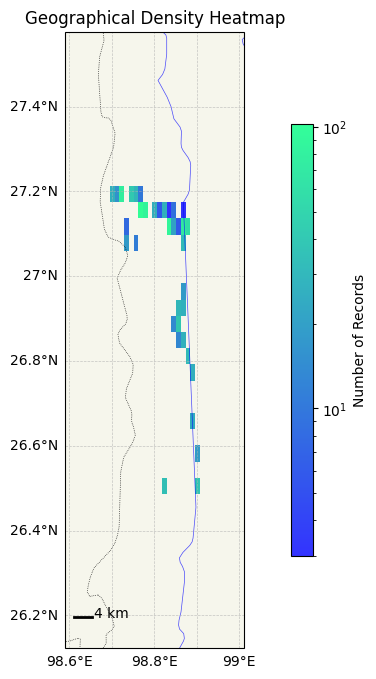

In [275]:
plot_geographical_heatmap(test_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


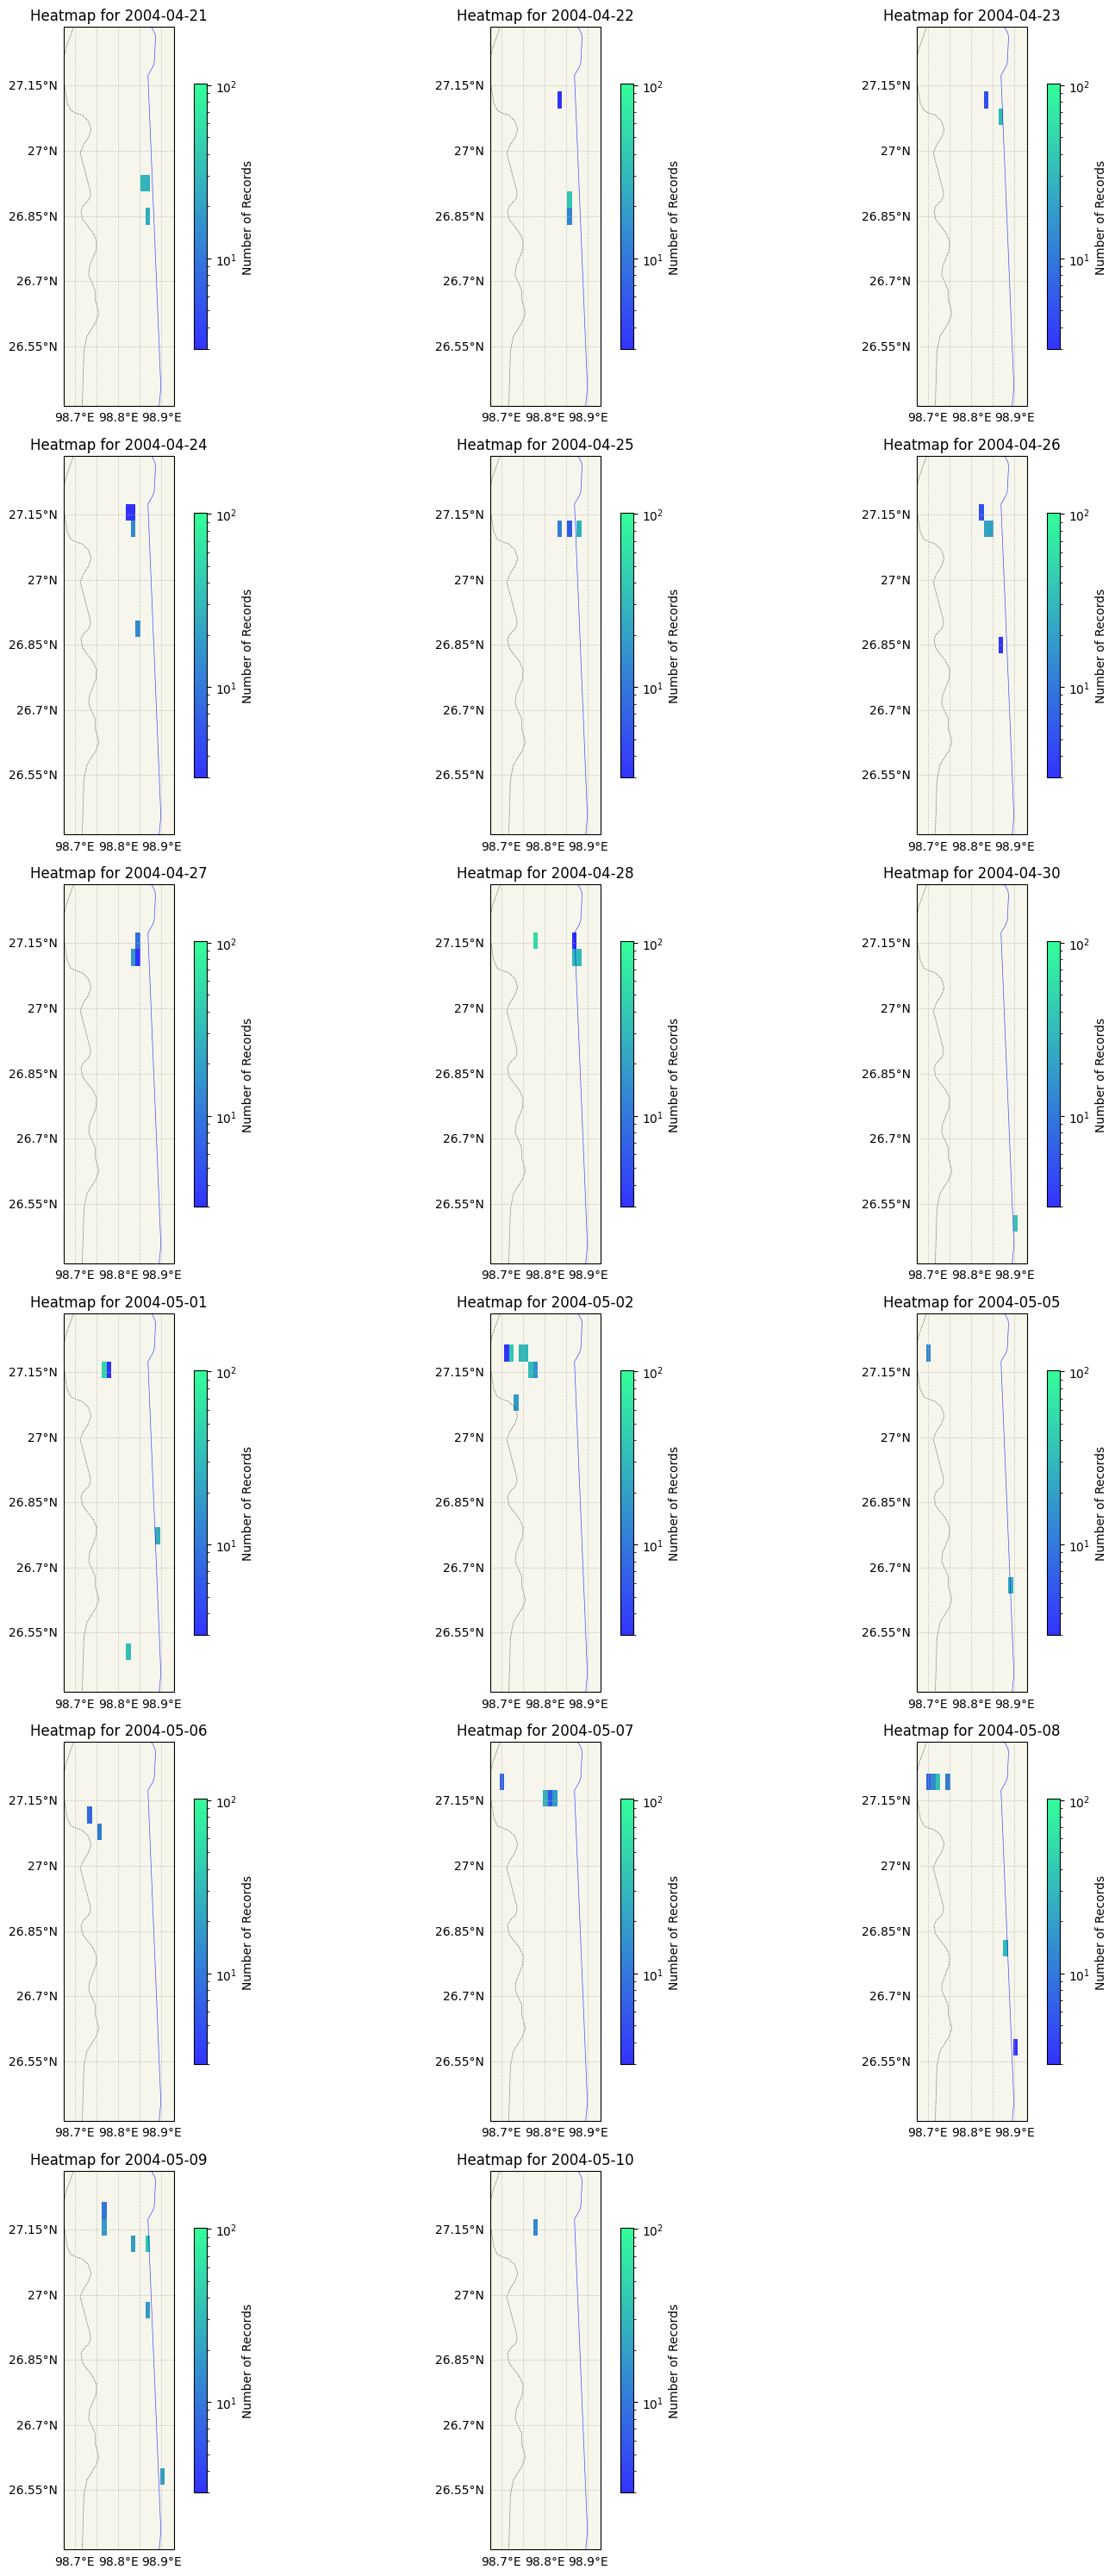

In [276]:
plot_geographical_heatmap_by_day(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                                 zoom=2, plot_rivers=True, plot_roads=True, grid_size=20)

539 records, and it all looks like one cluster! - lets check it out as our first cluster

In [277]:
test_df.startdate.min()

Timestamp('2004-04-21 00:00:00')

### i.) Cluster 4: ('1998-10-20', '1998-11-08')

In [56]:
group0_df = test_df

group0_df

collectionobjectid                                              text1  \
2359                19625  Scrambling perennial herb. To 30 cm tall. Flow...   
14031              120141  Tree. Up to 10 m. Flower white with pink marki...   
19864              170706                        Perennial herb. To 1m tall.   
9187                78619                                    Perennial herb.   
249                  2072                      Shrub 1-8 m tall. Buds green.   
...                   ...                                                ...   
11327               96848               Tree, 7-8 m tall. Young fruit green.   
34440              296882                 Tree, 7-8 m tall. Flower greenish.   
4975                42064                     Tree, 15 cm. Flower bud green.   
37876              326183        Perennial herb. 10-15 cm tall. Spike green.   
33007              284562  Shrub or small tree, 2 m tall. Young fruit green.   

       countamt  collectingeventid  collectionobjectattachmentid  \
2359       12.0           136324.0                           NaN   
14031       5.0           121086.0                      210512.0   
19864       6.0            47389.0                           NaN   
9187        3.0            10604.0                           NaN   
249         6.0            82690.0                           NaN   
...         ...                ...                           ...   
11327      10.0            52370.0                           NaN   
34440       7.0           115618.0                           NaN   
4975        8.0           142031.0                           NaN   
37876       5.0            58134.0                           NaN   
33007       7.0           102903.0                           NaN   

       attachmentid                        attachmentlocation  startdate  \
2359            NaN                                       NaN 2004-04-21   
14031      210615.0  d8cef779-0f23-4685-b7e8-a5a6337e39cf.jpg 2004-04-21   
19864           NaN                                       NaN 2004-04-21   
9187            NaN                                       NaN 2004-04-21   
249             NaN                                       NaN 2004-04-21   
...             ...                                       ...        ...   
11327           NaN                                       NaN 2004-05-10   
34440           NaN                                       NaN 2004-05-10   
4975            NaN                                       NaN 2004-05-10   
37876           NaN                                       NaN 2004-05-10   
33007           NaN                                       NaN 2004-05-10   

         enddate                                            remarks  ...  \
2359  2004-04-21    Disturbed secondary vegetation along riverside.  ...   
14031 2004-04-21    Disturbed secondary vegetation along riverside.  ...   
19864        NaT                                                NaN  ...   
9187         NaT    Disturbed secondary vegetation along riverside.  ...   
249          NaT    Disturbed secondary vegetation along riverside.  ...   
...          ...                                                ...  ...   
11327        NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
34440        NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
4975         NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
37876 2004-05-10  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   
33007        NaT  Dominated by Illicium, Acer, Lithocarpus, Cycl...  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
2359         1180.0                0.0  26.912778   98.852222   
14031        1180.0                0.0  26.912778   98.852222   
19864           NaN                NaN  26.868364   98.865776   
9187            NaN                NaN  26.912750   98.852272   
249             NaN                NaN  26.909666   98.863167   
...          

In [57]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.0033140016570008283)

In [58]:
group0_df.text1.value_counts()

text1
Perennial herb.                                                                              16
Herb.                                                                                         6
Perennial herb. Flower bud green.                                                             4
Herb. Flower white.                                                                           4
Perennial herb. Sori brown.                                                                   4
                                                                                             ..
Tree, up to 5 m. Young fruit green.                                                           1
Herb, 15-30 cm.Flower yellow.                                                                 1
Perennial herb, 60-80 cm. Young fruit fawny.                                                  1
Arching shrub, epiphytic 60-90 cm long. Flower greenish. Young fruit green. Peduncle red.     1
Shrub or small tree, 2 m tall. You

In [59]:
group0_df.localityname.value_counts()

localityname
Shangpa, Laoqiao Cun, W side of the Nujiang directly opposite Fugong city.                                                                         56
Vicinity of Shibali logging station on the road from the Nujiang to Yaping pass, E side of Gaoligong Shan.                                         47
Vicinity of the hydro-electric station near Pihe Qiao, on the W side of the Nujiang, ca. 19.8 direct km N of Fugong                                39
Qiaotou Cun, directly opposite the S end of Fugong city, on the W side of the Nujiang.                                                             39
Laowuodong Qiao, on the W side of the Nujiang, just S of the border with Gongshan Xian.                                                            35
                                                                                                                                                   ..
In the vicinity of Yaping near the Myanmar border, E side of Gaoligong Shan.           

This is interesting, looks like there's a couple focal points. I wonder if these are base camp areas? 

Maybe there are multiple parties collecting samples in different areas on the same day, and that's why there is overlap.

There are a lot of interesting questions we can ask from this, but overall I would say this consists of a single expedition, and our first cluster! Lets label it in the larger df as cluster == 0

In [60]:
df.loc[group0_df.index, 'cluster'] = '4'
df[df.cluster == '4'].__len__()

/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_9475/30821364.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[group0_df.index, 'cluster'] = '4'


1207

## d.) Collection Object ID: 164829

In [61]:
samp_collobjid_l[3]

164829

In [62]:
samp_record = df[df.collectionobjectid == samp_collobjid_l[3]]
samp_record

collectionobjectid text1  countamt  collectingeventid  \
19202              164829   NaN       1.0            29757.0   

       collectionobjectattachmentid  attachmentid attachmentlocation  \
19202                           NaN           NaN                NaN   

       startdate enddate                                            remarks  \
19202 1995-08-03     NaT  Growing on shaded soil. Western Cedar (Thuja p...   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
19202  ...           NaN                NaN  53.033333 -119.216667   

                                            localityname  \
19202  Mount Robson Provincial Park area ca. 1 km sou...   

                                              namedplace geographyid cluster  \
19202  Mount Robson Provincial Park area ca. 1 km sou...       558.0     NaN   

       startdate_num   enddate_num  
19202    807408000.0 -9.223372e+09  

[1 rows x 22 columns]

In [63]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 53.0333328247     lon: -119.2166671753     start date: 1995-08-03T00:00:00.000000000


In [64]:
# Filter overall df to only records within 2º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 2].sort_values(by='startdate')

# Filter overall df to only records within 2º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 2].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [65]:
test_df.head(2)

collectionobjectid text1  countamt  collectingeventid  \
15603              133985   NaN       1.0            46177.0   
9533                81719   NaN       4.0            96661.0   

       collectionobjectattachmentid  attachmentid attachmentlocation  \
15603                           NaN           NaN                NaN   
9533                            NaN           NaN                NaN   

       startdate enddate                                            remarks  \
15603 1995-07-30     NaT  Along seismic line (clearcut for gas explorati...   
9533  1995-07-30     NaT  Limestone cliffs; cool shaded rock crevices. A...   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
15603  ...           NaN                NaN  53.566666 -118.016670   
9533   ...           NaN                NaN  53.466667 -118.216667   

                                            localityname  \
15603  Grande Cache Highway, 4 km north of Rock Lake ...   
9533          Rock Lake area, ca. 3 km east of Rock Lake   

                                              namedplace geographyid cluster  \
15603  Grande Cache Highway, 4 km north of Rock Lake ...       312.0     NaN   
9533                                                 NaN       312.0     NaN   

       startdate_num   enddate_num  
15603    807062400.0 -9.223372e+09  
9533     807062400.0 -9.223372e+09  

[2 rows x 22 columns]

In [66]:
test_df.startdate.value_counts()

startdate
1995-08-03    43
1995-08-01    39
1995-07-30    35
Name: count, dtype: int64

In [67]:
test_df.localityname.value_counts()

localityname
Mount Robson Provincial Park area ca. 1 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.       22
Mount Robson Provincial Park area ca. 2 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.       21
Grande Cache Highway, 4 km north of Rock Lake turnoff on Hwy 40. Along seismic line (clearcut for gas exploration)       18
Cardinal River Divide, ca. 20 km south of Cadomin on Mountain Park Road (Hwy 40)                                         15
Cardinal River Divide, ca. 20 km south of Cadomin on Mountain Park Road (Hwy 40).  Alberta, Canada.                      11
Whitehorse Creek, about 4 km south of Cadomin on Mountain Park Road (Hwy 40)                                             11
Rock Lake area, ca. 3 km east of Rock Lake                                                                                7
Grande Cache Highway, 4 km north of Rock Lake turnoff on Hwy 40                                                        

Okay, now there's very little variation in localityname. 
Its all Mt. Robson Ranch.

In [68]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1995-07-30 00:00:00', '1995-08-01 00:00:00', '1995-08-03 00:00:00']
Length: 3, dtype: datetime64[ns]

This all looks like one cluster! Let's plot it to get a sense of what we're looking at first...

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


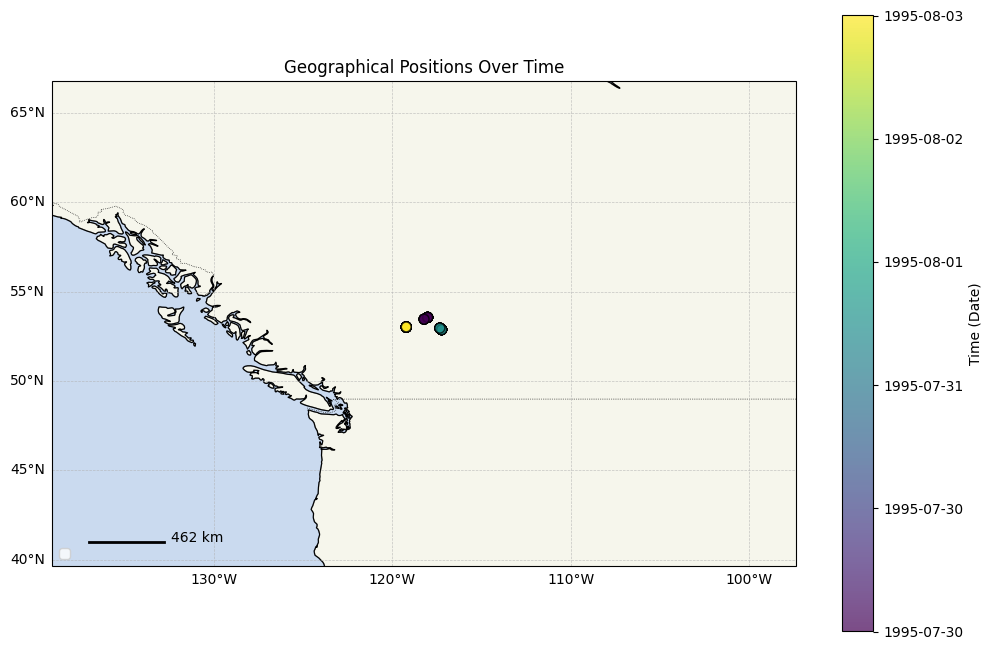

In [70]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


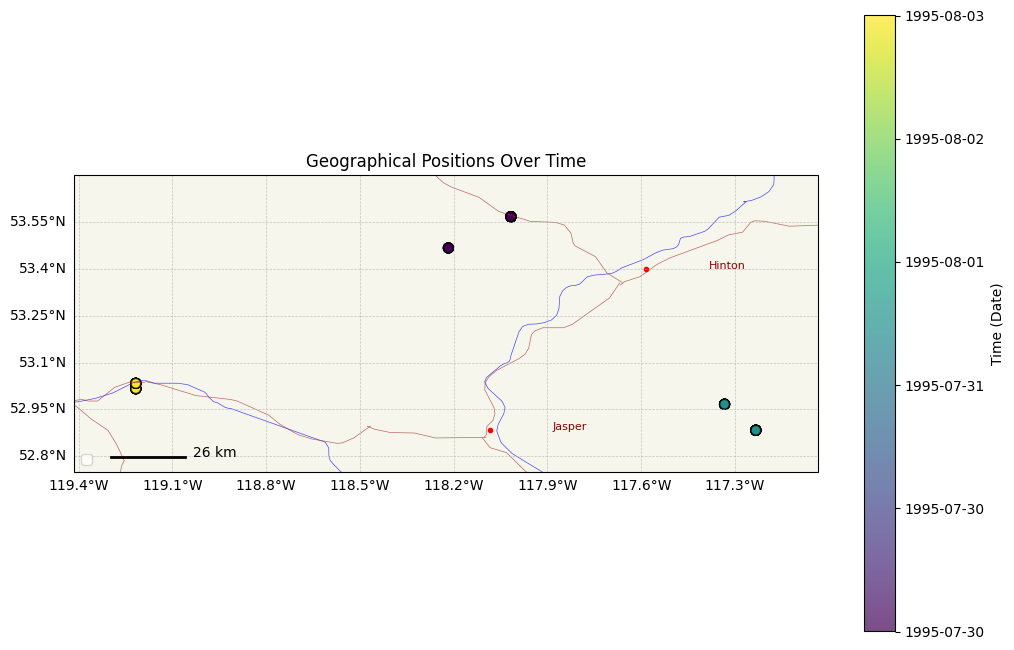

In [72]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom='auto', cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


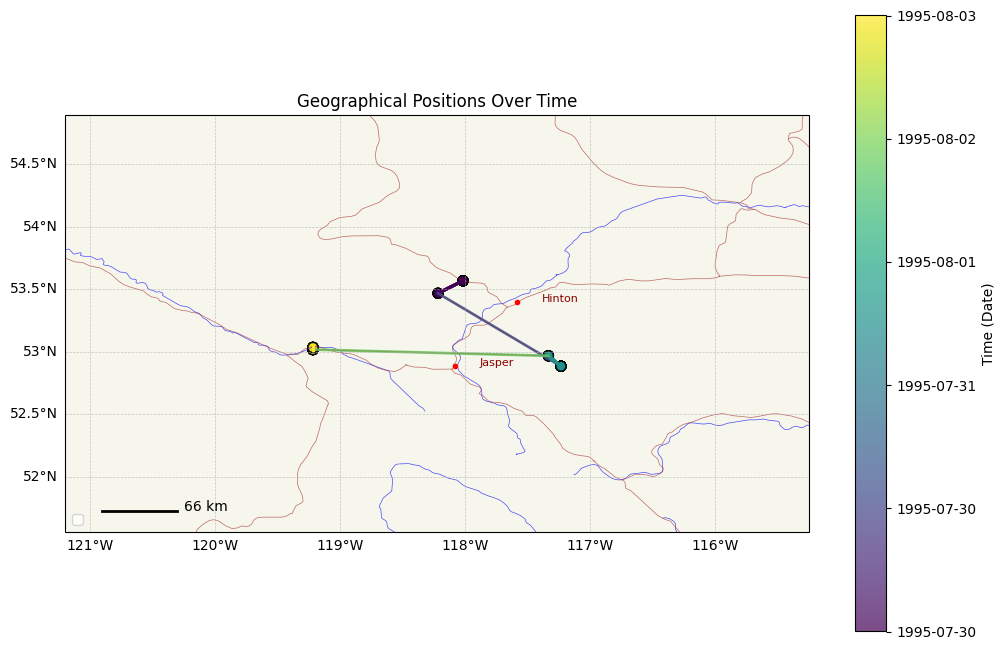

In [73]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

43 records, and it all looks like one cluster! - lets check it out as our first cluster

In [74]:
test_df.startdate.min()

Timestamp('1995-07-30 00:00:00')

### i.) Cluster 5: ('1998-10-20', '1998-11-08')

In [75]:
group0_df = test_df

In [76]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.7521367521367521)

In [77]:
group0_df.text1.value_counts()

text1
Calcareous alpine tundra. Assoc: Betula glandulosa, Carex concinna, Oxytropis podocarpa, Pedicularis spp., Polygonum vipiarum, Potentilla nivea, Salix vestita, Silene acaulis.                                3
On rocky soil; calcareous alpine tundra. Assoc: Betula glandulosa, Carex concinna, Oxytropis podocarpa, Pedicularis spp., Polygonum vipiarum, Potentilla nivea, Salix vestita, Silene acaulis.                 2
On rock, summit;  calcareous alpine tundra. Assoc: Betula glandulosa, Carex concinna, Oxytropis podocarpa, Pedicularis spp., Polygonum vipiarum, Potentilla nivea, Salix vestita, Silene acaulis.              2
With sporophytes.                                                                                                                                                                                              1
Growing on trunk of Thuja. Western Cedar (Thuja plicata) forest with Abies lasiocarpa, Menziesia ferruginea, Oplopanax horridus, Picea engelmanii, Tsuga heter

In [78]:
group0_df.localityname.value_counts()

localityname
Mount Robson Provincial Park area ca. 1 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.       22
Mount Robson Provincial Park area ca. 2 km south of Mt. Robson Information Center on the road to Mt. Robson Ranch.       21
Grande Cache Highway, 4 km north of Rock Lake turnoff on Hwy 40. Along seismic line (clearcut for gas exploration)       18
Cardinal River Divide, ca. 20 km south of Cadomin on Mountain Park Road (Hwy 40)                                         15
Cardinal River Divide, ca. 20 km south of Cadomin on Mountain Park Road (Hwy 40).  Alberta, Canada.                      11
Whitehorse Creek, about 4 km south of Cadomin on Mountain Park Road (Hwy 40)                                             11
Rock Lake area, ca. 3 km east of Rock Lake                                                                                7
Grande Cache Highway, 4 km north of Rock Lake turnoff on Hwy 40                                                        

In [79]:
df.loc[group0_df.index, 'cluster'] = '5'
df[df.cluster == '5'].__len__()

117

## e.) Collection Object ID: 296037

In [80]:
samp_collobjid_l[4]

296037

In [81]:
samp_record = df[df.collectionobjectid == samp_collobjid_l[4]]
samp_record

collectionobjectid                                      text1  \
34341              296037  Perennial herb 30-50 cm long. Sori brown.   

       countamt  collectingeventid  collectionobjectattachmentid  \
34341       6.0           148616.0                           NaN   

       attachmentid attachmentlocation  startdate enddate remarks  ...  \
34341           NaN                NaN 2005-05-13     NaT     NaN  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
34341           NaN                NaN  26.061945   98.619057   

                                            localityname  namedplace  \
34341  Vicinity of Ganhe, ca. 12 km N of Pianma on th...         NaN   

      geographyid cluster  startdate_num   enddate_num  
34341     33238.0     NaN   1.115942e+09 -9.223372e+09  

[1 rows x 22 columns]

In [82]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 26.0619449615     lon: 98.6190567017     start date: 2005-05-13T00:00:00.000000000


In [83]:
# Filter overall df to only records within 2º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 2].sort_values(by='startdate')

# Filter overall df to only records within 2º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 2].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [84]:
print(len(test_df))

test_df.head(2)

4432


collectionobjectid                                             text1  \
43104              371049  Herb 40-60 cm tall. Flowers yellow. Fruit green.   
4532                38119                   Shrub 3-4 m tall. Fruit orange.   

       countamt  collectingeventid  collectionobjectattachmentid  \
43104       5.0            60921.0                           NaN   
4532        8.0            61579.0                           NaN   

       attachmentid attachmentlocation  startdate enddate  \
43104           NaN                NaN 2004-11-13     NaT   
4532            NaN                NaN 2004-11-13     NaT   

                                                 remarks  ...  maxelevation  \
43104                              Pinus-Quercus forest.  ...           NaN   
4532   Dominants Tsuga and Picea mixed with broadleav...  ...           NaN   

       elevationaccuracy  latitude1  longitude1  \
43104                NaN  28.001888   98.626755   
4532                 NaN  27.781893   98.548576   

                                            localityname  namedplace  \
43104  W side of the Nujiang near the first turn if t...         NaN   
4532   E side of Gaoligong Shan at Km 34 on the road ...         NaN   

      geographyid cluster  startdate_num   enddate_num  
43104     33268.0     NaN   1.100304e+09 -9.223372e+09  
4532      33269.0     NaN   1.100304e+09 -9.223372e+09  

[2 rows x 22 columns]

In [85]:
test_df.startdate.value_counts()

startdate
2005-05-23    173
2005-08-17    166
2005-05-30    163
2005-08-13    158
2005-05-24    156
2005-08-09    146
2005-08-15    146
2005-08-08    142
2005-05-14    127
2005-05-25    126
2005-08-12    126
2005-08-05    126
2005-05-27    125
2005-08-16    123
2005-08-06    121
2005-06-02    118
2005-08-11    112
2005-05-12    111
2004-11-13    111
2005-05-16    110
2005-05-13    108
2005-05-17    106
2005-05-19    104
2005-08-10    104
2005-08-21     97
2005-05-28     96
2005-08-24     95
2005-08-07     89
2005-05-18     78
2004-11-14     77
2005-06-01     76
2005-08-22     75
2005-05-31     74
2005-05-15     73
2005-08-04     71
2005-05-26     70
2005-08-19     70
2005-08-03     69
2005-08-14     62
2005-08-18     43
2005-08-23     37
2005-05-11     36
2005-08-20     27
2005-08-02      7
2005-06-03      2
Name: count, dtype: int64

In [86]:
test_df.localityname.value_counts()

localityname
Yaduo Cun, above Shibali along the N side of S fork of Yamu He, E side of Gaoligong Shan.                                 104
E'ga Cun, on forest road at Km 30, E side of Gaoligong Shan.                                                               95
Yaping Cun, S of Yaping Yakou in the second cirque with two small lakes in the bottom, just below the border with          84
Ziguduo Cun, just S of Ziguduo village near the Nujiang, E side of Gaoligong Shan.                                         72
Vicinity of Xiaoheshan, along trail on S side of Highway S317 (new Hwy from Baoshan to Tengchong via Nankang Yakou) at     66
                                                                                                                         ... 
Ca. 9.2 km N of Pianma on the road to Gangfang, W side of Gaoligong Shan.                                                   1
Ca. 10.1 km N of Pianma on the road to Gangfang, W side of Gaoligong Shan.                               

Okay, now there's a fair amount of variability... 

In [87]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['2004-11-13 00:00:00', '2004-11-14 00:00:00', '2005-05-11 00:00:00',
 '2005-05-12 00:00:00', '2005-05-13 00:00:00', '2005-05-14 00:00:00',
 '2005-05-15 00:00:00', '2005-05-16 00:00:00', '2005-05-17 00:00:00',
 '2005-05-18 00:00:00', '2005-05-19 00:00:00', '2005-05-23 00:00:00',
 '2005-05-24 00:00:00', '2005-05-25 00:00:00', '2005-05-26 00:00:00',
 '2005-05-27 00:00:00', '2005-05-28 00:00:00', '2005-05-30 00:00:00',
 '2005-05-31 00:00:00', '2005-06-01 00:00:00', '2005-06-02 00:00:00',
 '2005-06-03 00:00:00', '2005-08-02 00:00:00', '2005-08-03 00:00:00',
 '2005-08-04 00:00:00', '2005-08-05 00:00:00', '2005-08-06 00:00:00',
 '2005-08-07 00:00:00', '2005-08-08 00:00:00', '2005-08-09 00:00:00',
 '2005-08-10 00:00:00', '2005-08-11 00:00:00', '2005-08-12 00:00:00',
 '2005-08-13 00:00:00', '2005-08-14 00:00:00', '2005-08-15 00:00:00',
 '2005-08-16 00:00:00', '2005-08-17 00:00:00', '2005-08-18 00:00:00',
 '2005-08-19 00:00:00', '2005-08-20 00:00:00', '2005-08-21 00:00:00',
 '20

In [88]:
cluster_date_l = [
    ('2005-05-11', '2005-05-19'),
    ('2005-08-03', '2005-08-23')
]

In [309]:
samp_record

collectionobjectid                                      text1  \
34341              296037  Perennial herb 30-50 cm long. Sori brown.   

       countamt  collectingeventid  collectionobjectattachmentid  \
34341       6.0           148616.0                           NaN   

       attachmentid attachmentlocation  startdate enddate remarks  ...  \
34341           NaN                NaN 2005-05-13     NaT     NaN  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
34341           NaN                NaN  26.061945   98.619057   

                                            localityname  namedplace  \
34341  Vicinity of Ganhe, ca. 12 km N of Pianma on th...         NaN   

      geographyid cluster  startdate_num   enddate_num  
34341     33238.0     NaN   1.115942e+09 -9.223372e+09  

[1 rows x 22 columns]

This looks like two separate clusters... One in May (which our sample record falls in) and one in August

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


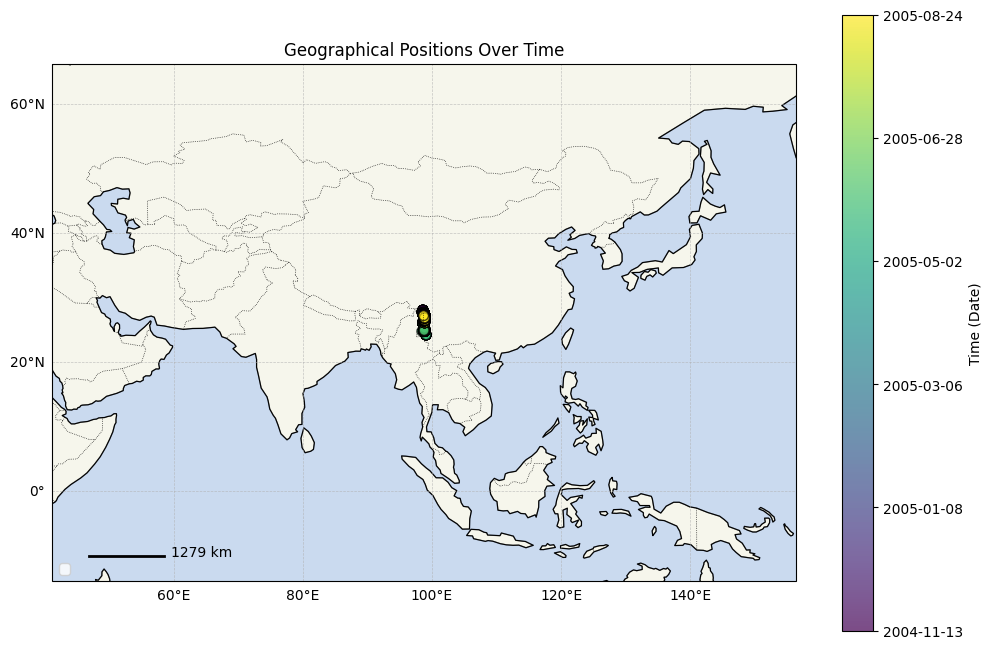

In [90]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


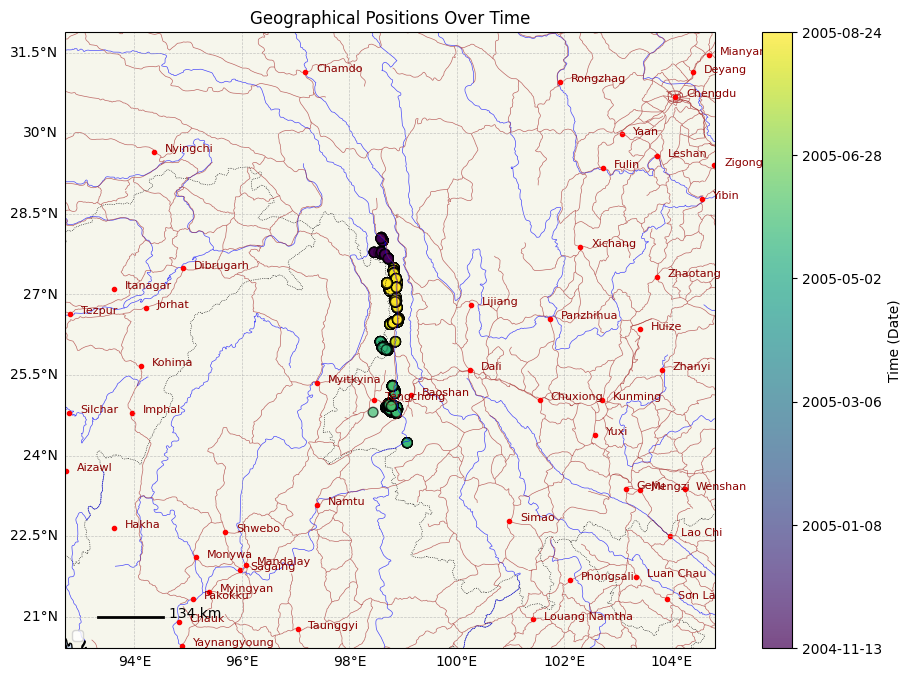

In [92]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

In [93]:
test_df.startdate.min()

Timestamp('2004-11-13 00:00:00')

In [94]:
cluster_date_l

[('2005-05-11', '2005-05-19'), ('2005-08-03', '2005-08-23')]

### i.) Cluster 6: ('2005-05-11', '2005-05-19')

In [314]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1  \
4615   25.978060   98.683914   
42580  25.981810   98.683914   
42249  25.978056   98.683889   
42441  25.976389   98.683889   
37587  25.981944   98.683889   
...          ...         ...   
5604   26.018056   98.644722   
27533  26.018056   98.644722   
36156  25.976669   98.704750   
41638  26.017225   98.621201   
21292  25.976532   98.718140   

                                                   text1  \
4615                       Herb, 20-30 cm. Flower green.   
42580       Perennial herb ca. 10 cm tall. Petals white.   
42249  Perennial herb, 30-50 cm.  Flower white.  Occa...   
42441  Shrub, 2-3 m. Flower white with purple at throat.   
37587  Shrub 20-30 cm tall. Flowers yellow. Fruit black.   
...                                                  ...   
5604   Perennial herb 40-60 cm tall. Sepals green, pe...   
27533   Perennial herb 60-80 cm tall. Young fruit green.   
36156   Tree ca. 6 m tall. Branchlets red. Female plant.   
41638                  Tree ca. 5 m tall. Flowers white.   
21292  Perennial herb ca. 20 to 40 cm tall. Young fru...   

                                                 remarks  \
4615           Thicket slight disturbed by road passing.   
42580  Bamboo thicket with Gautheria, Ribes, Rhododen...   
42249  SE facing 30-60° slope.  Thicket.  Disturbed b...   
42441  Secondary subtropical evergreen forest mixed w...   
37587  Bamboo thicket with Gautheria, Ribes, Rhododen...   
...                                                  ...   
5604   Secondary subtropical evergreen broadleaf fore...   
27533  Secondary subtropical evergreen broadleaf fore...   
36156  Deciduous broadleaf forest with Lithocarpus, C...   
41638  Secondary subtropical evergreen broadleaf fore...   
21292  Subtropical evergreen broadleaf forest, distur...   

                                            localityname  startdate    enddate  
4615   Vicinity of Pianma Yakou, the pass on the road... 2005-05-11        NaT  
42580  Vicinity of Feng Xue Yakou (Windy and Snowy Pa... 2005-05-11        NaT  
42249  Vicinity of Pianma Yakou, the pass on the road... 2005-05-11 2005-05-11  
42441                                        Yaojiaping. 2005-05-11 2005-05-11  
37587  Vicinity of Feng Xue Yakou (Windy and Snowy Pa... 2005-05-11 2005-05-11  
...                                                  ...        ...        ...  
5604   E of Pianma in the vicinity of km 81 on the ol... 2005-05-19 2005-05-19  
27533  E of Pianma in the vicinity of km 81 on the ol... 2005-05-19 2005-05-19  
36156  Vicinity of km 58 along road from Liuku to Pia... 2005-05-19        NaT  
41638  Xiao Pianma, Wanping village, NW of Pianma on ... 2005-05-19        NaT  
21292  Vicinity of Yaojiaping forest station between ... 2005-05-19        NaT  

[853 rows x 7 columns]

In [315]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.0)

In [316]:
group0_df.text1.value_counts()

text1
Perennial herb.                                            14
Clumped perennial herb.                                     9
Perennial herb. Sori brown.                                 6
Perennial herb, clumped.                                    5
Perennial herb 20-40 cm tall. Flowers white.                4
                                                           ..
Herb. Flowers pink-purple.                                  1
Shrub ca. 1 m tall. Flowers white.                          1
Arching shrub 1.5-2 m tall. Flowers white.                  1
Herbaceous vine. Flowers yellow.                            1
Perennial herb ca. 20 to 40 cm tall. Young fruit green.     1
Name: count, Length: 729, dtype: int64

In [317]:
group0_df.localityname.value_counts()

localityname
Area above Yaojiaping forest station, Sanjiang River, E side of Gaoligong Shan.                                          41
Vicinity of km 58 km on the road from Lushui to Pianma, W side of Gaoligong Shan.                                        37
Vicinity of Km 62 on the road from Lushui to Pianma, W side of Gaoligong Shan.                                           36
Upper slopes of Pianma River, ca. 10 km E of Pianma on the W side of Gaoligong Shan.                                     31
Just below the Fengxue Yakou (the pass between Lushui and Pianma), between km 54 and 58, E side of Gaoligong Shan.       30
                                                                                                                         ..
Vicinity of the second pass N of Pianma on the road to Gangfang, W side of Gaoligong Shan.                                1
Vicinity of Pianma primary school, W side of Gaoligong Shan.                                                           

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


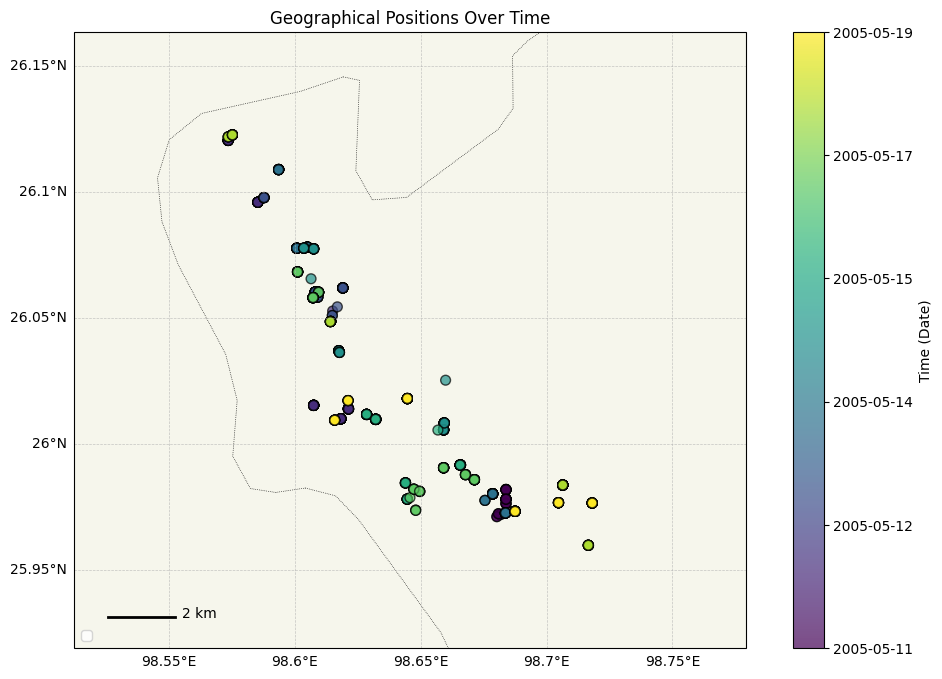

In [318]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


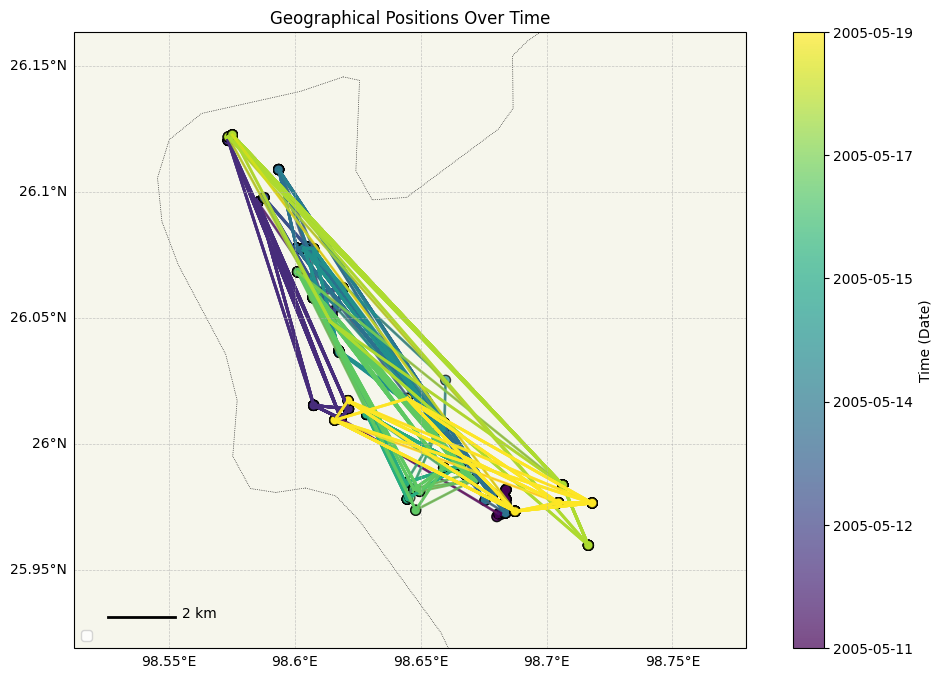

In [319]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Yikes this is all over the place. Maybe a couple teams collecting in different areas on the same day.

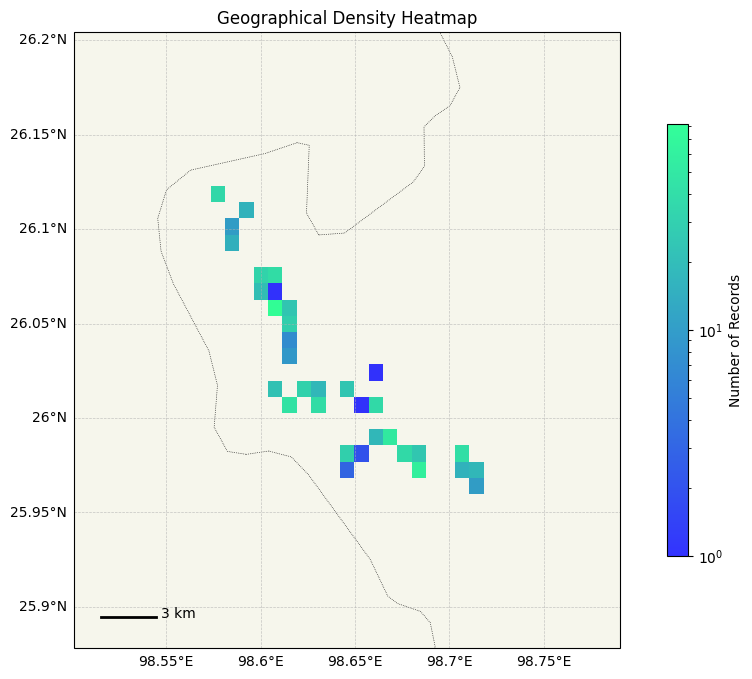

In [320]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


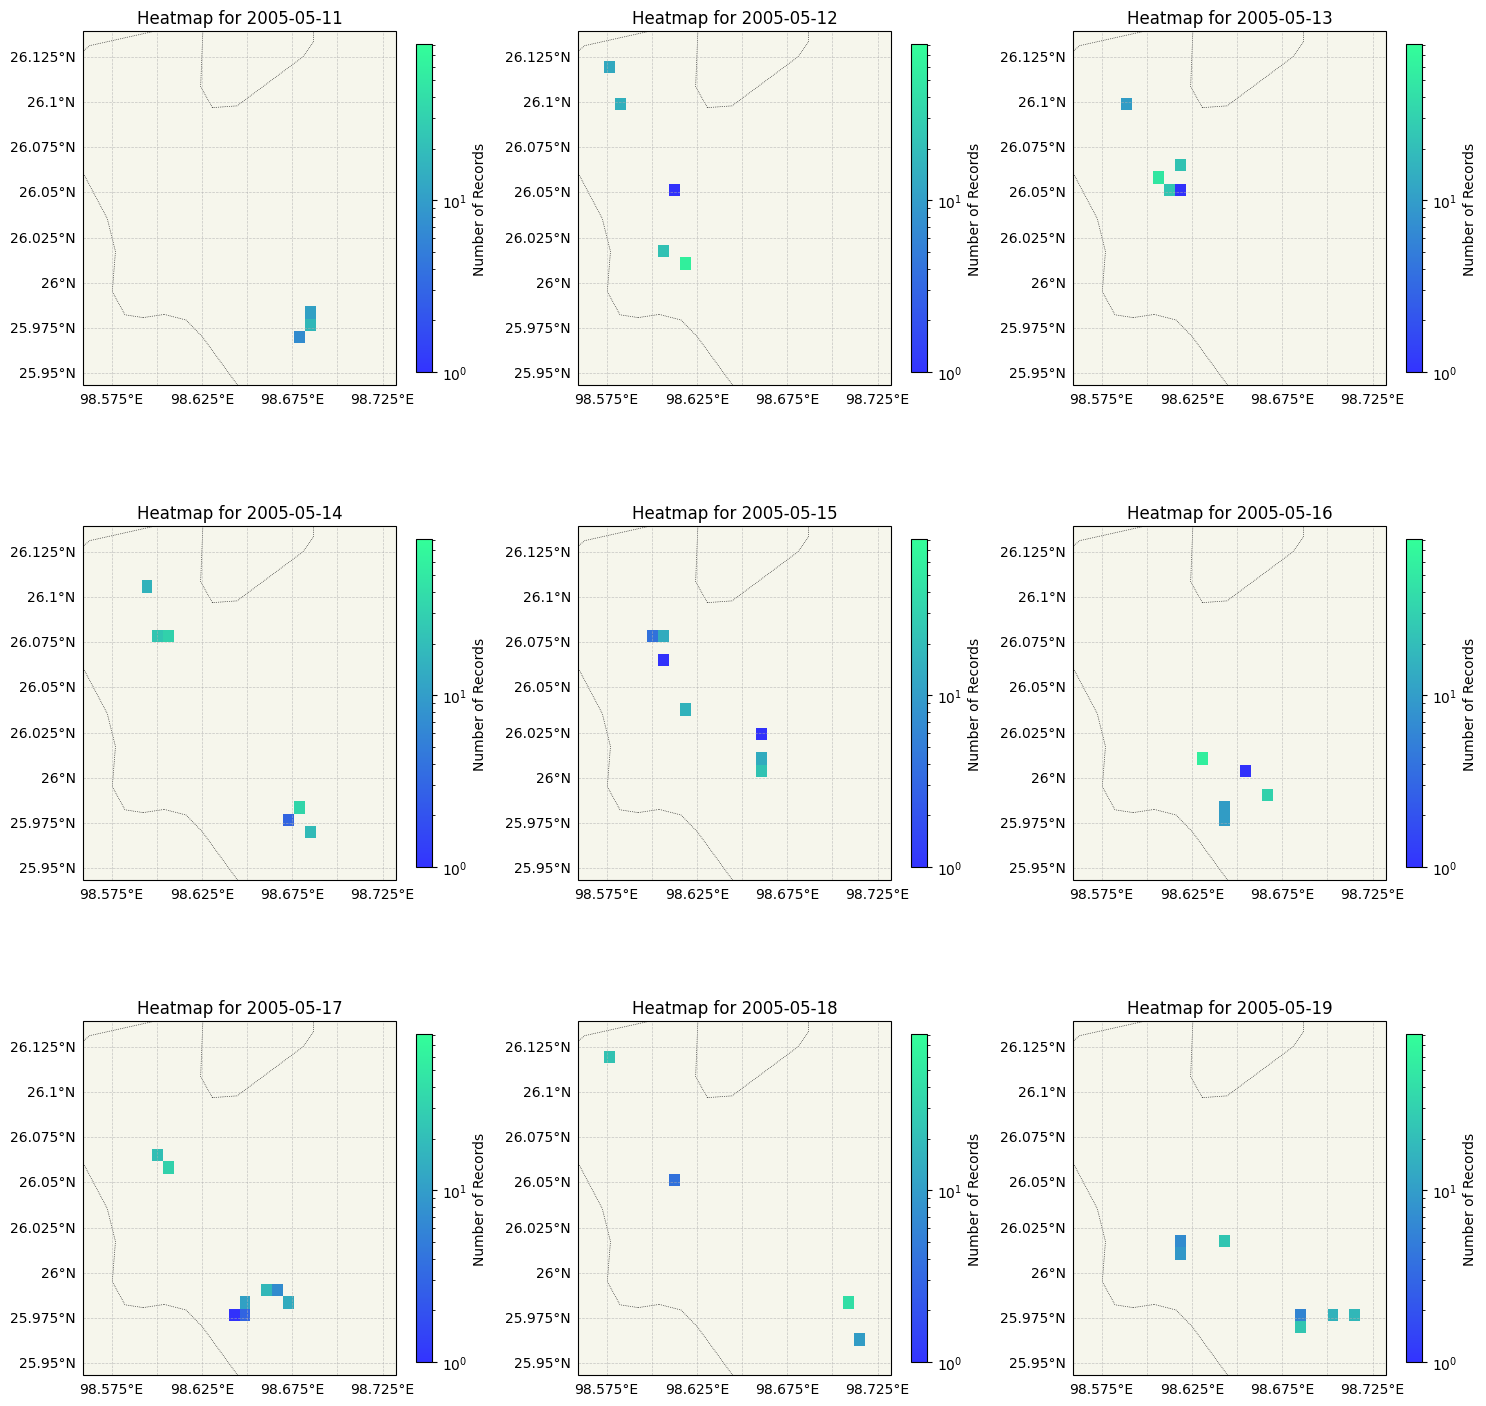

In [321]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [322]:
df.loc[group0_df.index, 'cluster'] = '6'
df[df.cluster == '6'].__len__()

853

In [323]:
cluster_date_l

[('2005-05-11', '2005-05-19'), ('2005-08-03', '2005-08-23')]

### i.) Cluster 7: ('2005-08-03', '2005-08-23')

In [324]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1  \
1957   26.489580   98.891136   
19847  26.489607   98.891411   
19839  26.119444   98.857778   
38493  26.489722   98.891389   
32155  26.489607   98.891411   
...          ...         ...   
18563  26.532778   98.895000   
33864  26.532726   98.894859   
26408  26.532778   98.895000   
8163   26.532778   98.895000   
7274   26.532726   98.894859   

                                                   text1  \
1957               Tree ca. 8 m tall. Flower buds green.   
19847  Shrub ca. 1.5 m tall. Synconia green, growing ...   
19839  Tree ca. 4 m tall. Young fruit green. Fruit on...   
38493               Shrub ca. 1.2 m tall. Flowers green.   
32155                                  Terrestrial fern.   
...                                                  ...   
18563  Perennial herb ca. 50 cm tall. Petals red. Ant...   
33864                                Shrub ca. 2 m tall.   
26408  Subshrub ca. 70 cm tall. Petals purple. Anther...   
8163          Scandent shrub. Fruit green turning black.   
7274   Shrub ca. 1.5 m tall. Fruit and persistent cap...   

                                                 remarks  \
1957                                                 NaN   
19847                                                NaN   
19839                                 Degraded thickets.   
38493                                                NaN   
32155                                                NaN   
...                                                  ...   
18563  Disturbed secondary forest dominated by Fagace...   
33864  Disturbed secondary forest dominated by Fagace...   
26408  Disturbed secondary forest dominated by Fagace...   
8163   Disturbed secondary forest dominated by Fagace...   
7274   Disturbed secondary forest dominated by Fagace...   

                                            localityname  startdate    enddate  
1957   E'ga Cun, in the vicinity of Wang Zhuo Hydroel... 2005-08-03        NaT  
19847  E'ga Cun, in the vicinity of Wang Zhuo Hydroel... 2005-08-03        NaT  
19839  Sipailaduo Cun, along a dirt road on the S sid... 2005-08-03 2005-08-03  
38493  E'ga Cun, in the vicinity of Wang Zhuo Hydroel... 2005-08-03 2005-08-03  
32155  E'ga Cun, in the vicinity of Wang Zhuo Hydroel... 2005-08-03        NaT  
...                                                  ...        ...        ...  
18563  Tuoping Cun, ca. 40 km S of Fugong on the W si... 2005-08-23 2005-08-23  
33864  Tuoping Cun, ca. 40 km S of Fugong on the W si... 2005-08-23        NaT  
26408  Tuoping Cun, ca. 40 km S of Fugong on the W si... 2005-08-23 2005-08-23  
8163   Tuoping Cun, ca. 40 km S of Fugong on the W si... 2005-08-23 2005-08-23  
7274   Tuoping Cun, ca. 40 km S of Fugong on the W si... 2005-08-23        NaT  

[433 rows x 7 columns]

In [325]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.0023094688221709007)

In [326]:
group0_df.text1.value_counts()

text1
Tree ca. 5 m tall. Fruit green.                              5
Terrestrial fern ca. 30 cm tall. Sori brown.                 4
Tree ca. 10 m tall. Fruit green.                             4
Shrub ca. 3 m tall. Fruit green.                             3
Perennial herb ca. 60 cm tall. Fruit green.                  3
                                                            ..
Shrub ca. 1.5 m tall. Sterile flowers white.                 1
Perennial herb ca. 80 cm tall. Flowers purple.               1
Tree ca. 12 m tall. Inflorescence green.                     1
Perennial herb ca. 80 cm tall. Flowers red.                  1
Shrub ca. 1.5 m tall. Fruit and persistent capsule green.    1
Name: count, Length: 377, dtype: int64

In [327]:
group0_df.localityname.value_counts()

localityname
E'ga Cun, on forest road at Km 30, E side of Gaoligong Shan.                                                          95
E'ga Cun, in the vicinity of Wang Zhuo Hydroelectric power plant, E side of Gaoligong Shan.                           58
E'ga Cun, vicinity of pass from China to Myanmar at border marker 27, E side of Gaoligong Shan.                       55
E'ga Cun, on forest road at Km 25, E side of Gaoligong Shan.                                                          44
Baodeng Cun, in the vicinity of Bifu bridge, just above the Nujiang, E side of Gaoligong Shan.                        38
Laomudeng Cun, in the vicinity of Zhiziluo Tea Plantation, on the road to Zhiziluo (former county seat of former      33
E'ga Cun, on forest road at Km 35, E side of Gaoligong Shan.                                                          28
Baodeng Cun, on forest road at Km 30, E side of Gaoligong Shan.                                                       13
Sipailaduo Cun, alo

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


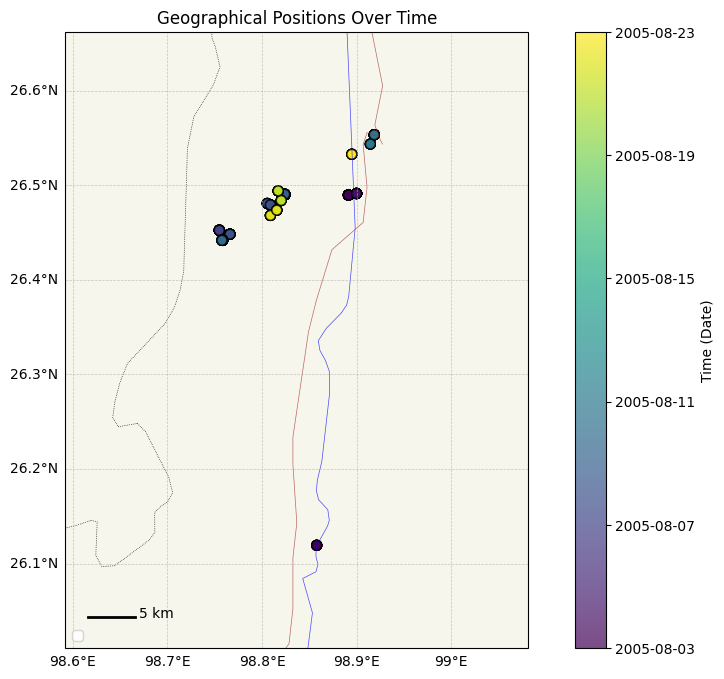

In [328]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


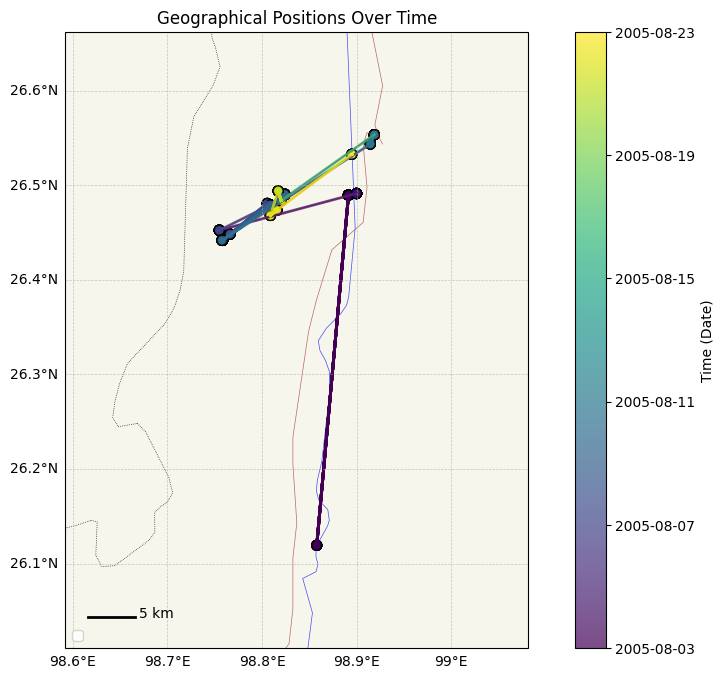

In [329]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=4, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Much more linear!

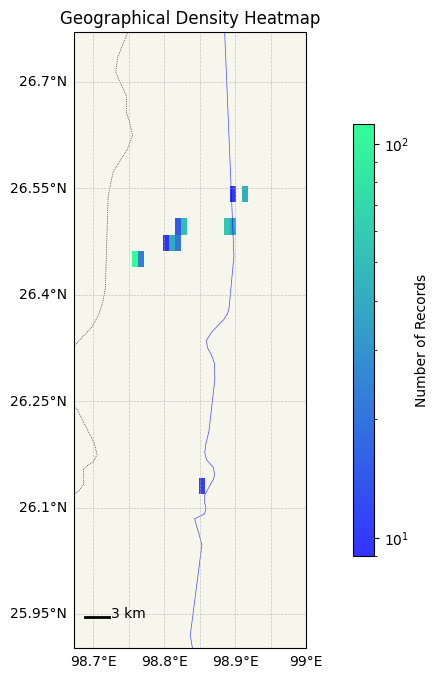

In [330]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


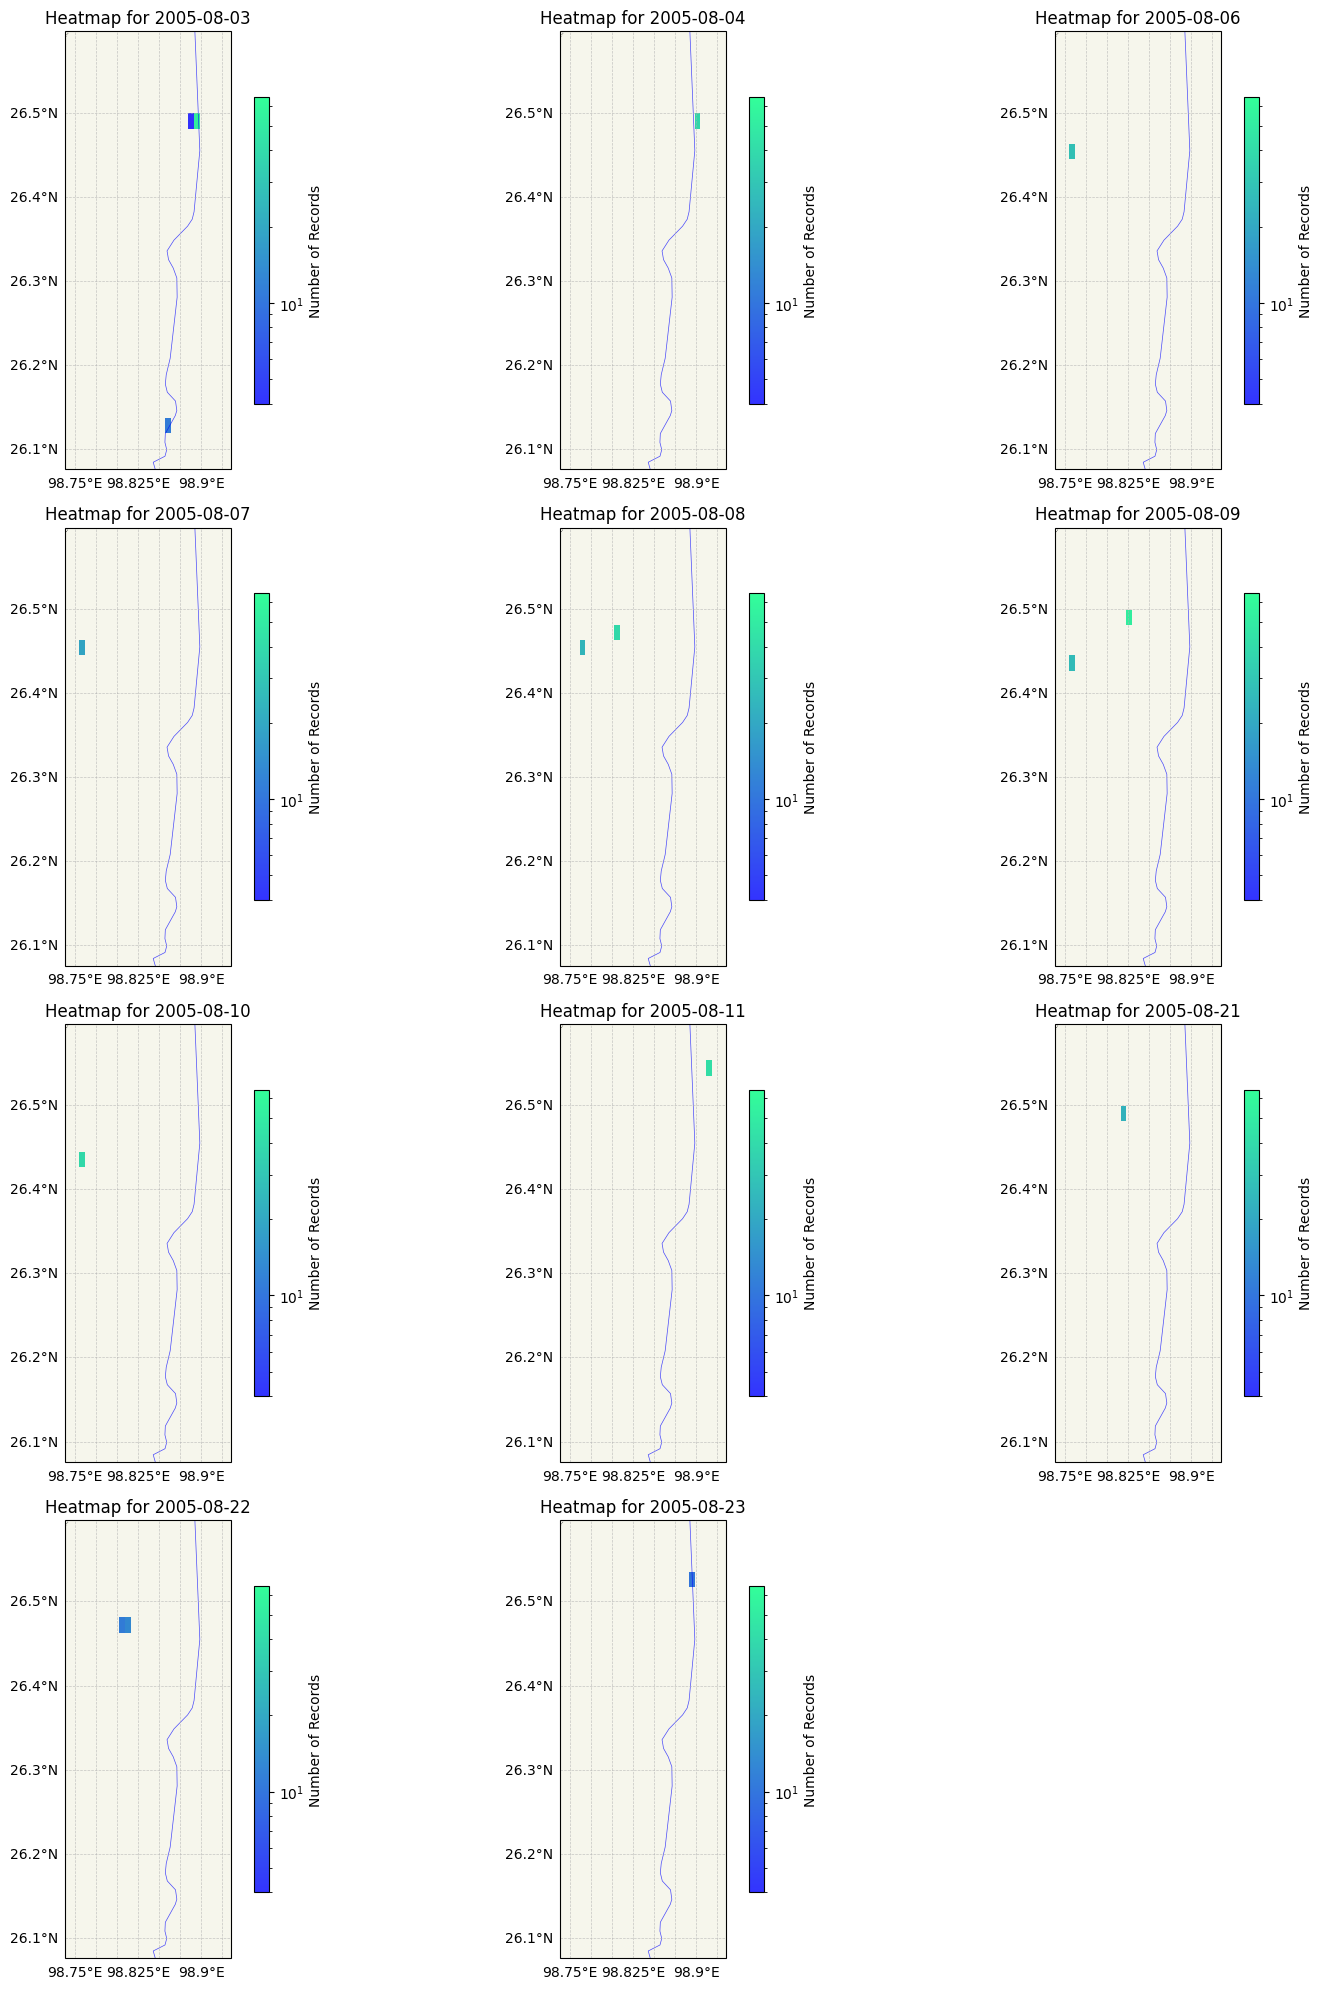

In [331]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [332]:
df.loc[group0_df.index, 'cluster'] = '7'
df[df.cluster == '7'].__len__()

433

## f.) Collection Object ID: 244207

In [95]:
samp_collobjid_l[6]

244207

In [96]:
samp_record = df[df.collectionobjectid == samp_collobjid_l[6]]
samp_record

collectionobjectid text1  countamt  collectingeventid  \
28390              244207   NaN       1.0           126488.0   

       collectionobjectattachmentid  attachmentid  \
28390                      425778.0      425882.0   

                             attachmentlocation  startdate    enddate remarks  \
28390  19b7c085-360e-43be-a206-4c63cbb1682f.jpg 1934-03-04 1934-03-04     NaN   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
28390  ...           NaN                NaN    39.3111   -123.7615   

                         localityname  namedplace geographyid cluster  \
28390  2 miles east of Mendocino City         NaN     16880.0     NaN   

       startdate_num   enddate_num  
28390  -1.130717e+09 -1.130717e+09  

[1 rows x 22 columns]

In [97]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: 39.3111     lon: -123.7615     start date: 1934-03-04T00:00:00.000000000


In [99]:
# Filter overall df to only records within 2º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 2].sort_values(by='startdate')

# Filter overall df to only records within 2º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 2].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [100]:
print(len(test_df))

test_df.head(2)

80


collectionobjectid              text1  countamt  collectingeventid  \
563                  4805                NaN       1.0            64895.0   
30400              261775  Subprostrate mats       1.0           125157.0   

       collectionobjectattachmentid  attachmentid  \
563                         96771.0       96772.0   
30400                           NaN           NaN   

                             attachmentlocation  startdate    enddate remarks  \
563    17b014f1-0c1f-4c19-ad78-a930c21fc3d8.jpg 1933-09-15 1933-09-15     NaN   
30400                                       NaN 1933-10-08 1933-10-08     NaN   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
563    ...           NaN                NaN  37.753200 -122.461900   
30400  ...           NaN                NaN  38.104892 -122.953634   

                       localityname  namedplace geographyid cluster  \
563    San Francisco. Laguna Honda.         NaN     22943.0     NaN   
30400           Pt. Reyes Peninsula         NaN     16464.0     NaN   

       startdate_num   enddate_num  
563    -1.145405e+09 -1.145405e+09  
30400  -1.143418e+09 -1.143418e+09  

[2 rows x 22 columns]

In [101]:
test_df.localityname.value_counts()

localityname
2 miles east of Mendocino City                                                                              5
Between Fort Ross and Stewart's Point                                                                       5
6 miles south of Point Arena                                                                                4
Lake Merced, San Francisco, type and only locality.                                                         4
French Camp Ridge                                                                                           4
Vicinity of Trinidad                                                                                        4
Patrick's Point                                                                                             2
2 miles east of Mendocino                                                                                   2
Back of Shelter Cove                                                                                       

Okay, now there's a fair amount of variability... 

In [102]:
test_df.startdate.value_counts()

startdate
1934-03-03    13
1934-03-04    10
1934-02-22     5
1934-03-11     4
1934-07-07     4
1934-06-30     4
1934-02-16     4
1934-07-09     3
1933-11-07     3
1934-05-28     3
1934-04-21     3
1934-04-11     2
1934-05-27     2
1934-09-03     2
1934-03-09     2
1934-01-29     2
1933-10-26     2
1933-10-22     2
1933-10-08     1
1934-03-25     1
1934-02-28     1
1934-02-01     1
1934-05-29     1
1934-06-09     1
1933-10-15     1
1934-07-21     1
1934-08-17     1
1933-09-15     1
Name: count, dtype: int64

It looks like there are a number of different clusters here.

In [103]:
test_df.startdate.unique()

<DatetimeArray>
['1933-09-15 00:00:00', '1933-10-08 00:00:00', '1933-10-15 00:00:00',
 '1933-10-22 00:00:00', '1933-10-26 00:00:00', '1933-11-07 00:00:00',
 '1934-01-29 00:00:00', '1934-02-01 00:00:00', '1934-02-16 00:00:00',
 '1934-02-22 00:00:00', '1934-02-28 00:00:00', '1934-03-03 00:00:00',
 '1934-03-04 00:00:00', '1934-03-09 00:00:00', '1934-03-11 00:00:00',
 '1934-03-25 00:00:00', '1934-04-11 00:00:00', '1934-04-21 00:00:00',
 '1934-05-27 00:00:00', '1934-05-28 00:00:00', '1934-05-29 00:00:00',
 '1934-06-09 00:00:00', '1934-06-30 00:00:00', '1934-07-07 00:00:00',
 '1934-07-09 00:00:00', '1934-07-21 00:00:00', '1934-08-17 00:00:00',
 '1934-09-03 00:00:00']
Length: 28, dtype: datetime64[ns]

In [388]:
cluster_date_l = [
    ('1933-11-07', '1933-11-07'),
    ('1934-03-03', '1934-03-04'),
    ('1934-06-09', '1934-06-09'),
    ('1934-06-30', '1934-06-30'),
    ('1934-09-03', '1934-09-03'),
]

In [389]:
samp_record

collectionobjectid text1  countamt  collectingeventid  \
28390              244207   NaN       1.0           126488.0   

       collectionobjectattachmentid  attachmentid  \
28390                      425778.0      425882.0   

                             attachmentlocation  startdate    enddate remarks  \
28390  19b7c085-360e-43be-a206-4c63cbb1682f.jpg 1934-03-04 1934-03-04     NaN   

       ...  maxelevation  elevationaccuracy  latitude1  longitude1  \
28390  ...           NaN                NaN    39.3111   -123.7615   

                         localityname  namedplace geographyid cluster  \
28390  2 miles east of Mendocino City         NaN     16880.0     NaN   

       startdate_num   enddate_num  
28390  -1.130717e+09 -1.130717e+09  

[1 rows x 22 columns]

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


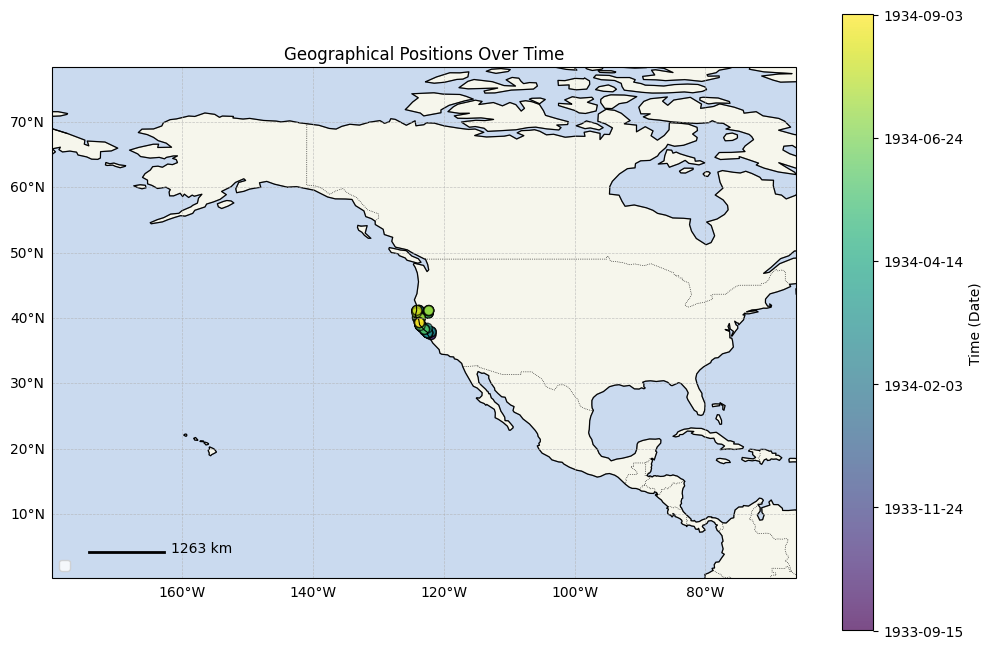

In [104]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.1, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


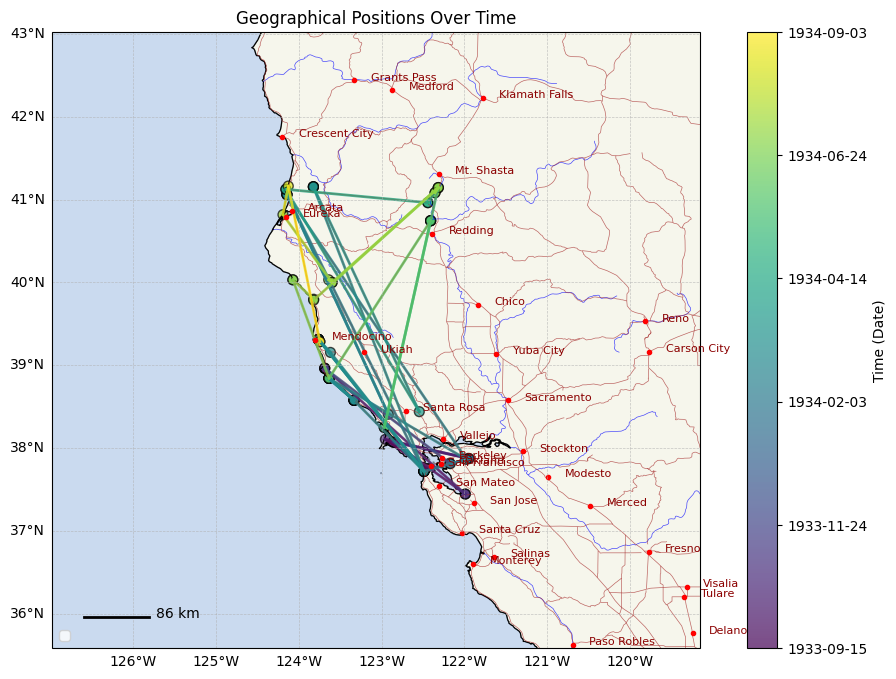

In [105]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [392]:
test_df.startdate.min()

Timestamp('1933-11-07 00:00:00')

In [393]:
cluster_date_l

[('1933-11-07', '1933-11-07'),
 ('1934-03-03', '1934-03-04'),
 ('1934-06-09', '1934-06-09'),
 ('1934-06-30', '1934-06-30'),
 ('1934-09-03', '1934-09-03')]

### i.) Cluster 8: ('1933-11-07', '1934-03-04')

In [394]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[0][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[0][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1  \
33594  38.963142 -123.685661   
42983  38.962300 -123.686700   
1602   38.963142 -123.685661   

                                                   text1  \
33594  Trees 20-50 ft. high; foliage a vivid green wi...   
42983                                                NaN   
1602   Trees 20-50 ft. high; foliage a vivid green wi...   

                      remarks              localityname  startdate    enddate  
33594                     NaN  5 mi. N. of Point Arena. 1933-11-07 1933-11-07  
42983  In open grassy fields.  5 mi. n. of Point Arena. 1933-11-07 1933-11-07  
1602                      NaN   5 mi. N. of Point Arena 1933-11-07 1933-11-07

In [395]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.3333333333333333)

In [396]:
group0_df.text1.value_counts()

text1
Trees 20-50 ft. high; foliage a vivid green with yellowish tinge different from muricata; cones persistent on old branches, in a whorl or opposite pair at nodes.    2
Name: count, dtype: int64

In [397]:
group0_df.localityname.value_counts()

localityname
5 mi. N. of Point Arena.    1
5 mi. n. of Point Arena.    1
5 mi. N. of Point Arena     1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


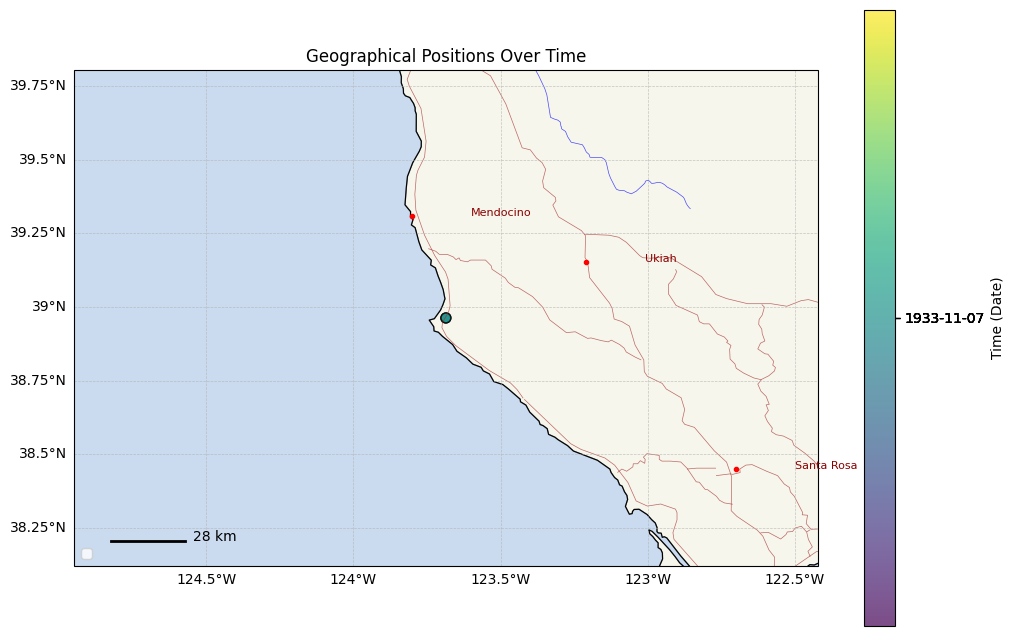

In [407]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=.001, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


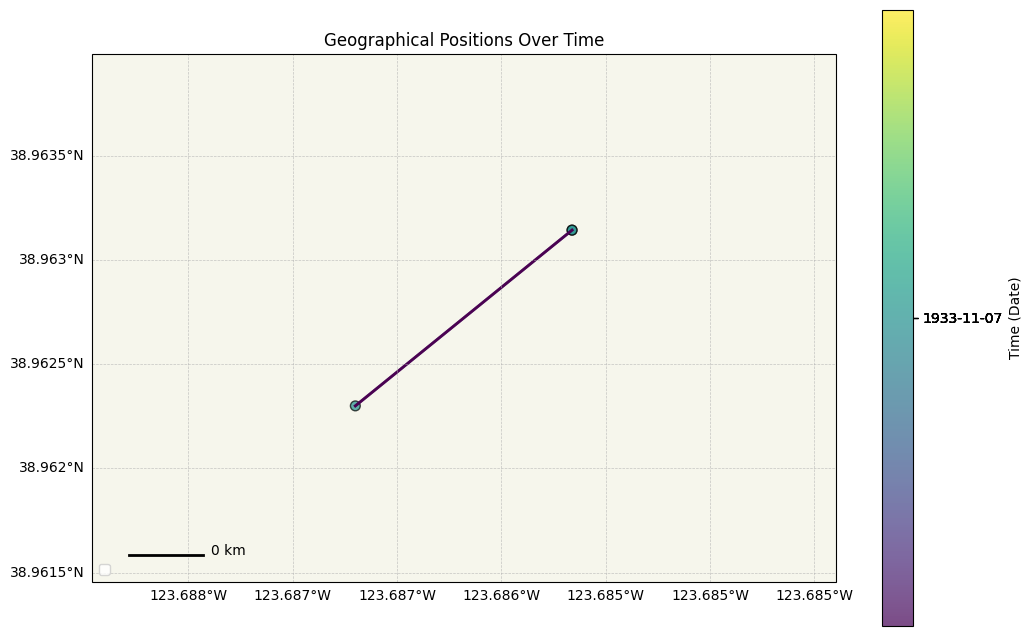

In [408]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

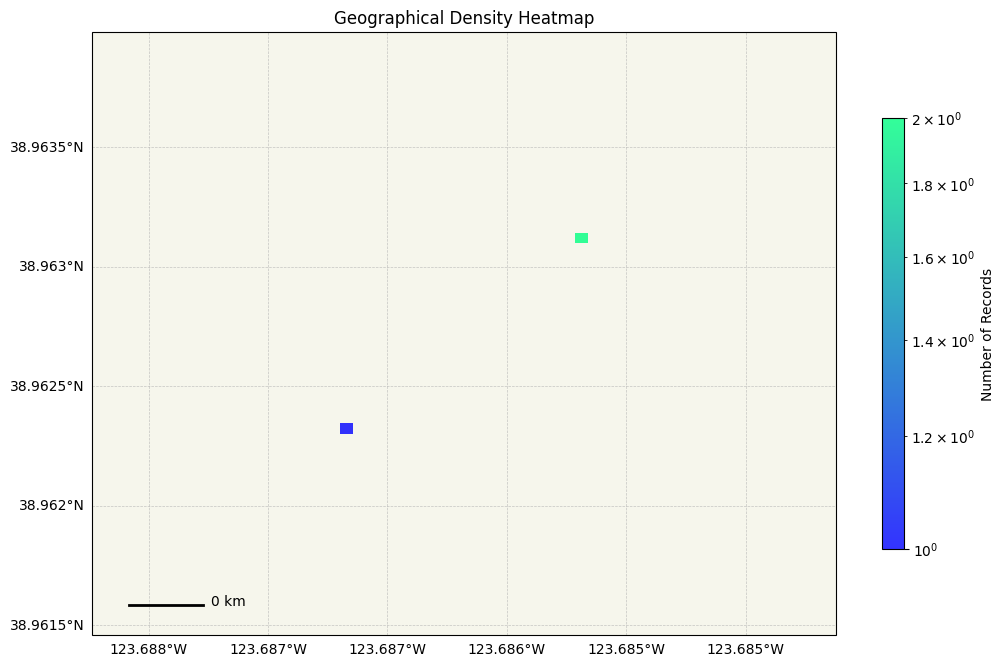

In [414]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)


Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [415]:
df.loc[group0_df.index, 'cluster'] = '8'
df[df.cluster == '8'].__len__()

3

In [416]:
cluster_date_l

[('1933-11-07', '1933-11-07'),
 ('1934-03-03', '1934-03-04'),
 ('1934-06-09', '1934-06-09'),
 ('1934-06-30', '1934-06-30'),
 ('1934-09-03', '1934-09-03')]

### ii.) Cluster 9: ('1934-03-03', '1934-03-04')

In [417]:
group0_df = test_df[(pd.to_datetime(cluster_date_l[1][0]) <= test_df['startdate']) & (test_df['startdate'] <= pd.to_datetime(cluster_date_l[1][1]))][['latitude1', 'longitude1', 'text1', 'remarks', 'localityname', 'startdate', 'enddate']]

group0_df

latitude1  longitude1 text1      remarks  \
26302    38.8421   -123.6345   NaN          NaN   
24530    38.8421   -123.6345   NaN          NaN   
30155    38.8421   -123.6345   NaN          NaN   
24449    38.8421   -123.6345   NaN          NaN   
5467     38.8421   -123.6345   NaN          NaN   
1699     38.8421   -123.6345   NaN          NaN   
15894    38.8421   -123.6345   NaN          NaN   
42315    39.3111   -123.7615   NaN          NaN   
18521    39.3111   -123.7615   NaN          NaN   
16381    39.1546   -123.6164   NaN  Along river   
28390    39.3111   -123.7615   NaN          NaN   
3710     39.3111   -123.7615   NaN          NaN   
22671    39.3111   -123.7615   NaN          NaN   
7797     39.3111   -123.7615   NaN          NaN   
26632    39.3111   -123.7615   NaN          NaN   

                                       localityname  startdate    enddate  
26302                  6 miles south of Point Arena 1934-03-03 1934-03-03  
24530                      6 mi. s. of Point Arena. 1934-03-03 1934-03-03  
30155                      6 mi. s. of Point Arena. 1934-03-03 1934-03-03  
24449                  6 miles south of Point Arena 1934-03-03 1934-03-03  
5467                   6 miles south of Point Arena 1934-03-03 1934-03-03  
1699                        6 mi. s of Point Arena. 1934-03-03 1934-03-03  
15894                  6 miles south of Point Arena 1934-03-03 1934-03-03  
42315                2 miles east of Mendocino City 1934-03-04 1934-03-04  
18521                     2 miles east of Mendocino 1934-03-04 1934-03-04  
16381  Along Navarro River 5 miles west of Navarro. 1934-03-04 1934-03-04  
28390                2 miles east of Mendocino City 1934-03-04 1934-03-04  
3710                 2 miles east of Mendocino City 1934-03-04 1934-03-04  
22671                2 miles east of Mendocino City 1934-03-04 1934-03-04  
7797                      2 miles east of Mendocino 1934-03-04 1934-03-04  
26632                2 miles east of Mendocino City 1934-03-04 1934-03-04

In [418]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(1.0)

In [419]:
group0_df.text1.value_counts()

Series([], Name: count, dtype: int64)

In [420]:
group0_df.localityname.value_counts()

localityname
2 miles east of Mendocino City                  5
6 miles south of Point Arena                    4
6 mi. s. of Point Arena.                        2
2 miles east of Mendocino                       2
6 mi. s of Point Arena.                         1
Along Navarro River 5 miles west of Navarro.    1
Name: count, dtype: int64

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


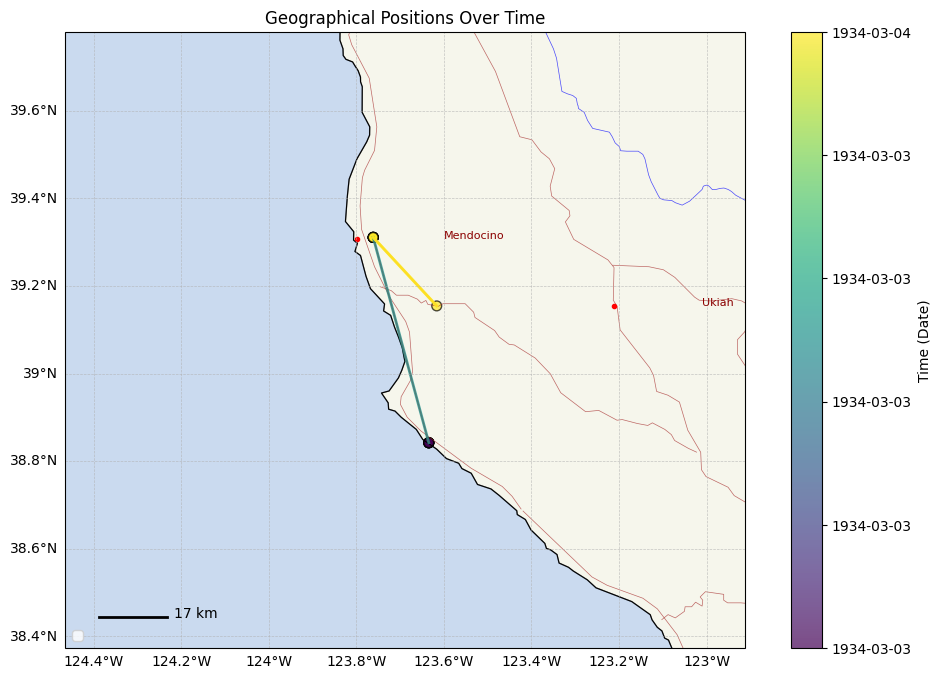

In [426]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

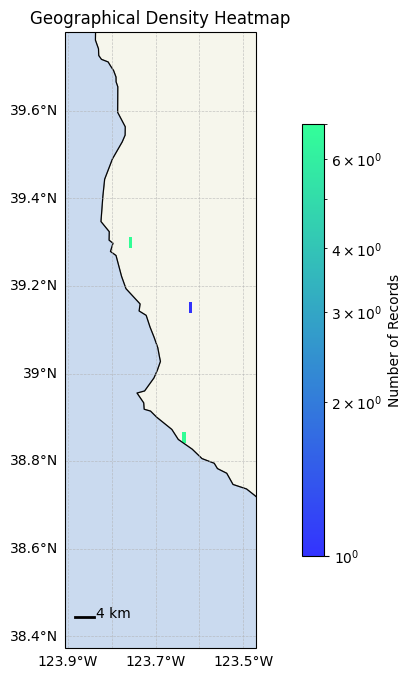

In [427]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=1,  plot_rivers=True, plot_roads=True)


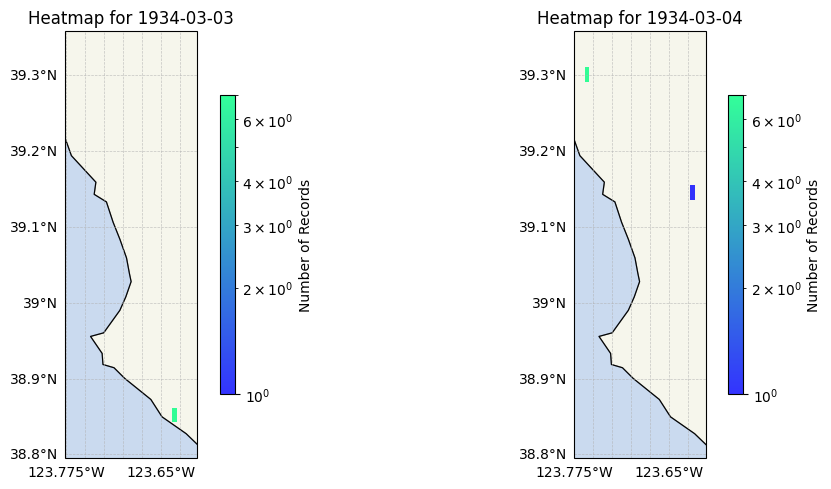

In [429]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

Looks like it varies by the day, but there are often 2 separate miniclusters... probably two different teams.

That being said, it all looks like a single cluster to me!

In [430]:
df.loc[group0_df.index, 'cluster'] = '9'
df[df.cluster == '9'].__len__()

15

## f.) Collection Object ID: 245295

Grabbing a random madagascar one!

In [490]:
collectionobjectid = 367908

In [491]:
samp_collobjid_l[8]

33872

In [492]:
samp_record = df[df.collectionobjectid == collectionobjectid]
samp_record

collectionobjectid                                      text1  \
42759              367908  Terrestrial herb 0.5 m, flowers lavander.   

       countamt  collectingeventid  collectionobjectattachmentid  \
42759       2.0            78191.0                           NaN   

       attachmentid attachmentlocation  startdate enddate remarks  ...  \
42759           NaN                NaN 1998-11-18     NaT     NaN  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
42759        1250.0                NaN  -21.23333   47.383339   

                                            localityname  namedplace  \
42759  Fianarantsoa, Ranomafana National Park, Ampasi...         NaN   

      geographyid cluster  startdate_num   enddate_num  
42759     27773.0     NaN    911347200.0 -9.223372e+09  

[1 rows x 22 columns]

In [493]:
samp_record_lat = samp_record.latitude1.values[0]
samp_record_lon = samp_record.longitude1.values[0]
samp_record_startdate = samp_record.startdate.values[0]
print('lat:', samp_record_lat, '    lon:', samp_record_lon, '    start date:', samp_record_startdate)

lat: -21.2333297729     lon: 47.3833389282     start date: 1998-11-18T00:00:00.000000000


In [494]:
# Filter overall df to only records within 0.5º lat of the sample lat
test_df = df[abs(df.latitude1 - samp_record_lat) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 0.5º lon of the sample lon
test_df = test_df[abs(test_df.longitude1 - samp_record_lon) < 0.5].sort_values(by='startdate')

# Filter overall df to only records within 6 months of the sample startdate
test_df = test_df[test_df['startdate'].between(samp_record_startdate - pd.DateOffset(months=6), samp_record_startdate + pd.DateOffset(months=6))]


In [495]:
print(len(test_df))

test_df.head(2)

755


collectionobjectid                                              text1  \
37698              324518  Small tree 3 m tall. Fruits at first white the...   
33742              290957  Sprawling shrub to 3 m tall growing up through...   

       countamt  collectingeventid  collectionobjectattachmentid  \
37698       5.0            69057.0                      197686.0   
33742       4.0           152779.0                      199515.0   

       attachmentid                        attachmentlocation  startdate  \
37698      197778.0  488db5fc-19a3-4984-832e-679575a25629.jpg 1998-10-30   
33742      199618.0  1a3407e3-34e8-4634-a441-5e144f17b46e.jpg 1998-10-30   

      enddate remarks  ...  maxelevation  elevationaccuracy  latitude1  \
37698     NaT     NaN  ...           0.0                NaN     -21.26   
33742     NaT     NaN  ...           0.0                NaN     -21.26   

       longitude1                                       localityname  \
37698   47.420002  Fianarantsoa Province: Ranomafana National Par...   
33742   47.420002  Fianarantsoa Province: Ranomafana National Par...   

                                              namedplace geographyid cluster  \
37698  Fianarantsoa Province: Ranomafana National Par...     27773.0     NaN   
33742  Fianarantsoa Province: Ranomafana National Par...     27773.0     NaN   

       startdate_num   enddate_num  
37698    909705600.0 -9.223372e+09  
33742    909705600.0 -9.223372e+09  

[2 rows x 22 columns]

In [496]:
test_df.localityname.value_counts()

localityname
Fianarantsoa, Ranomafana National Park, Ampasina Swamp.                                                                     34
Ranomafana National Park, Talatakely trail system S of Namorona River (vicinity of river near research station).            30
Ranomafana National Park, Talatakely trail system S of Namorona River (trail route B-T- Amanda).                            28
Fianarantsoa, Ranomafana National Park, Talatakely Trail System.                                                            22
Fianarantsoa, Ranomafana National Park, trail to Vatoharanana.                                                              20
                                                                                                                            ..
Fianarantsoa Province. Ramanofana National Park. Along L trail near junction with "Amanda" trail.  Talatakely parcel.        1
Fianarantsoa, Ranomafana National Park, Talatakely trail system, (X trail, meter 100).            

Okay, now there's a fair amount of variability... 

In [497]:
test_df.startdate.value_counts()

startdate
1998-11-04    77
1998-11-18    68
1998-11-03    54
1998-11-09    51
1998-11-01    49
1998-11-05    48
1998-11-12    46
1998-11-02    39
1998-11-11    38
1998-10-31    37
1998-11-06    34
1998-11-13    33
1998-11-10    32
1998-11-14    31
1998-11-15    27
1998-10-30    27
1998-11-16    23
1998-11-08    19
1998-11-17    13
1998-11-07     4
1998-11-19     4
1998-11-21     1
Name: count, dtype: int64

It looks like there is a single cluster

In [501]:
test_df.startdate.sort_values().unique()

<DatetimeArray>
['1998-10-30 00:00:00', '1998-10-31 00:00:00', '1998-11-01 00:00:00',
 '1998-11-02 00:00:00', '1998-11-03 00:00:00', '1998-11-04 00:00:00',
 '1998-11-05 00:00:00', '1998-11-06 00:00:00', '1998-11-07 00:00:00',
 '1998-11-08 00:00:00', '1998-11-09 00:00:00', '1998-11-10 00:00:00',
 '1998-11-11 00:00:00', '1998-11-12 00:00:00', '1998-11-13 00:00:00',
 '1998-11-14 00:00:00', '1998-11-15 00:00:00', '1998-11-16 00:00:00',
 '1998-11-17 00:00:00', '1998-11-18 00:00:00', '1998-11-19 00:00:00',
 '1998-11-21 00:00:00']
Length: 22, dtype: datetime64[ns]

In [484]:
samp_record

collectionobjectid                                      text1  \
42759              367908  Terrestrial herb 0.5 m, flowers lavander.   

       countamt  collectingeventid  collectionobjectattachmentid  \
42759       2.0            78191.0                           NaN   

       attachmentid attachmentlocation  startdate enddate remarks  ...  \
42759           NaN                NaN 1998-11-18     NaT     NaN  ...   

       maxelevation  elevationaccuracy  latitude1  longitude1  \
42759        1250.0                NaN  -21.23333   47.383339   

                                            localityname  namedplace  \
42759  Fianarantsoa, Ranomafana National Park, Ampasi...         NaN   

      geographyid cluster  startdate_num   enddate_num  
42759     27773.0     NaN    911347200.0 -9.223372e+09  

[1 rows x 22 columns]

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


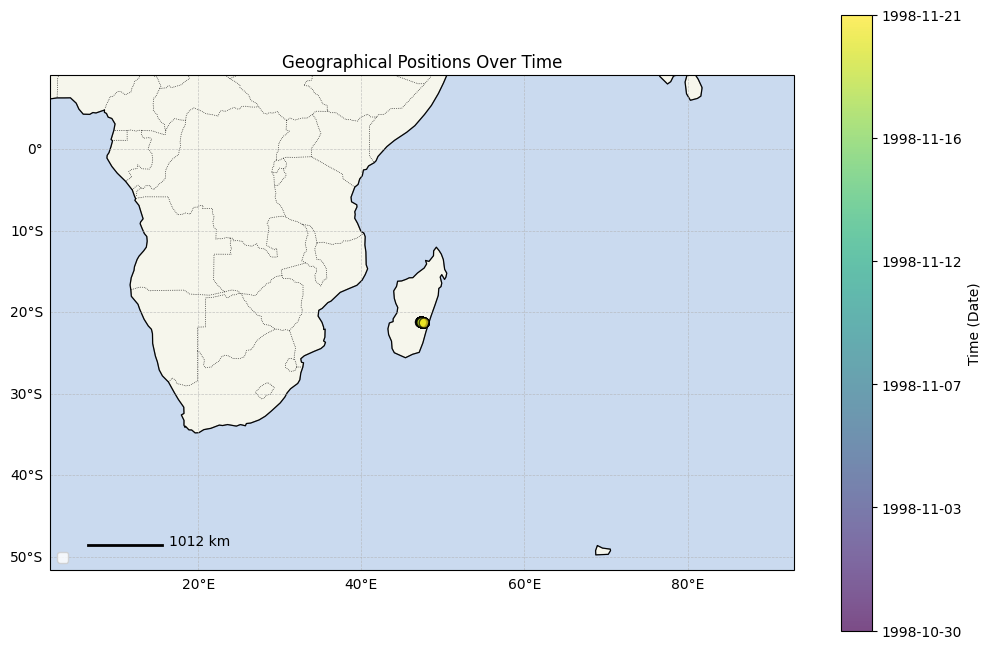

In [502]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=0.01, cluster_line=False)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


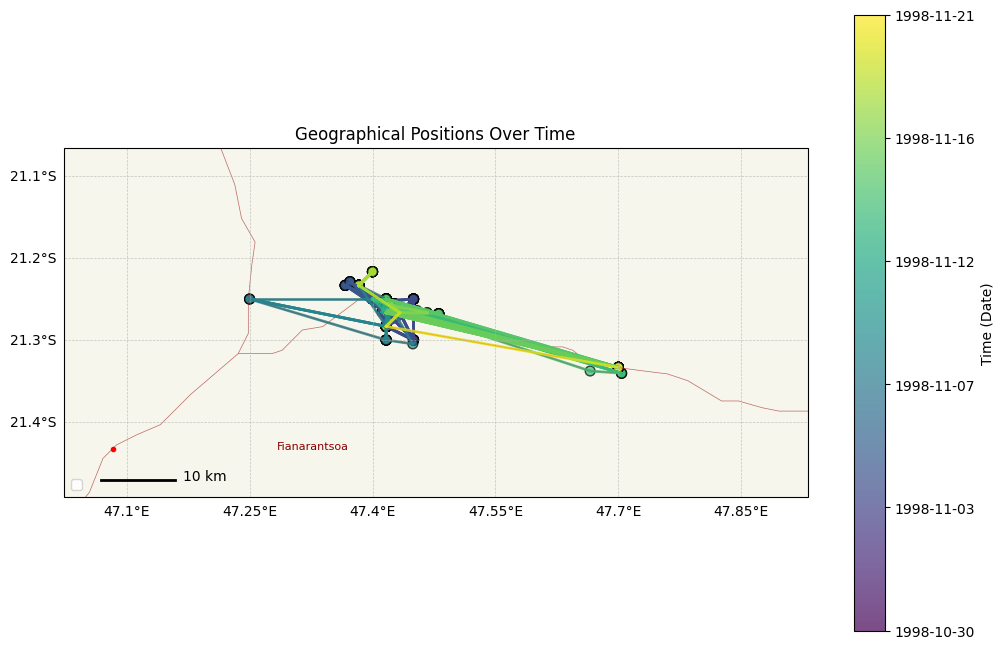

In [503]:
plot_geographical_positions(test_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=2, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

In [506]:
print(test_df.startdate.min())
print(test_df.startdate.max())

1998-10-30 00:00:00
1998-11-21 00:00:00


### i.) Cluster 10: ('1998-10-30', '1998-11-21')

In [523]:
group0_df = test_df

group0_df

collectionobjectid                                              text1  \
37698              324518  Small tree 3 m tall. Fruits at first white the...   
33742              290957  Sprawling shrub to 3 m tall growing up through...   
5201                44045      Herb 3-4 dm tall. Only in fruiting condition.   
23627              203206  Tree 5 m tall. Petals and stamens yellow-white...   
21102              181592  Epiphytic shrub to 1 m tall. Petals reflexed a...   
...                   ...                                                ...   
33048              284914           Tree to 4.5 m; corolla pink; infrequent.   
40780              351096  Female. Stems solitary, 40 cm DBH* leaf rachis...   
4597                38680             Tree to 4.5 m; fruits red; infrequent.   
39832              342692  Tree 3 m, flowers greenish-yellow, inflorescen...   
2609                21675       Tree 4 m, fruits green, extremely glutinous.   

       countamt  collectingeventid  collectionobjectattachmentid  \
37698       5.0            69057.0                      197686.0   
33742       4.0           152779.0                      199515.0   
5201        4.0           108057.0                      196936.0   
23627       7.0           115329.0                      195554.0   
21102       1.0           133885.0                           NaN   
...         ...                ...                           ...   
33048       5.0           164954.0                      198231.0   
40780      10.0            45202.0                           NaN   
4597        3.0           144402.0                      197567.0   
39832       5.0           135994.0                           NaN   
2609       10.0           157069.0                           NaN   

       attachmentid                        attachmentlocation  startdate  \
37698      197778.0  488db5fc-19a3-4984-832e-679575a25629.jpg 1998-10-30   
33742      199618.0  1a3407e3-34e8-4634-a441-5e144f17b46e.jpg 1998-10-30   
5201       197025.0  af41fe31-b84b-4dc3-8be6-acc4ac96c9b4.jpg 1998-10-30   
23627      195639.0  6b3deebd-1eb6-4fc3-8b60-1490bf351984.jpg 1998-10-30   
21102           NaN                                       NaN 1998-10-30   
...             ...                                       ...        ...   
33048      198326.0  7bd1379c-307b-447d-b011-cd3fedff7bad.jpg 1998-11-19   
40780           NaN                                       NaN 1998-11-19   
4597       197659.0  812b4da6-52a5-4c22-83ee-0d0076be859e.jpg 1998-11-19   
39832           NaN                                       NaN 1998-11-19   
2609            NaN                                       NaN 1998-11-21   

         enddate                              remarks  ...  elevationaccuracy  \
37698        NaT                                  NaN  ...                NaN   
33742        NaT                                  NaN  ...                NaN   
5201  1998-10-30                                  NaN  ...                0.0   
23627 1998-10-30                                  NaN  ...                0.0   
21102 1998-10-30                                  NaN  ...                0.0   
...          ...                                  ...  ...                ...   
33048        NaT               Montane rain forest.    ...                NaN   
40780        NaT                                  NaN  ...                NaN   
4597         NaT               Montane rain forest.    ...                NaN   
39832        NaT                                  NaN  ...                NaN   
2609         NaT  Disturbed remnant forest patches.    ...                NaN   

       latitude1  longitude1  \
37698 -21.260000   47.420002   
33742 -21.260000   47.420002   
5201  -21.260000   47.420000   
23627 -21.260000   47.420000   
21102 -21.260000   47.420000   
...          ...         ...   
33048 -21.266670   47.433331   
40780 -21.283331   47.416672   
4597  -21.266670   47.433331   
39832 -21.283331   47.4

In [524]:
group0_df.text1.isna().sum()/len(group0_df)

np.float64(0.022516556291390728)

In [525]:
group0_df.text1.value_counts()

text1
Terrestrial.                                                                                                                                      7
Corolla white.                                                                                                                                    6
High climbing liana, bractlets green, each with two bulbous, white tubercles basally; flowers white, lower 3 lobes with broad purple markings.    4
Epiphyte.                                                                                                                                         3
Unbranched tree to 8 m; leaves clustered at apex, to 4 m long; inflorescence on axillary stalks, to 6 dm long; locally frequent along stream.     3
                                                                                                                                                 ..
Vine to 8 m; bracts wine-red; corolla resupinate, yellow, upper central lobe with faint maroon markings ne

In [526]:
group0_df.localityname.value_counts()

localityname
Fianarantsoa, Ranomafana National Park, Ampasina Swamp.                                                                     34
Ranomafana National Park, Talatakely trail system S of Namorona River (vicinity of river near research station).            30
Ranomafana National Park, Talatakely trail system S of Namorona River (trail route B-T- Amanda).                            28
Fianarantsoa, Ranomafana National Park, Talatakely Trail System.                                                            22
Fianarantsoa, Ranomafana National Park, trail to Vatoharanana.                                                              20
                                                                                                                            ..
Fianarantsoa Province. Ramanofana National Park. Along L trail near junction with "Amanda" trail.  Talatakely parcel.        1
Fianarantsoa, Ranomafana National Park, Talatakely trail system, (X trail, meter 100).            

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


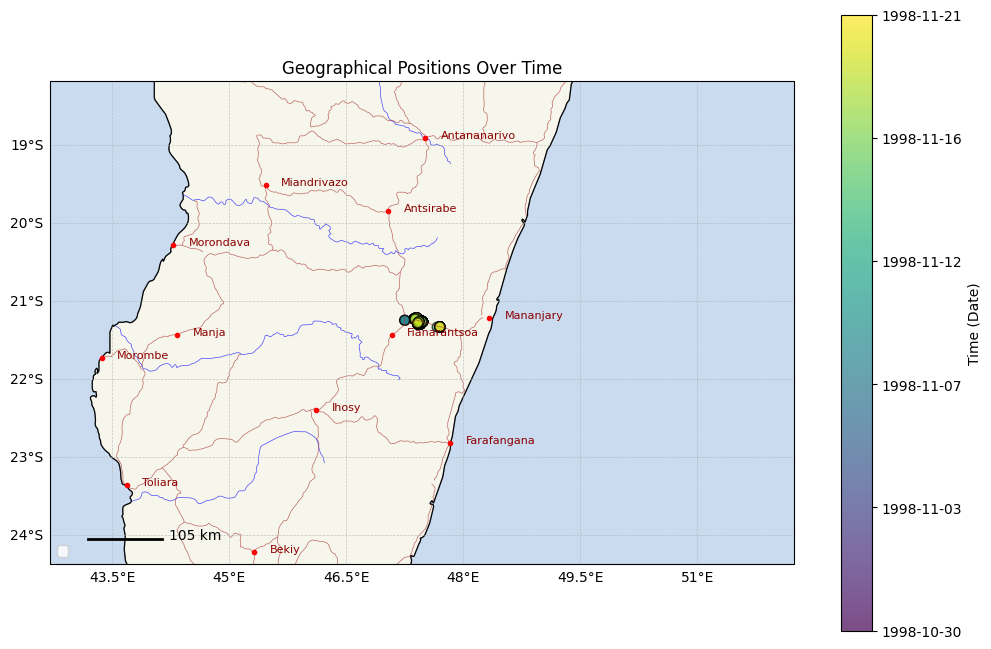

In [527]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=.1, cluster_line=False, plot_towns=True, plot_rivers=True, plot_roads=True)

/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: Legend does not support handles for FeatureArtist instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='lower left', fontsize=10)
/Users/dangause/Desktop/calacademy/expedition-clustering/plotting.py:229: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower left', fontsize=10)


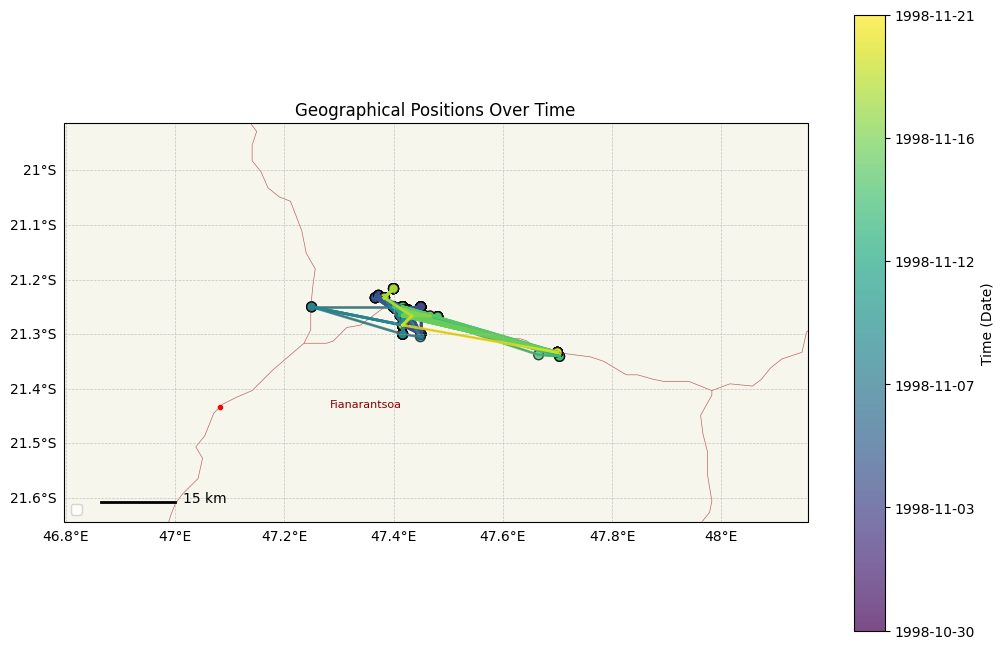

In [528]:
plot_geographical_positions(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',
                            zoom=1, cluster_line=True, plot_towns=True, plot_rivers=True, plot_roads=True)

Beautiful linear expedition!

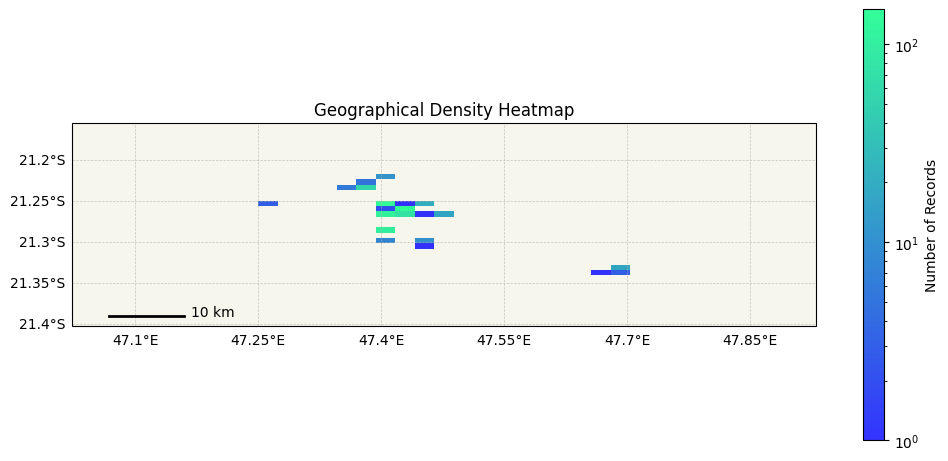

In [529]:
plot_geographical_heatmap(group0_df, lat_col='latitude1', lon_col='longitude1', grid_size=20,
                          zoom=2,  plot_rivers=True, plot_roads=True)


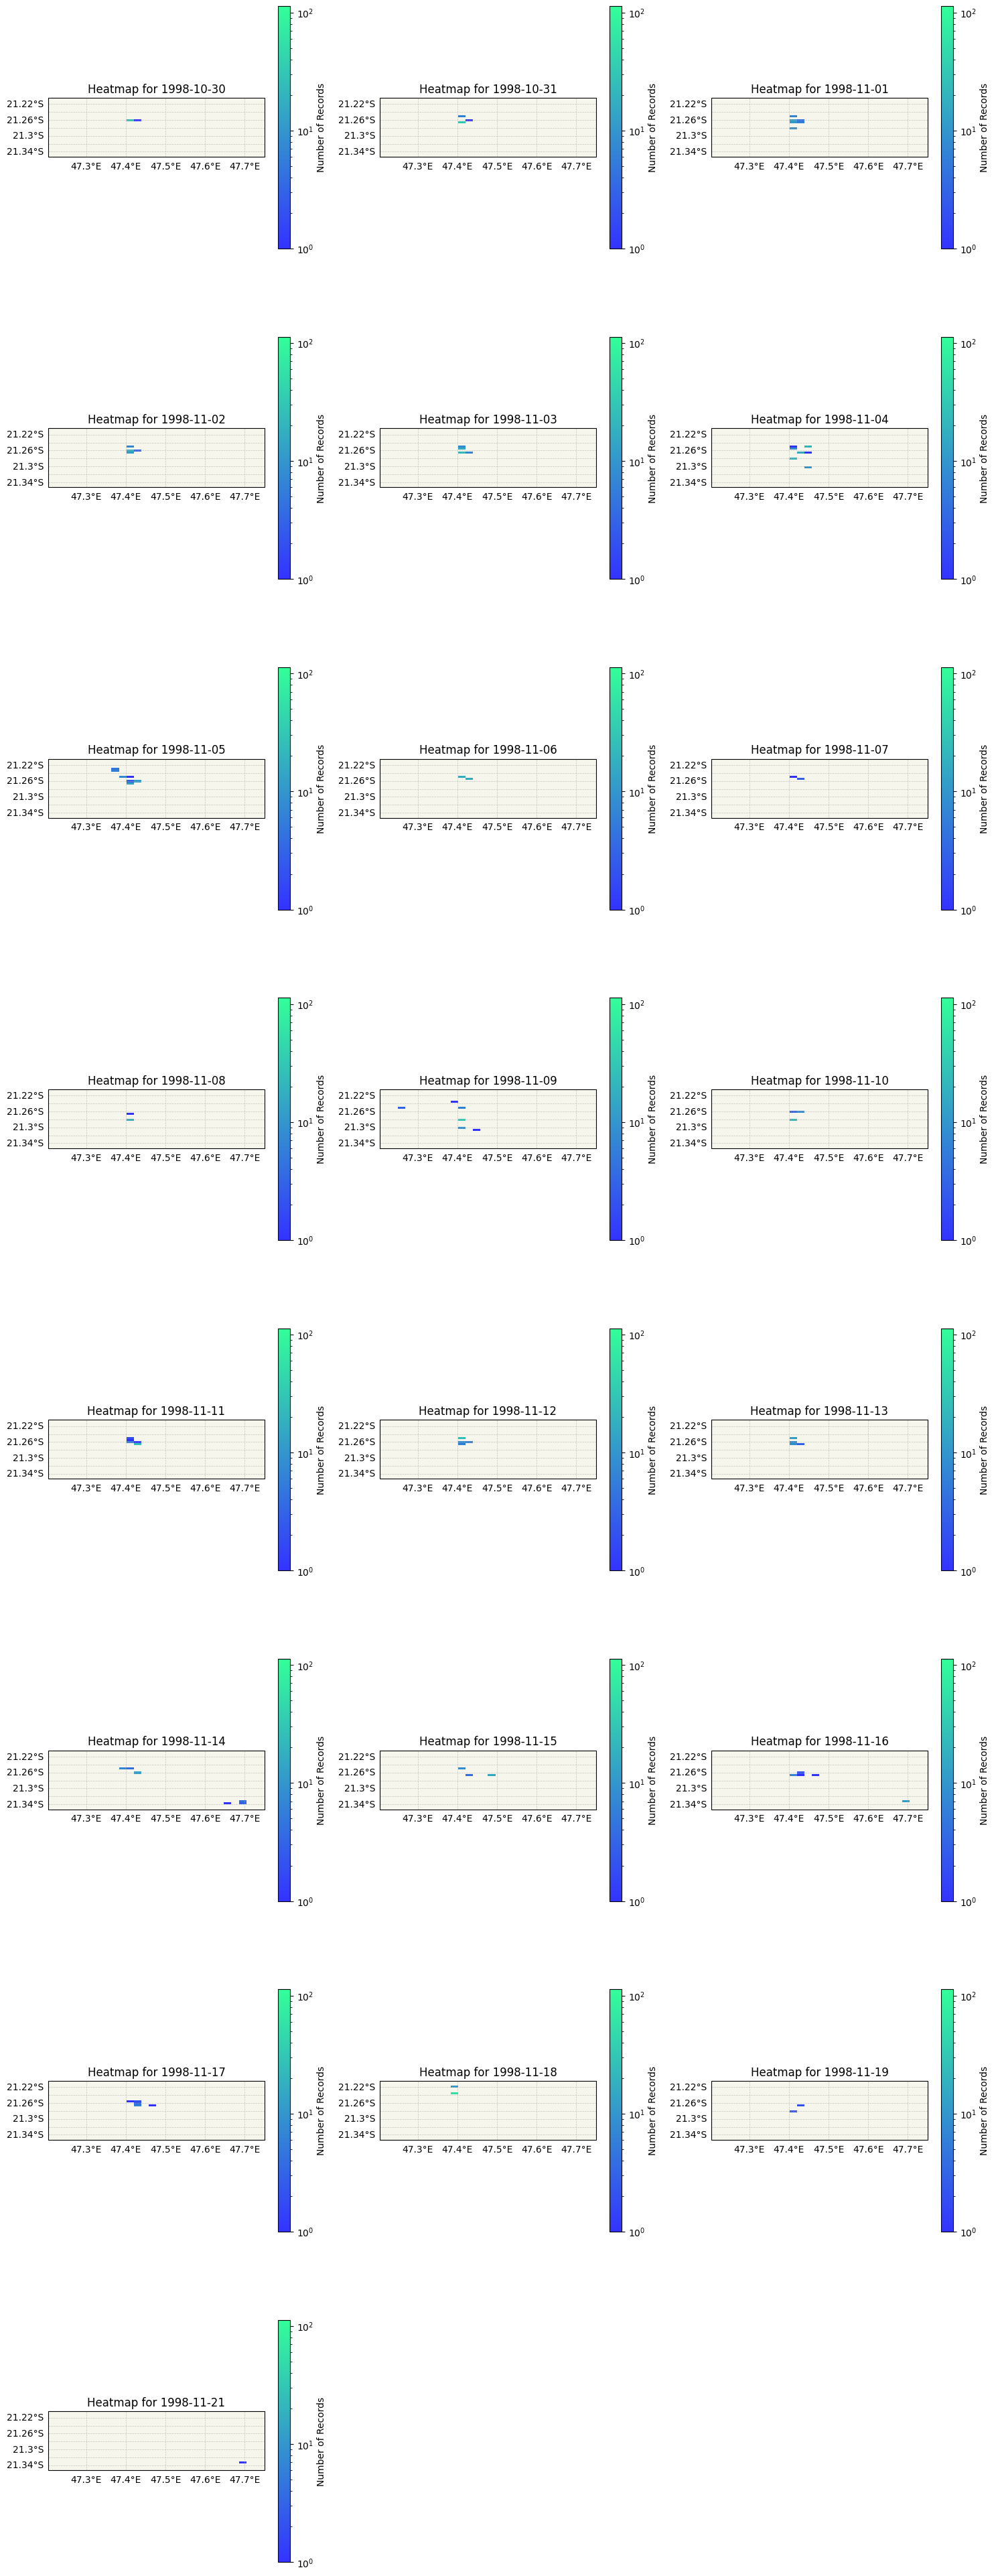

In [530]:
plot_geographical_heatmap_by_day(group0_df, lat_col='latitude1', lon_col='longitude1', datetime_col='startdate',plot_rivers=True, plot_roads=True, grid_size=25)

It all looks like a single cluster to me!

In [531]:
df.loc[group0_df.index, 'cluster'] = '10'
df[df.cluster == '10'].__len__()

755

In [558]:
df.to_csv('../data/labeled_clean_df.csv')

Alright, now we've got all 10 of the clusters we set out to label! Lets find some summary stats on our clusters

# 2. Cluster Summary Stats

In [544]:
df.cluster.value_counts()

cluster
4     1123
6      853
10     755
3      539
7      433
0      193
5       43
9       15
1        8
8        3
2        1
Name: count, dtype: int64

This looks like a pretty solid distribution of cluster size.

In [552]:
from geopy.distance import geodesic

# Function to calculate maximum time difference
def max_time_diff(group):
    return (group['startdate'].max() - group['startdate'].min()).days

# Function to calculate maximum distance
def max_lat(group):
    return (group['latitude1'].max() - group['latitude1'].min())

# Function to calculate maximum distance
def max_lon(group):
    return (group['longitude1'].max() - group['longitude1'].min())


# Function to calculate max differences within consecutive days in a cluster
def max_consecutive_differences(group):
    group = group.sort_values('startdate').reset_index(drop=True)
    group['time_diff'] = group['startdate'].diff().dt.days
    group['lat_diff'] = group['latitude1'].diff().abs()
    group['lon_diff'] = group['longitude1'].diff().abs()
    
    return pd.Series({
        'max_time_diff_consecutive': np.round(group['time_diff'].max(), 3),
        'max_lat_diff_consecutive': np.round(group['lat_diff'].max(), 3),
        'max_lon_diff_consecutive': np.round(group['lon_diff'].max(), 3),
    })

# Group by 'cluster' and compute summary statistics
summary_stats = df.groupby('cluster').agg(
    startdate_min=('startdate', 'min'),
    startdate_max=('startdate', 'max'),
    latitude_mean=('latitude1', 'mean'),
    latitude_std=('latitude1', 'std'),
    longitude_mean=('longitude1', 'mean'),
    longitude_std=('longitude1', 'std'),
    count=('cluster', 'size')
).reset_index()


# Add max time difference and max distance to summary stats
summary_stats['max_time_diff'] = df.groupby('cluster').apply(max_time_diff).values
summary_stats['max_lat_diff'] = np.round(df.groupby('cluster').apply(max_lat).values, 3)
summary_stats['max_lon_diff'] = np.round(df.groupby('cluster').apply(max_lon).values, 3)

# Add max consecutive differences
consecutive_diffs = df.groupby('cluster').apply(max_consecutive_differences).reset_index()
summary_stats = summary_stats.merge(consecutive_diffs, on='cluster')


/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_29126/1004204234.py:42: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats['max_time_diff'] = df.groupby('cluster').apply(max_time_diff).values
/var/folders/qx/bpj16cl90cq20swjd4j79cdh0000gn/T/ipykernel_29126/1004204234.py:43: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_stats['max_lat_diff'] = np.round(df.groupby('cluster').apply(

In [554]:
summary_stats

cluster startdate_min startdate_max  latitude_mean  latitude_std  \
0        0    1934-06-11    1934-06-16      41.554362      0.178790   
1        1    1934-08-01    1934-08-01      41.387087      0.041883   
2       10    1998-10-30    1998-11-21     -21.262635      0.019754   
3        2    1934-07-13    1934-07-13      41.232300           NaN   
4        3    1998-10-20    1998-11-08      25.013179      0.156700   
5        4    2004-04-21    2004-05-10      27.031094      0.202272   
6        5    1995-08-03    1995-08-03      53.025193      0.008430   
7        6    2005-05-11    2005-05-19      26.023969      0.043978   
8        7    2005-08-03    2005-08-23      26.472015      0.064914   
9        8    1933-11-07    1933-11-07      38.962862      0.000486   
10       9    1934-03-03    1934-03-04      39.081800      0.235363   

    longitude_mean  longitude_std  count  max_time_diff  max_lat_diff  \
0      -120.323170   1.242424e-01    193              5         0.755   
1      -120.257513   4.371732e-02      8              0         0.092   
2        47.424817   5.062085e-02    755             22         0.124   
3      -120.099100            NaN      1              0         0.000   
4        98.681980   1.046361e-01    539             19         0.519   
5        98.818828   5.906315e-02   1123             19         0.726   
6      -119.216667   1.083738e-07     43              0         0.017   
7        98.638959   3.865677e-02    853              8         0.163   
8        98.828312   5.906250e-02    433             20         0.434   
9      -123.686008   5.996845e-04      3              0         0.001   
10     -123.692560   6.690407e-02     15              1         0.469   

    max_lon_diff  max_time_diff_consecutive  max_lat_diff_consecutive  \
0          0.739                        1.0                     0.628   
1          0.109                        0.0                     0.092   
2          0.454                        2.0                     0.091   
3          0.000                        NaN                       NaN   
4          0.396                        2.0                     0.378   
5          0.211                        3.0                     0.683   
6          0.000                        0.0                     0.017   
7          0.145                        1.0                     0.163   
8          0.164                       10.0                     0.370   
9          0.001                        0.0                     0.001   
10         0.145                        1.0                     0.312   

    max_lon_diff_consecutive  
0                      0.472  
1                      0.109  
2                      0.304  
3                        NaN  
4                      0.327  
5                      0.211  
6                      0.000  
7                      0.143  
8                      0.161  
9                      0.001  
10                     0.145

In [555]:
summary_stats.max_time_diff_consecutive.median()

np.float64(1.0)

# 3. Takeaways

We can now use these manually labeled clusters to check the efficacy of clustering algorithms we create! Good to have a little supervision...

## Things to consider

1. Increasing cluster size in more recent expeditions
    - Modern means of travel means people can cover more distance in less time!
    - This is probably overkill, but could be an interesting thing to look at
2. Subclusters
    - It could be interesting to break individual clusters into subclusters for different parties within a larger expedition. We say multiple instances of what looks like 2 parties collecting specimens from distinct zones within a single cluster.
    - What if there are two parties both part of a lager expedition that are far enough apart to be tagged as two separate clusters by our algorithm? Do we care about this? Should we look into it?
3. Density of expeditions
    - How closely packed in (time, distance) can separate clusters be? 
    - What do we feel comfortable setting as thresholds for our clustering algorithm?
4. Text
    - Do we want to use text in our clustering algorithm? And if so, how?
    - We could use it as a backup, in the case of missing spatiotemporal data...
    - We could also use the NLP homogeneity of a field like _text1_, _remarks_, or _localityname_ within a cluster as a metric of cluster confidence

## Thresholds

### Spatial (Lat / Lon)

In this notebook we located clusters by scanning for records within +- 0.5º of both latitude and longitude of a seed record. This in effect scans for records within a 1 square degree lat/lon box.

1º lat corresponds to ~70 km, so 1 square degree lat/lon covers and area of ~1400 km^2. This feels like a conservative area – if anything it may be too big, but I think it's a good starting point.

We could try to be fancy and use other methods for spatial clustering like a spatial aperture with a set radius, or a varying grid size based on global location. That being said, this grid scan method seemed to work pretty well, and is certainly the most simple spatial clustering method. Let's abide by the KISS mentality.

__Lets say 1 degree lat/lon is a reasonable value for our temporal epislon.__


### Temporal (startdate)

In this notebook, we have used __ONLY__ the _startdate_ field as our temporal variable. While there wasn't any specific instruction to do this, it is the only date variable I could find that has halfway-decent coverage, and represents the collection date. I think that's fine.

We identified clusters by first scanning for records within 6 months of the _startdate_ of a seed record, then breaking this into clusters from there. Through this, we found anywhere from 1 cluster to ~10 clusters. This is definitely too large to use as our clustering threshold. 

To determine an ideal temporal threshold, we need to focus on the time between consecutive records within an expedition cluster. The max time between consecutive records in our sample of manually labeled clusters was 10, whereas the median was 1 day. I'm a little skeptical of the 10 day threshold, as it may end up glomming multiple clusters together, especially in a place like California where its easy for CalAcademy scientists to revisit a site within a week.

It seems like a reasonable cutoff would be... 2 weeks? ... 5 days? ... a single day? It depends on how conservative vs aggressive we want to be in our clustering.

__For now, lets say 10 days is a reasonable value for our temporal epislon.__